# Difference Plots

In [1]:
from plotting_utils import (
    plot_forecast,
    plot_crps_bydate,
    score_improvement_bysite,
    plot_improvement_bysite,
    plot_global_percentages,
    plot_region_percentages,
    plot_site_type_percentages_bymodel,
    plot_site_type_percentages_global,
    plot_window_and_sitetype_performance,
    generate_metadata_df,
)
import pandas as pd

targets = pd.read_csv("targets.csv.gz")
metadata = generate_metadata_df()

/home/rstudio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Data Wrangling

Let's get dataframes for all the models

In [2]:
model_names = ["RNN", "TFT", "BlockRNN", "Transformer",
               "NLinear", "DLinear", "NBEATS", "TCN"]
target_variables = ['oxygen', 'temperature', 'chla']
scores_dict = {}
for model in model_names:
    scores_dict[model] = {}
    for target_variable in target_variables:
        inter_merged, intra_merged = score_improvement_bysite(
            model, 
            targets, 
            target_variable, 
            suffix='default'
        )
        scores_dict[model][target_variable] = {}
        scores_dict[model][target_variable]['inter'] = inter_merged
        scores_dict[model][target_variable]['intra'] = intra_merged

Write something to save these because processing takes a while

In [3]:
for model in model_names:
    for target_variable in target_variables:
        for pos in ['inter', 'intra']:
            scores_dict[model][target_variable][pos].to_csv(
                f'scores/{model}_{target_variable}_{pos}.csv', index=False
            )

And, to load.

In [2]:
scores_dict = {}
model_names = ["RNN", "TFT", "BlockRNN", "Transformer",
               "NLinear", "DLinear", "NBEATS", "TCN"]
target_variables = ['oxygen', 'temperature', 'chla']

for model in model_names:
    scores_dict[model] = {}
    for target_variable in target_variables:
        scores_dict[model][target_variable] = {}
        for pos in ['inter', 'intra']:
            scores_dict[model][target_variable][pos] = pd.read_csv(
                f'scores/{model}_{target_variable}_{pos}.csv'
            )

Concanating the varying dictionaries

In [3]:
global_dfs = {}
for target_variable in target_variables:
    global_dfs[target_variable] = {}
    for pos in ['inter', 'intra']:
        global_dfs[target_variable][pos] = pd.concat([scores_dict[model][target_variable][pos] for model in model_names])

### General Performance

#### Historical Comparison

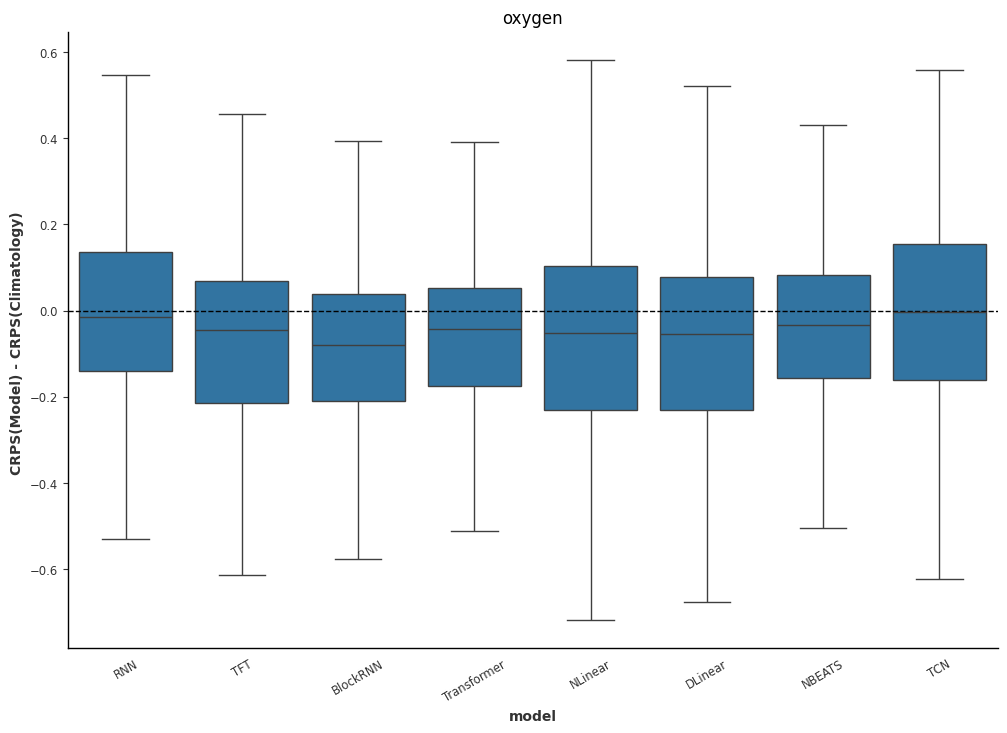

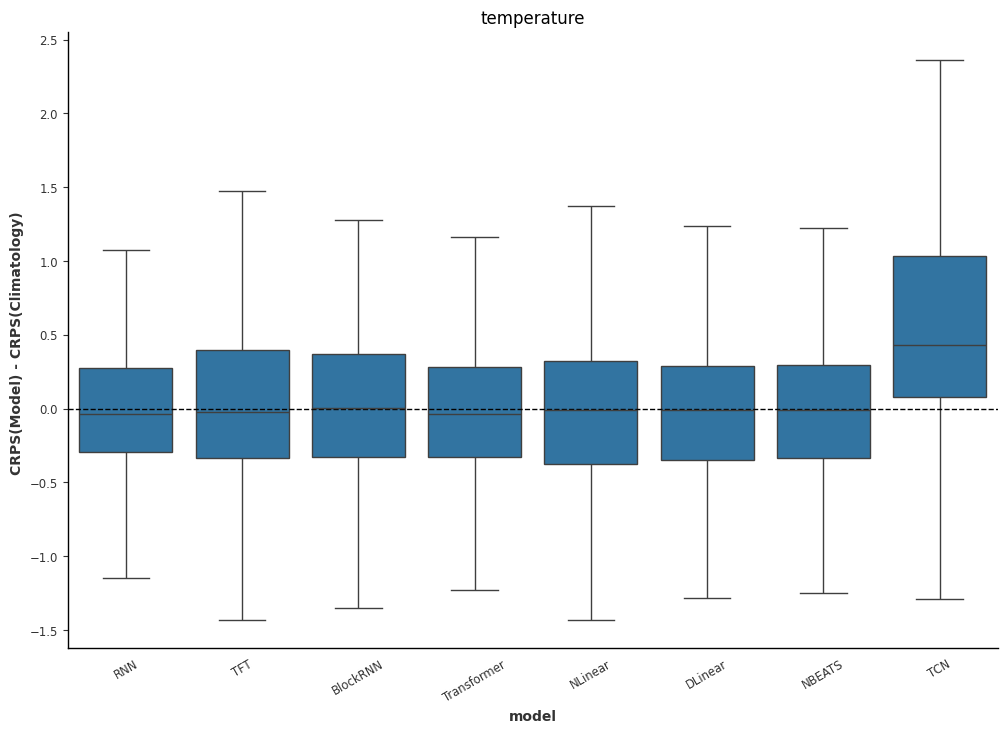

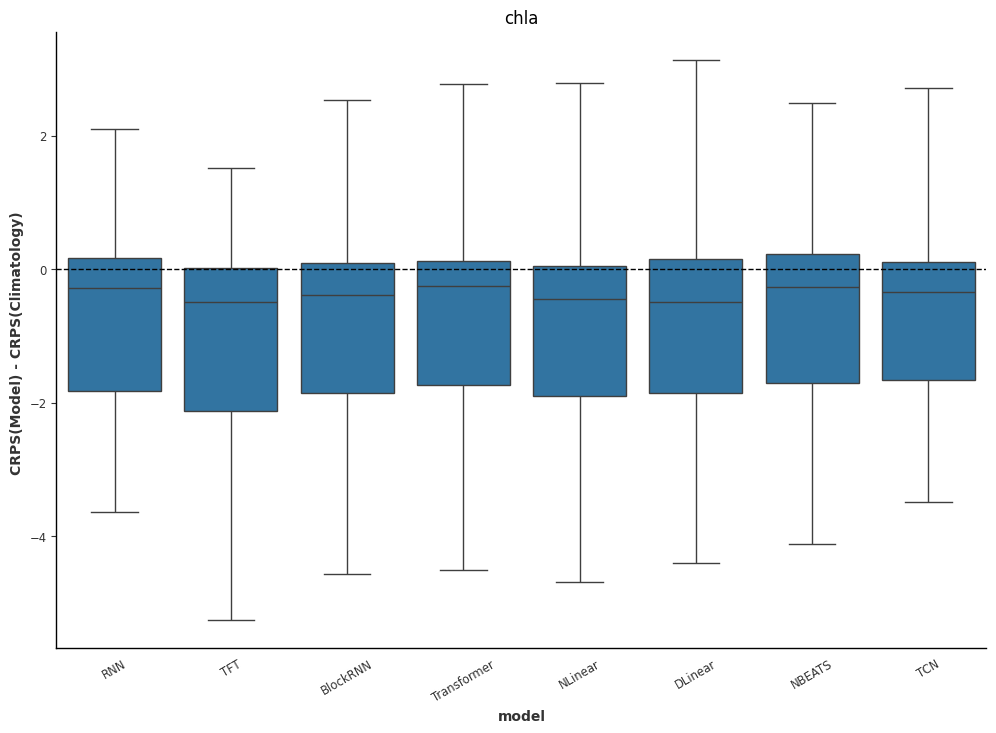

In [4]:
for target_variable in target_variables:
    plot_global_percentages(global_dfs[target_variable]['inter'], f'{target_variable}')

#### Naive Persistence Comparison

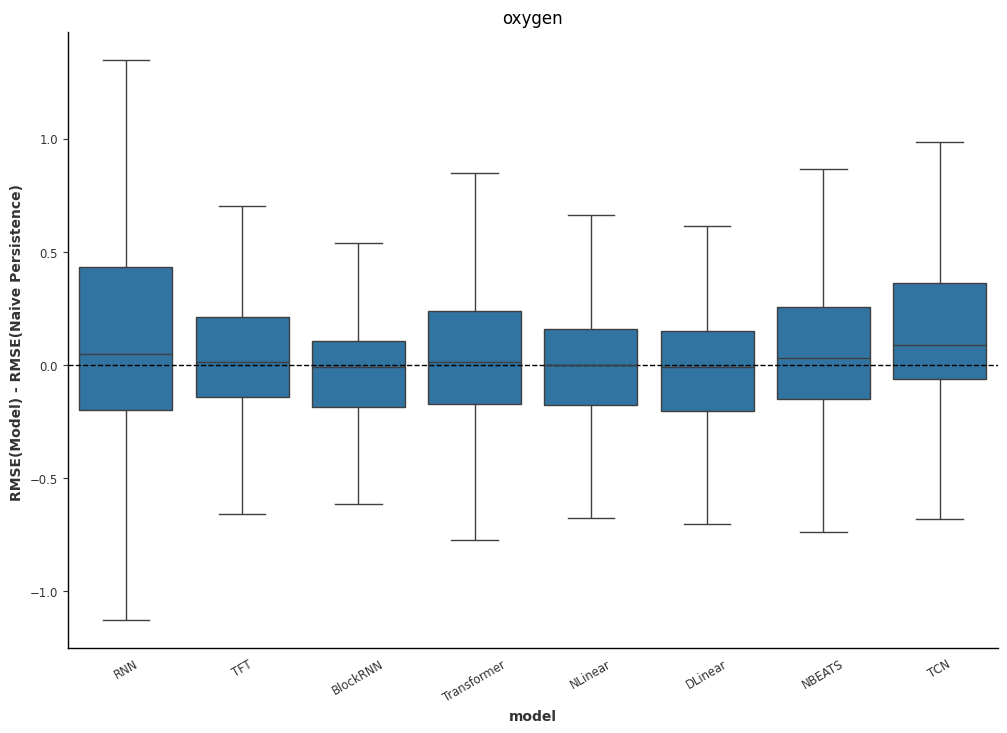

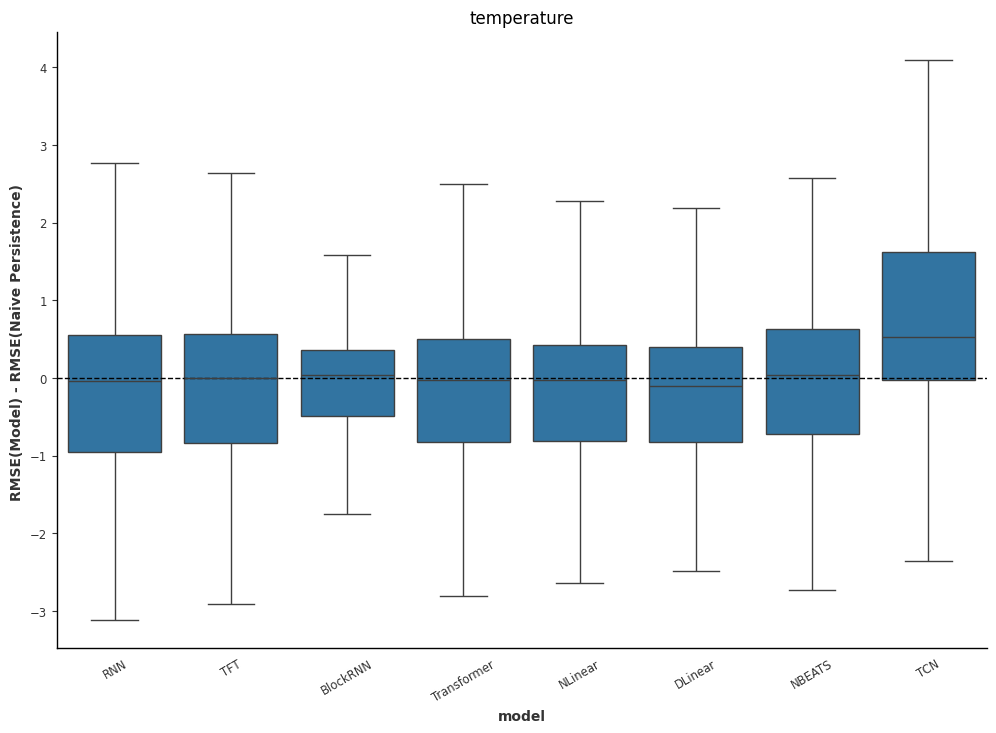

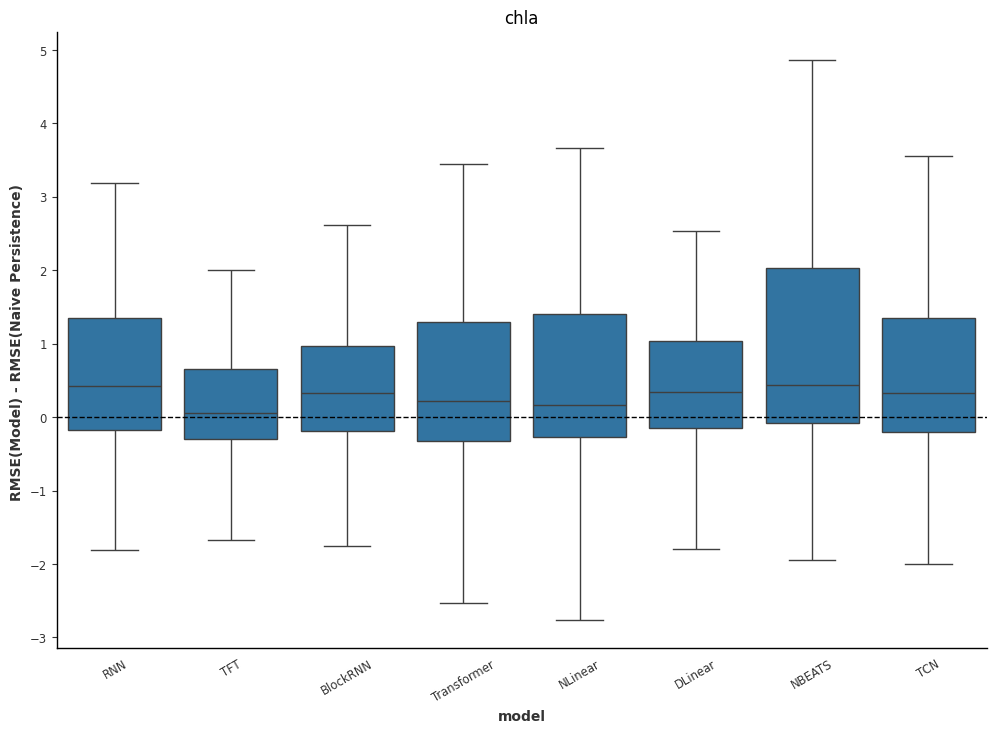

In [5]:
for target_variable in target_variables:
    plot_global_percentages(global_dfs[target_variable]['inter'], f'{target_variable}', historical=False)

### Global Performance by water body type

Global here as in aggregated across different ML algorithms.

#### Historical Comparison

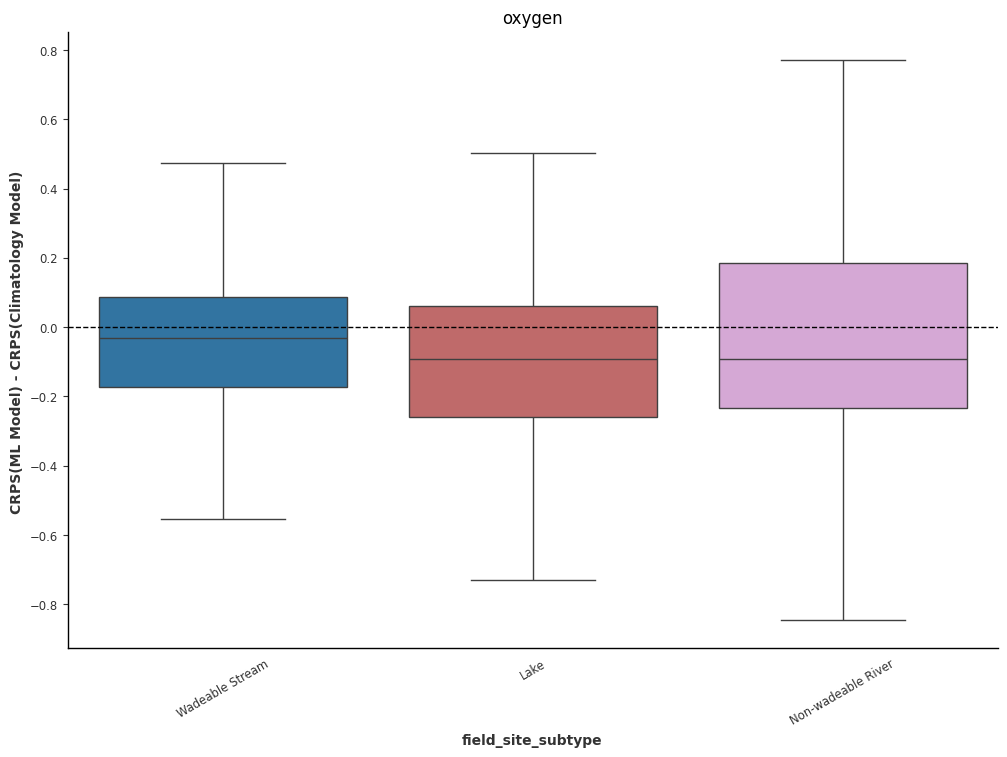

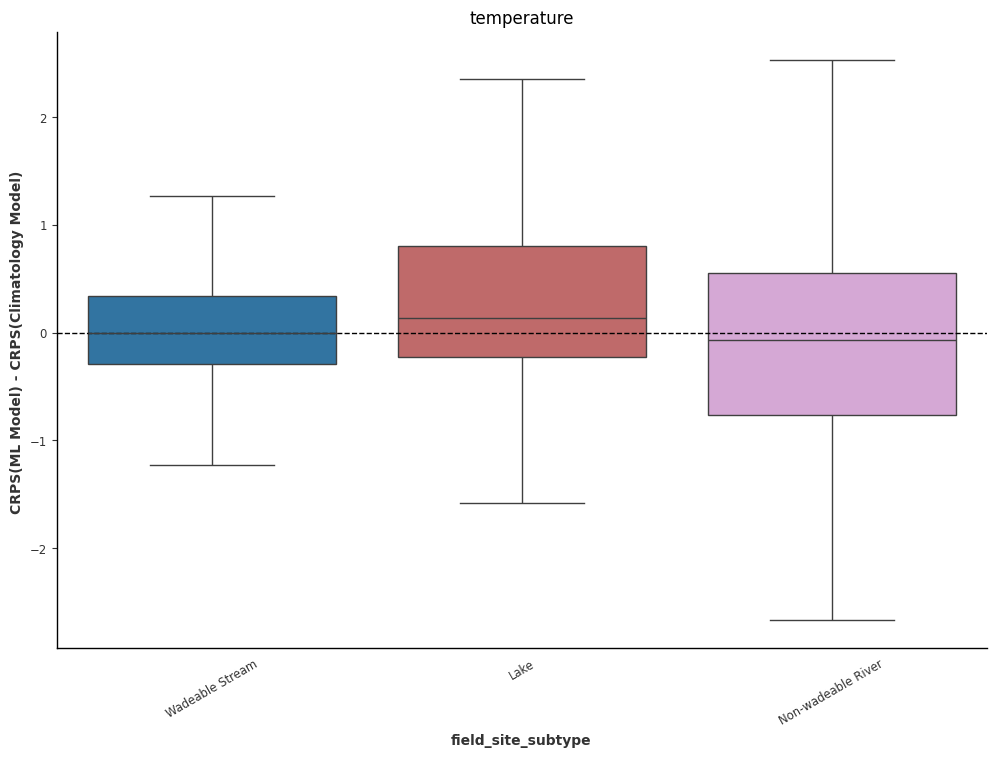

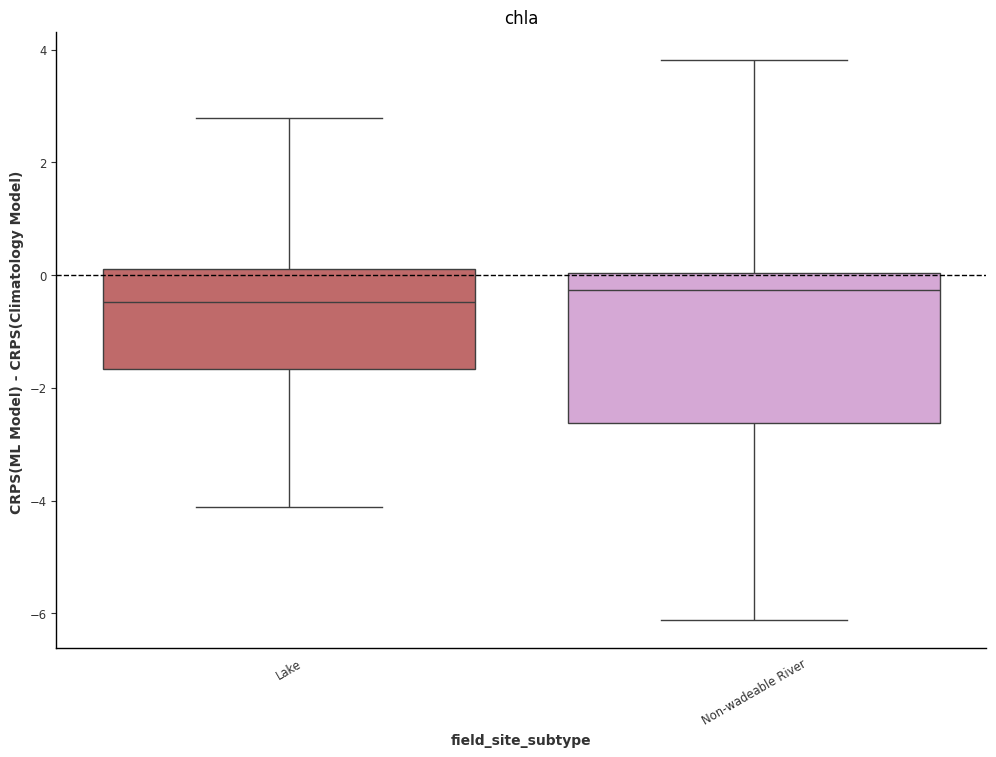

In [6]:
for target_variable in target_variables:
    plot_site_type_percentages_global(global_dfs[target_variable]['inter'], metadata, f'{target_variable}')

#### Naive Persistence Comparison

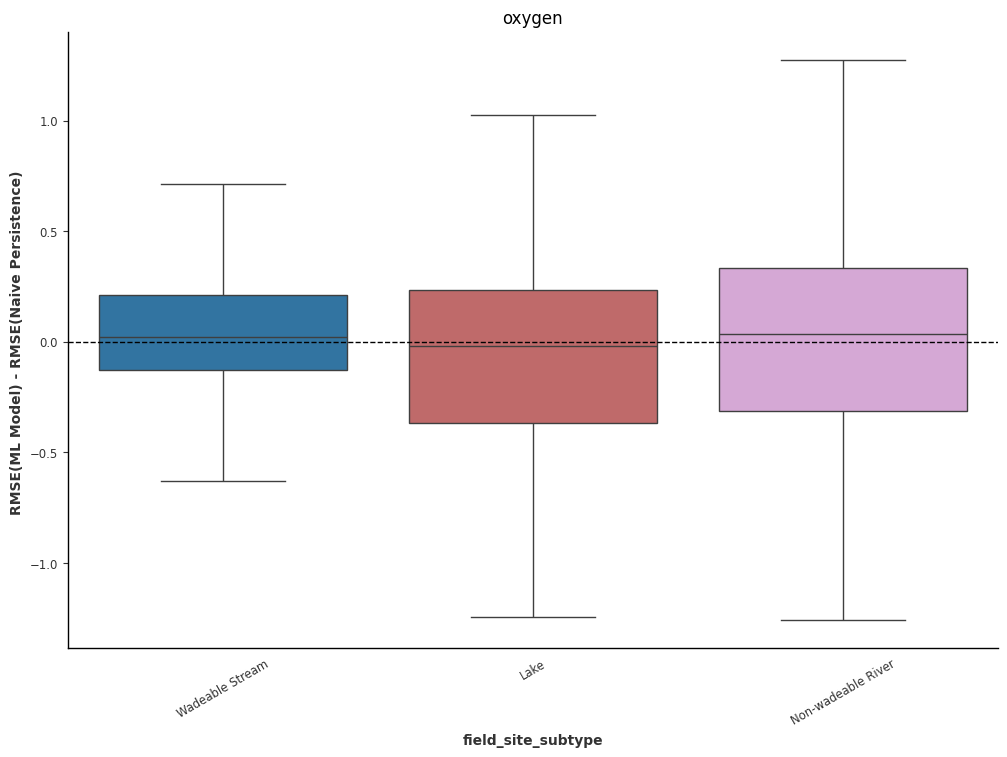

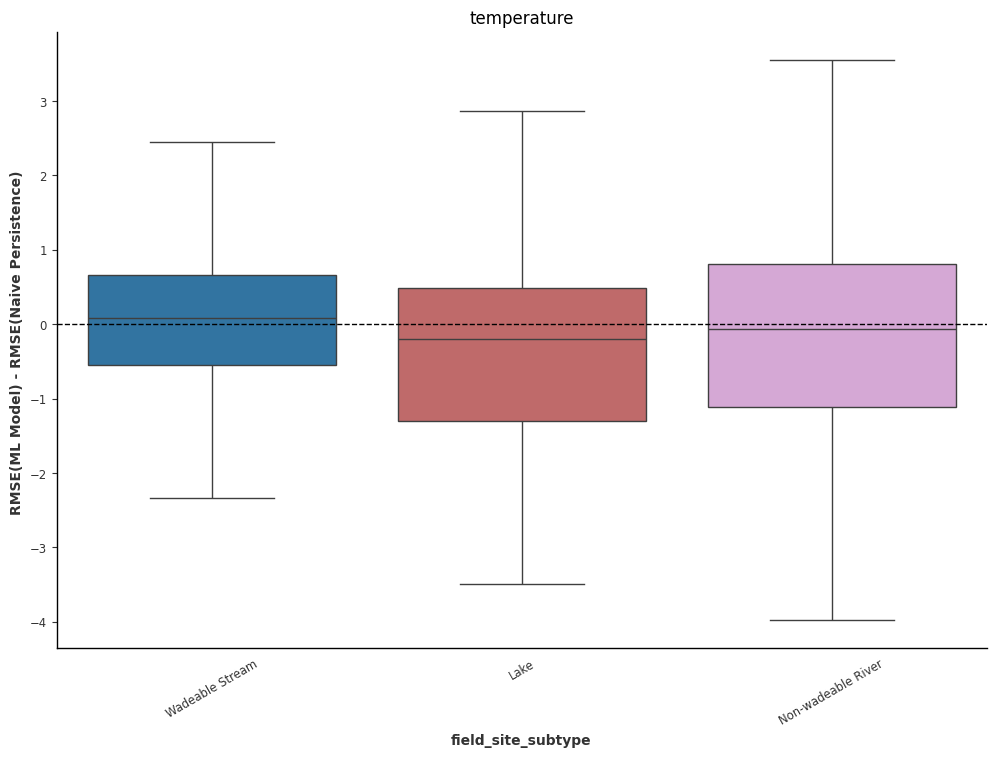

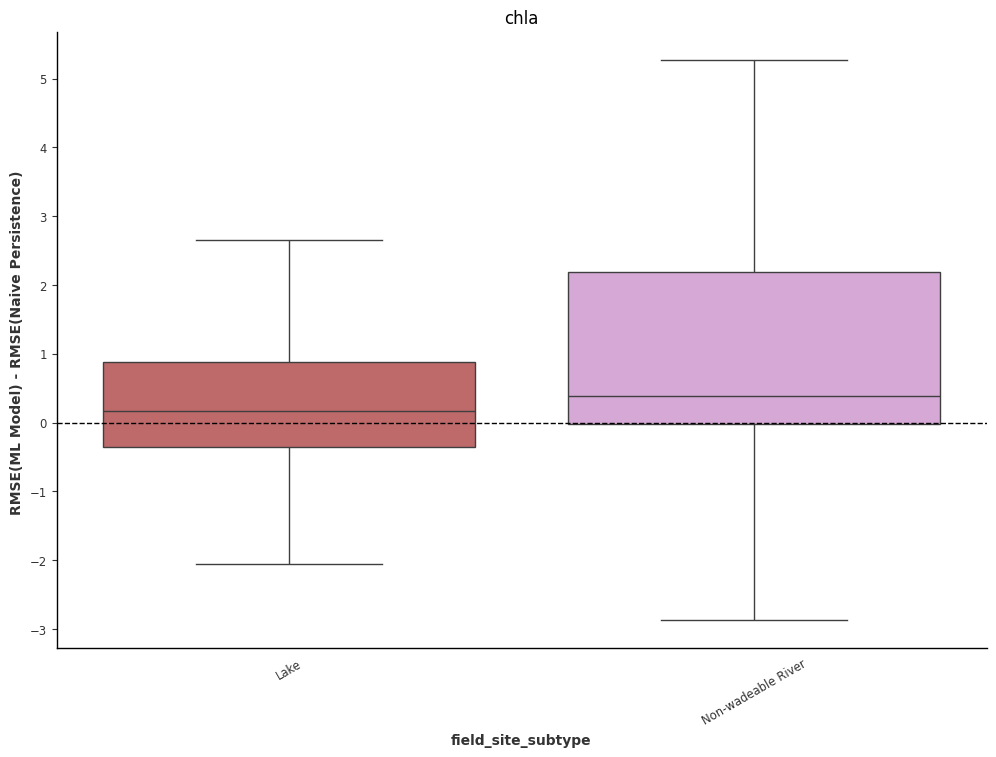

In [7]:
for target_variable in target_variables:
    plot_site_type_percentages_global(global_dfs[target_variable]['inter'], metadata, f'{target_variable}', historical=False)

### Model Performance by water body type

#### Historical Comparison

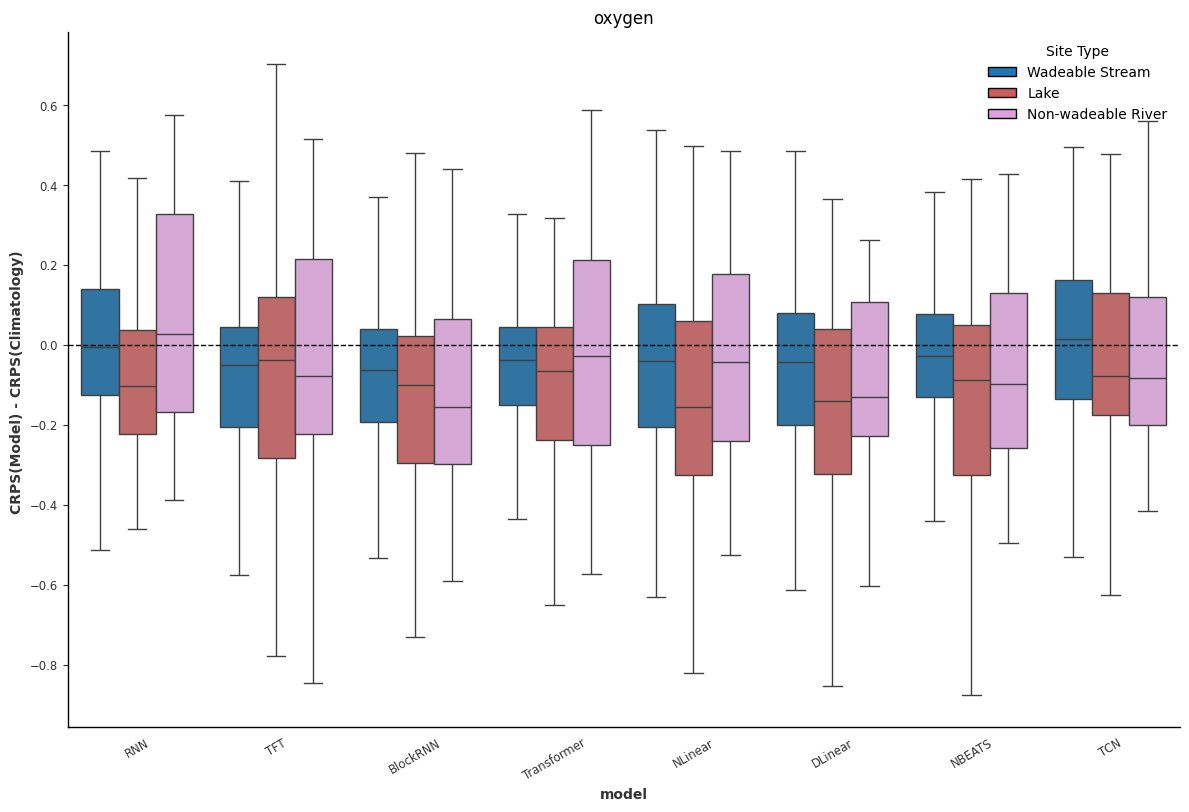

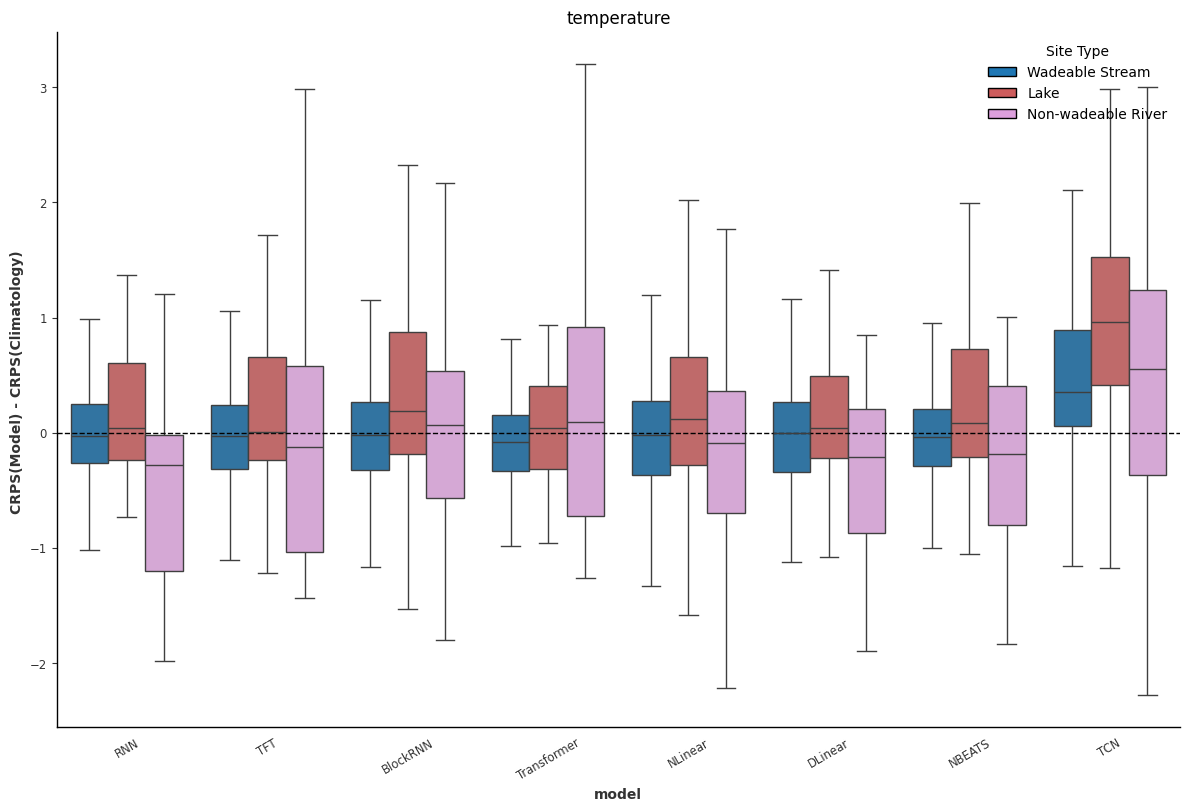

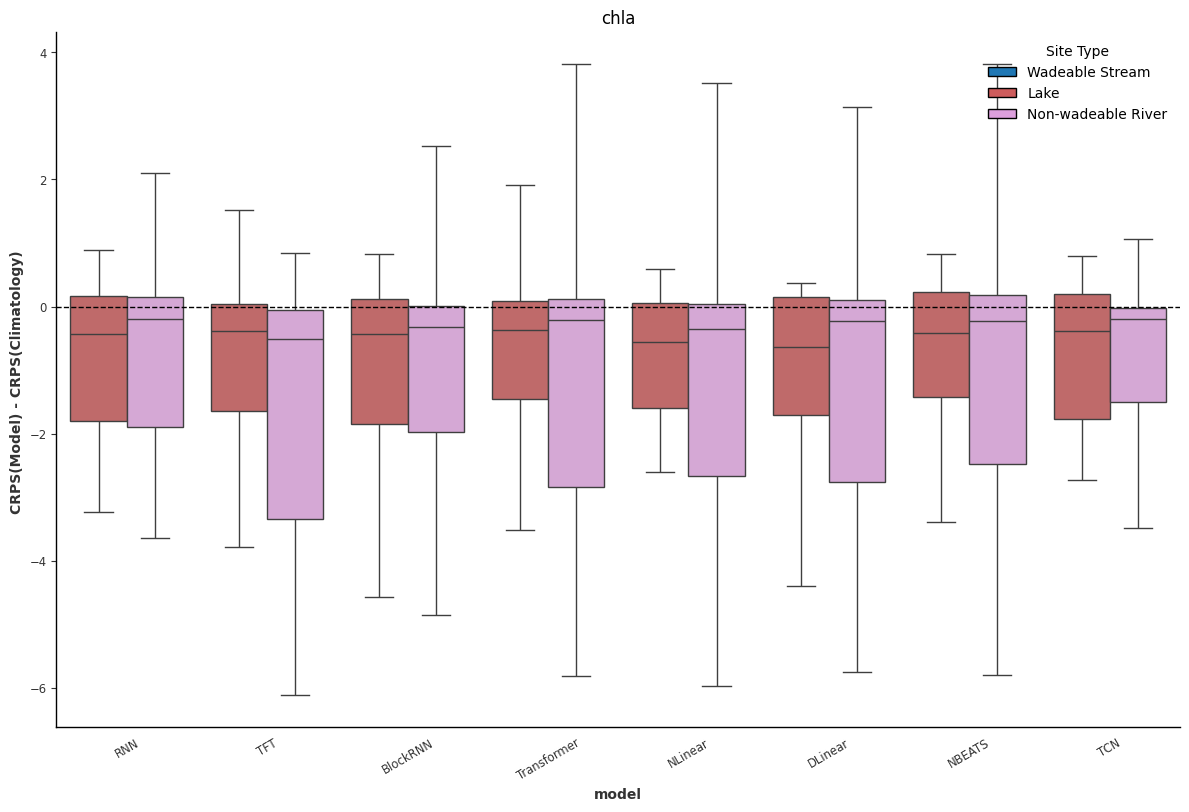

In [8]:
for target_variable in target_variables:
    plot_site_type_percentages_bymodel(global_dfs[target_variable]['inter'], metadata, f'{target_variable}')

#### Naive Comparison

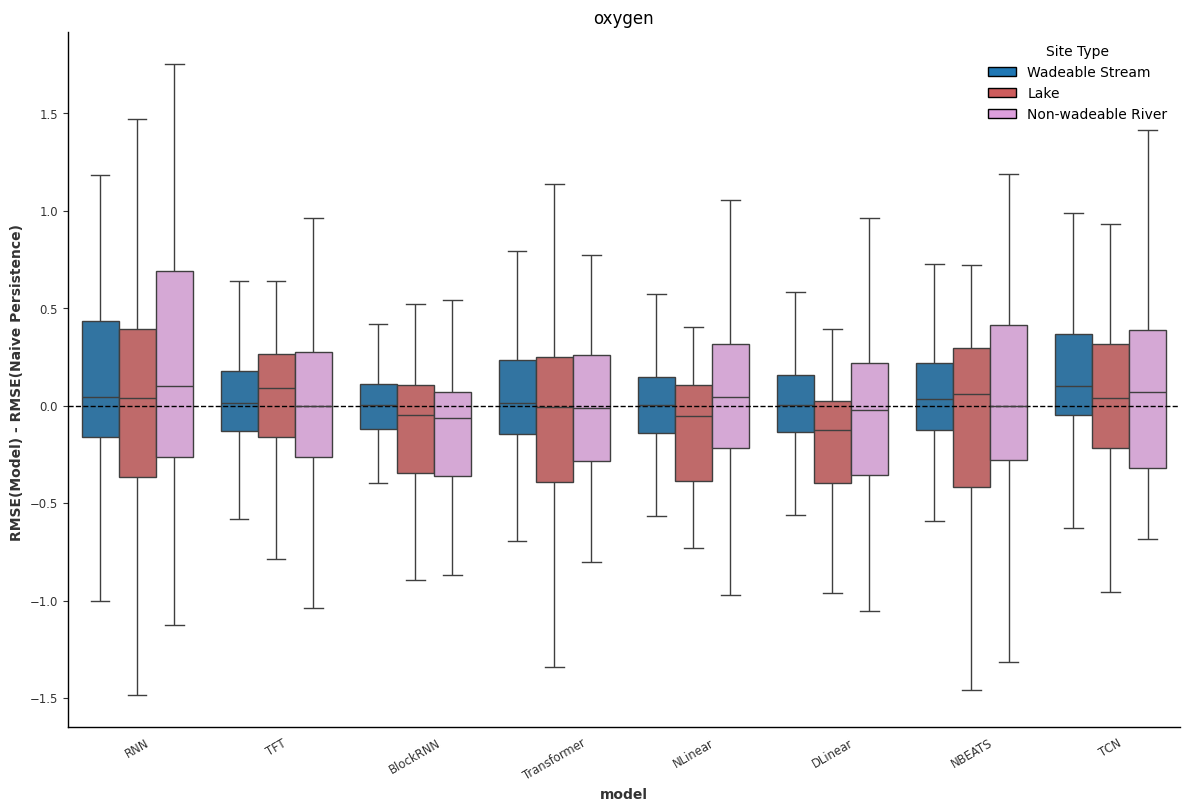

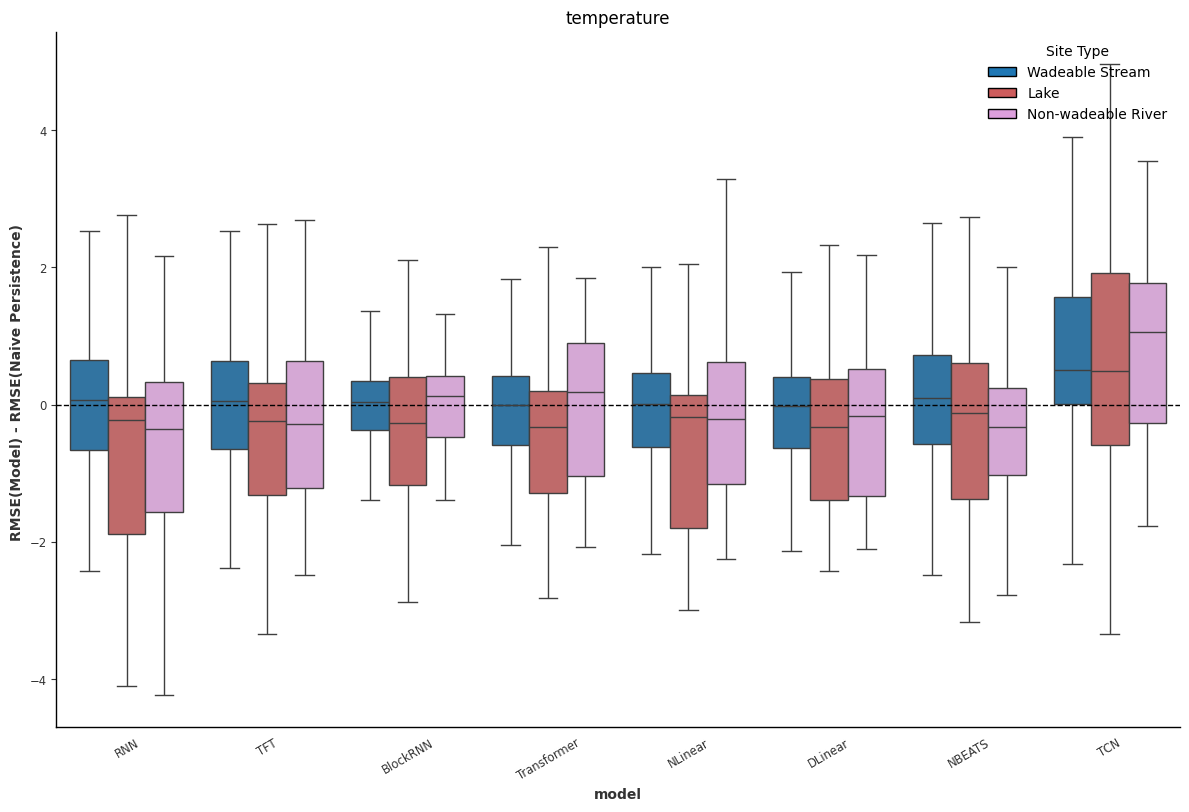

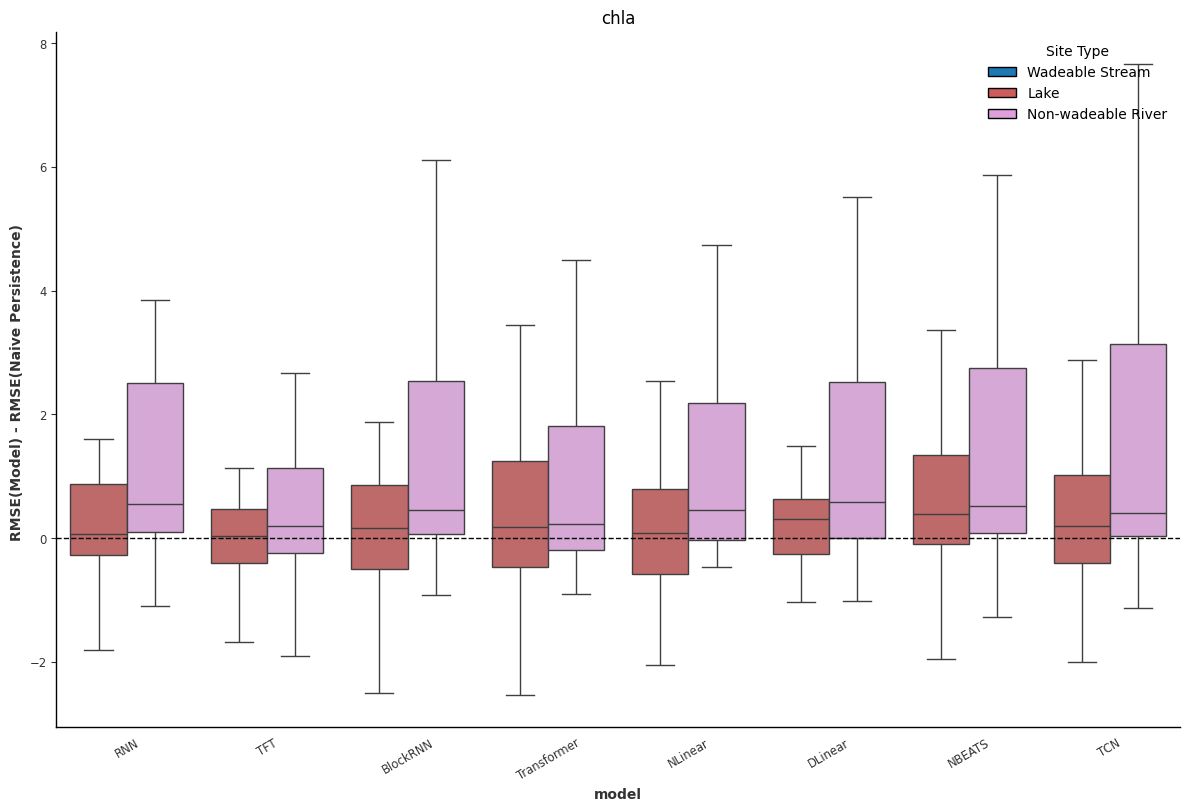

In [9]:
for target_variable in target_variables:
    plot_site_type_percentages_bymodel(global_dfs[target_variable]['inter'], metadata, f'{target_variable}', historical=False)

### Global Performance over the year

#### Historical Comparison

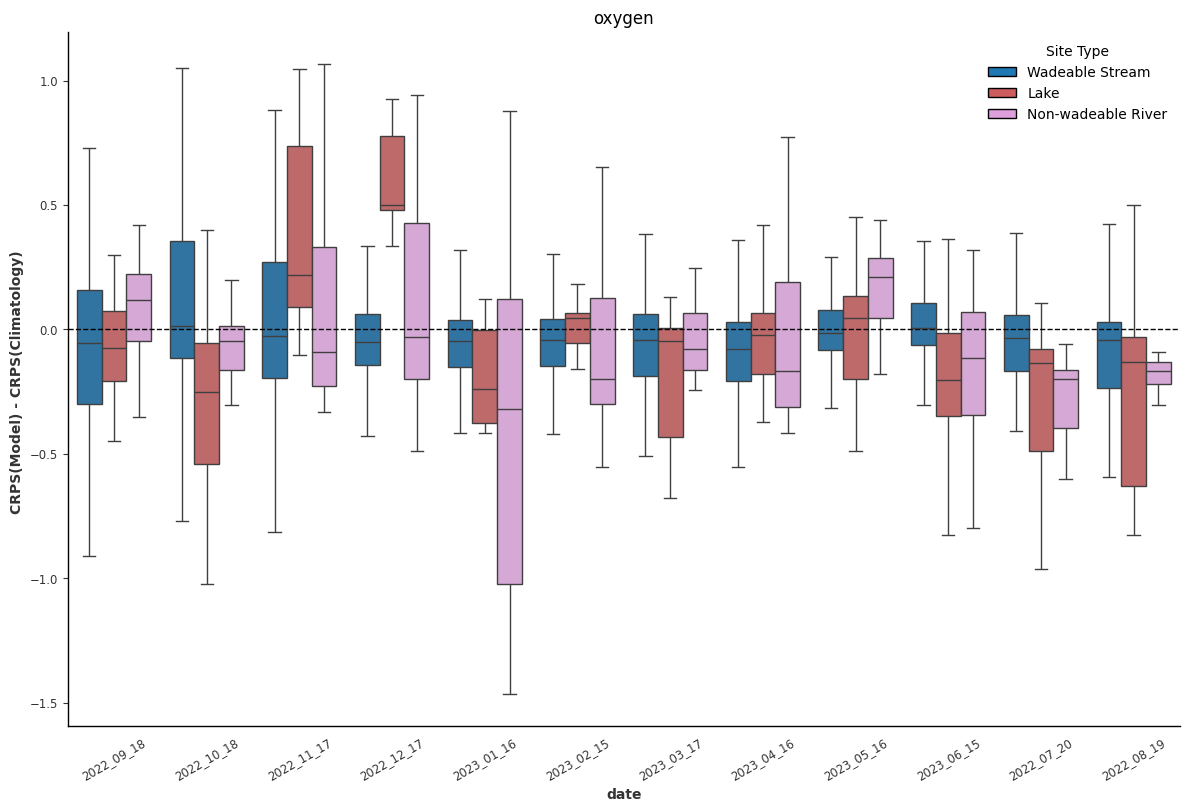

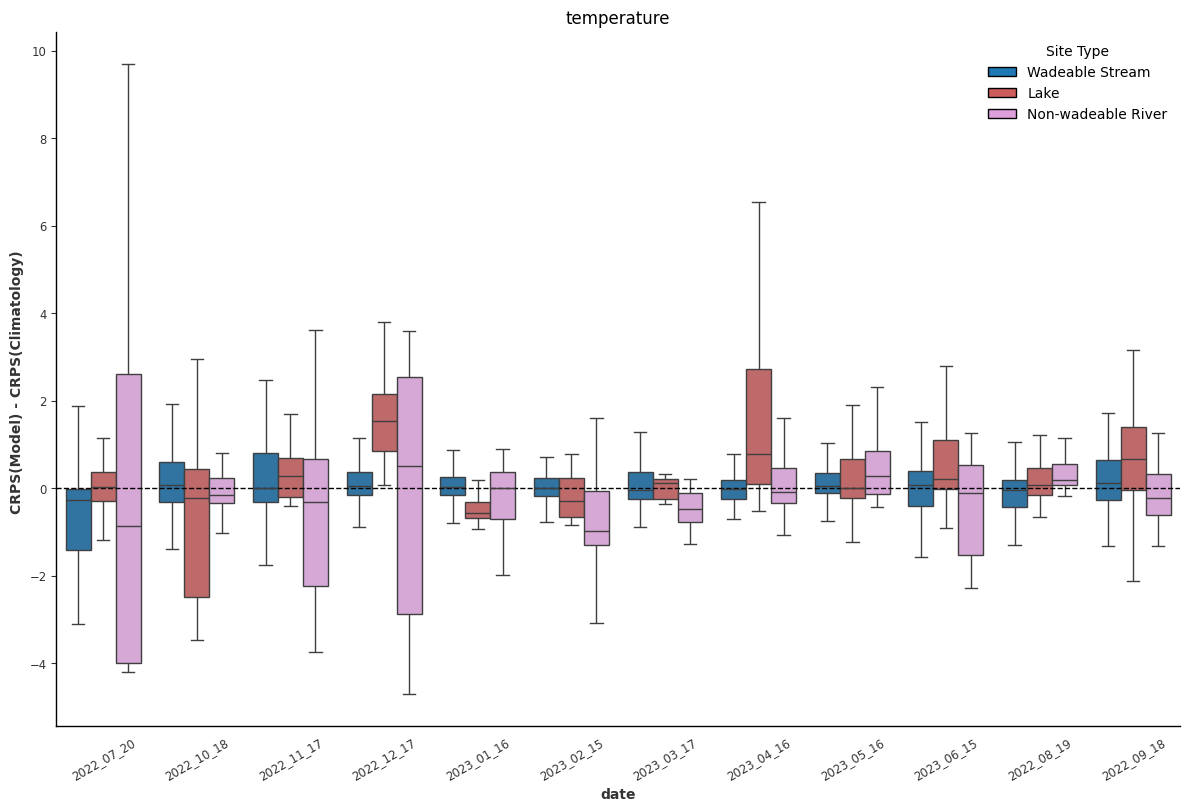

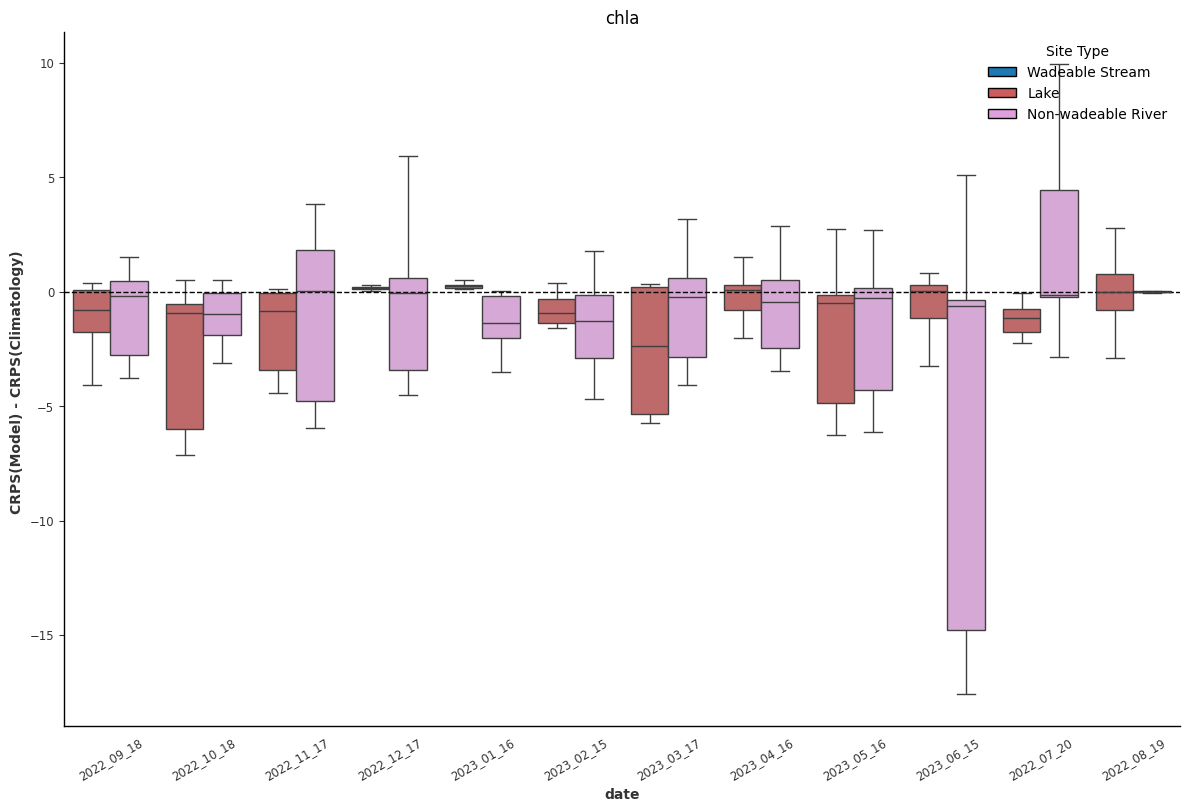

In [10]:
for target_variable in target_variables:
    plot_window_and_sitetype_performance(global_dfs[target_variable]['inter'], metadata, f'{target_variable}')

#### Naive Comparison

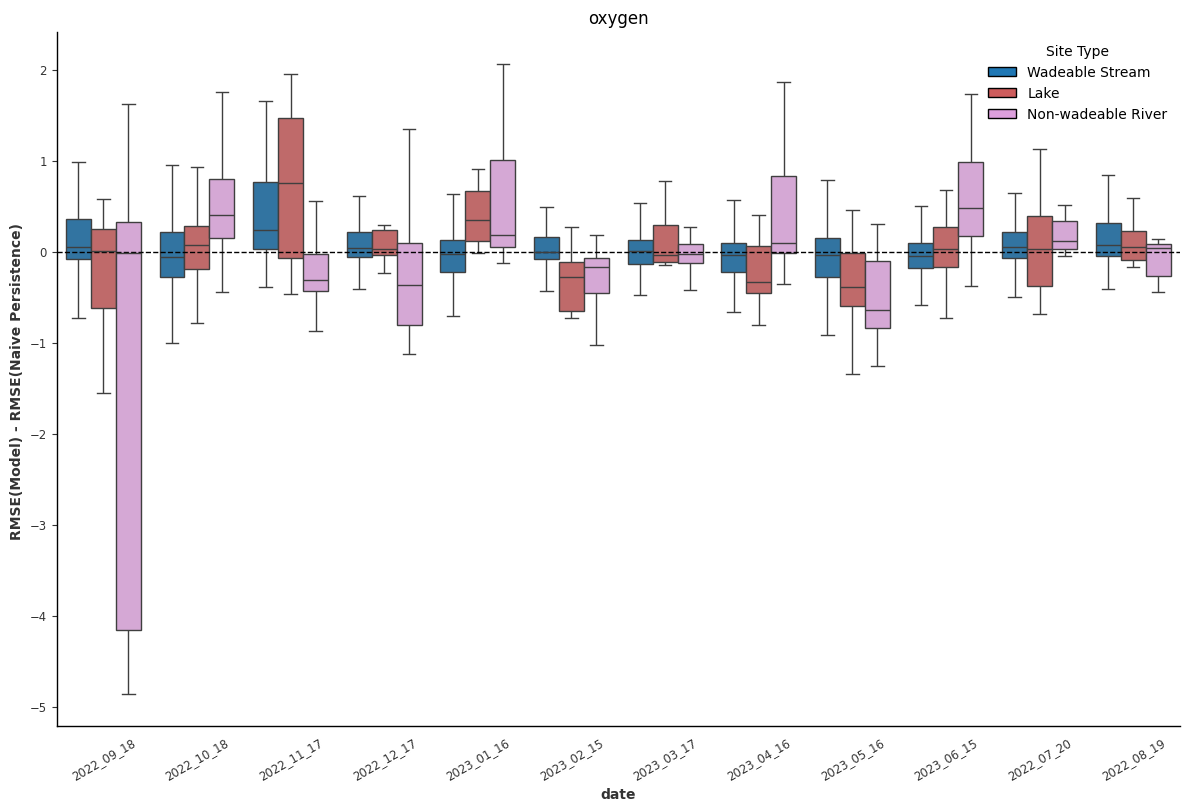

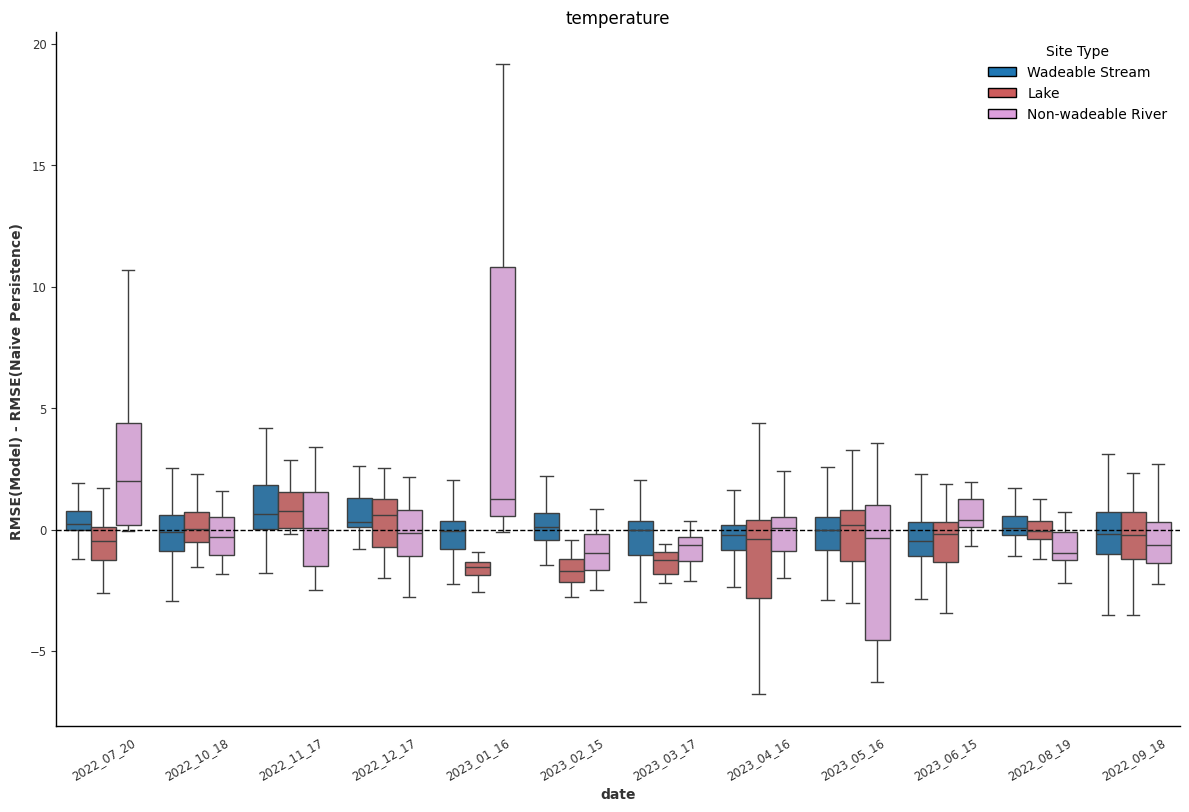

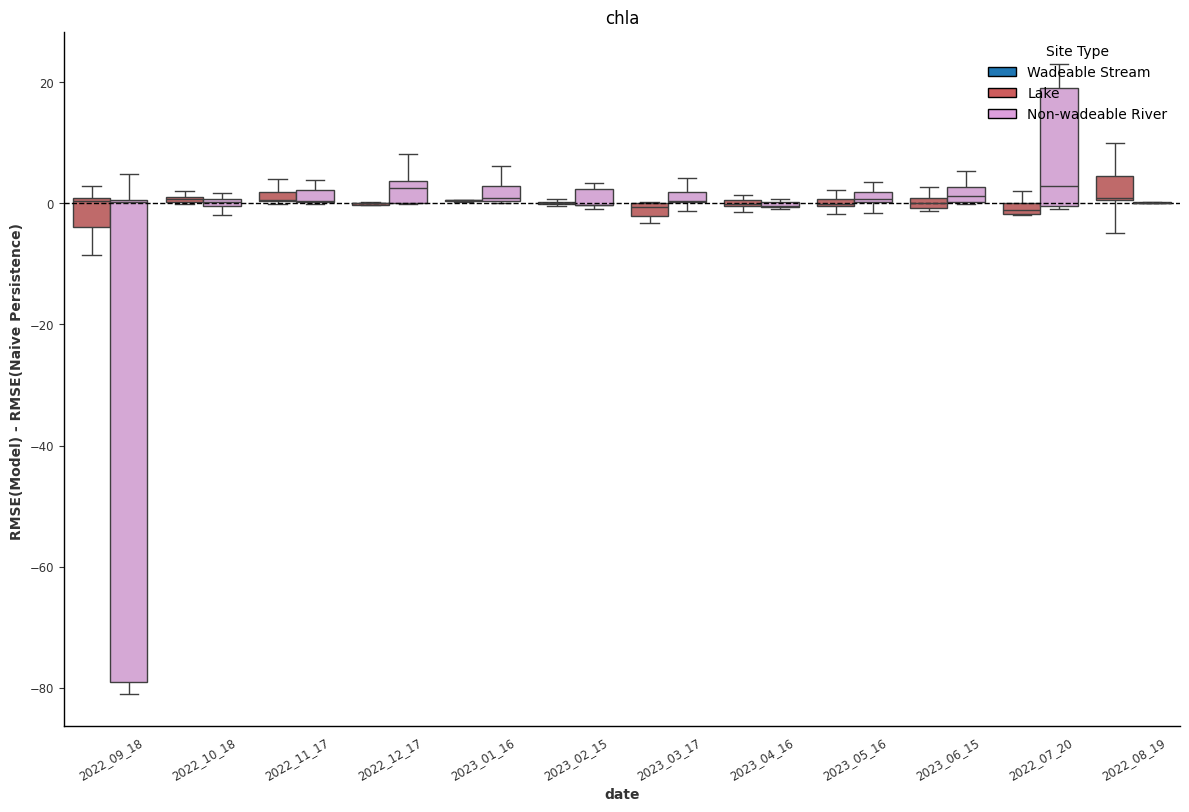

In [11]:
for target_variable in target_variables:
    plot_window_and_sitetype_performance(global_dfs[target_variable]['inter'], metadata, f'{target_variable}', historical=False)

### Global Performance by Geographical Cluster

#### Historical Comparison

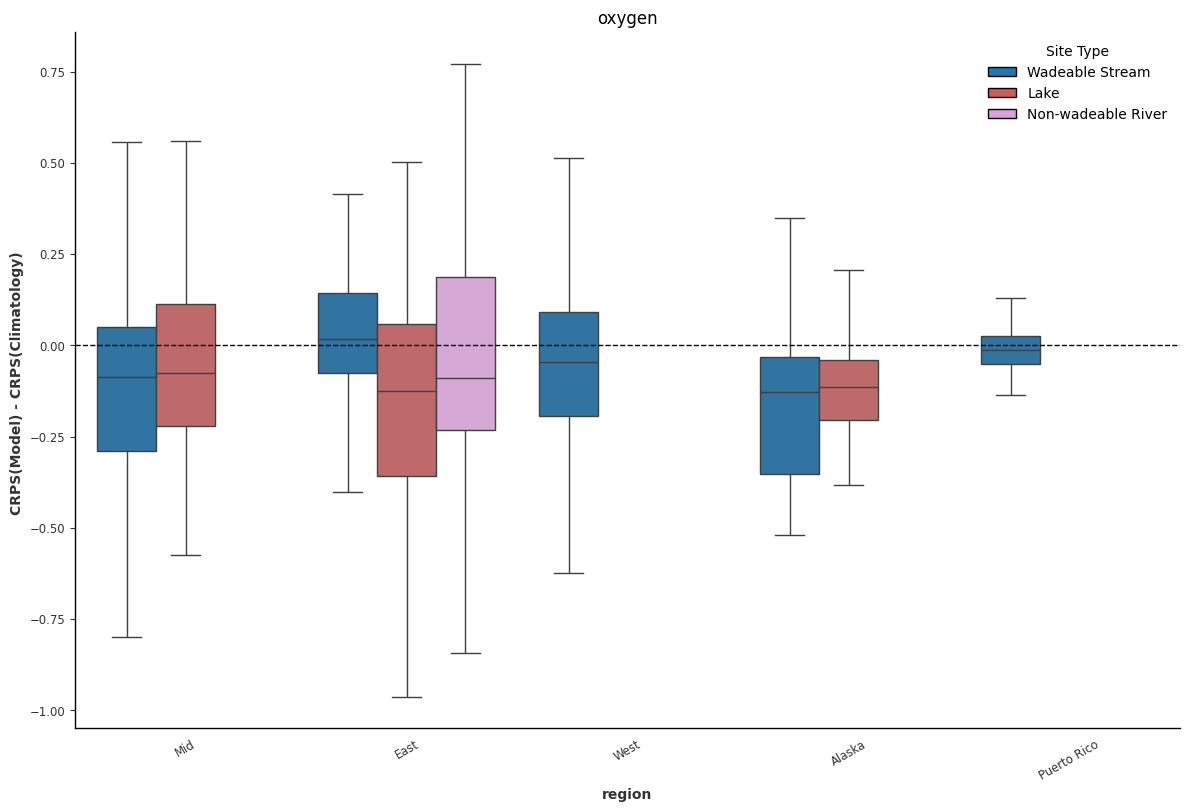

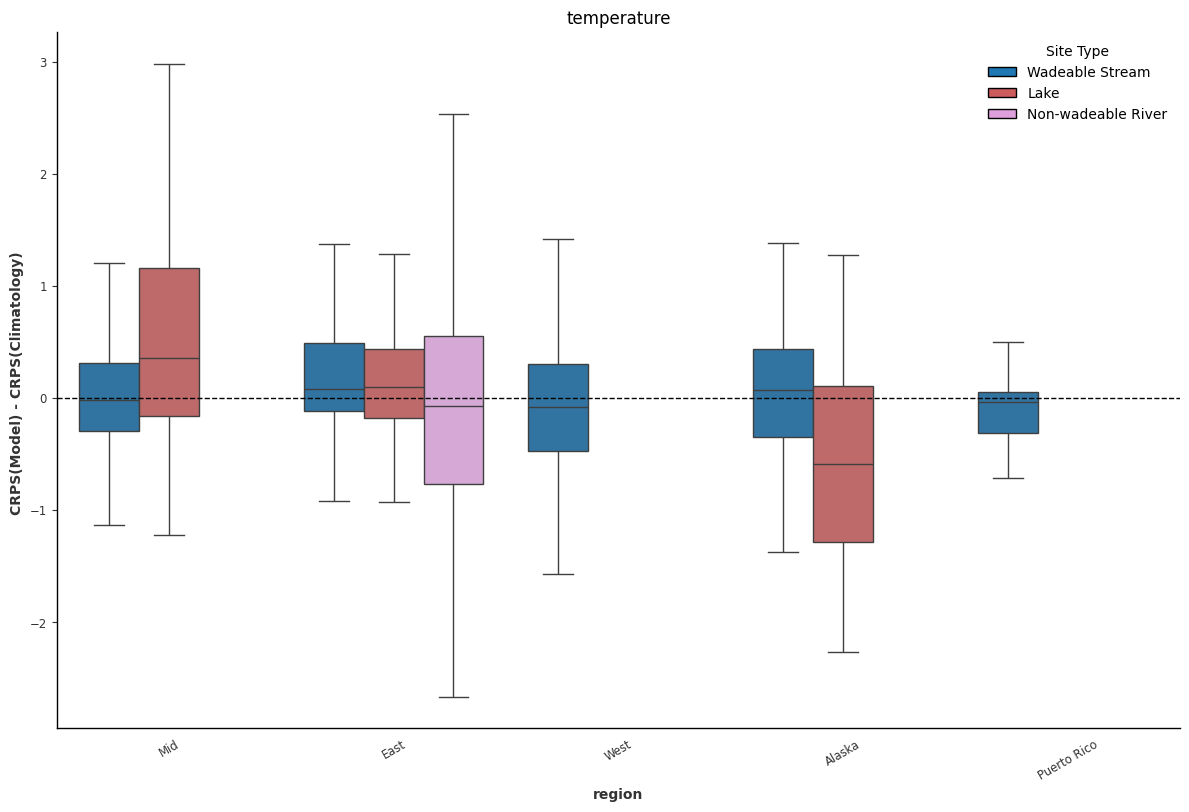

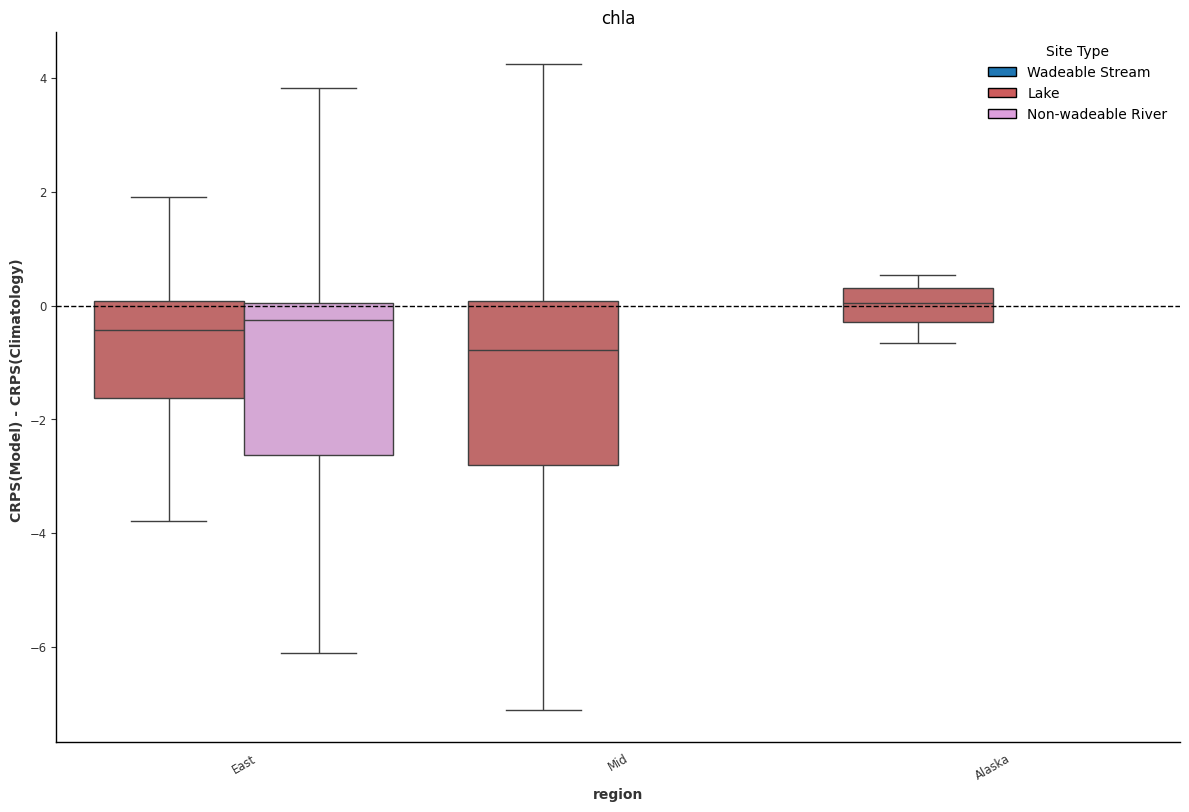

In [12]:
for target_variable in target_variables:
    plot_region_percentages(global_dfs[target_variable]['inter'], metadata, f'{target_variable}')

#### Naive Comparison

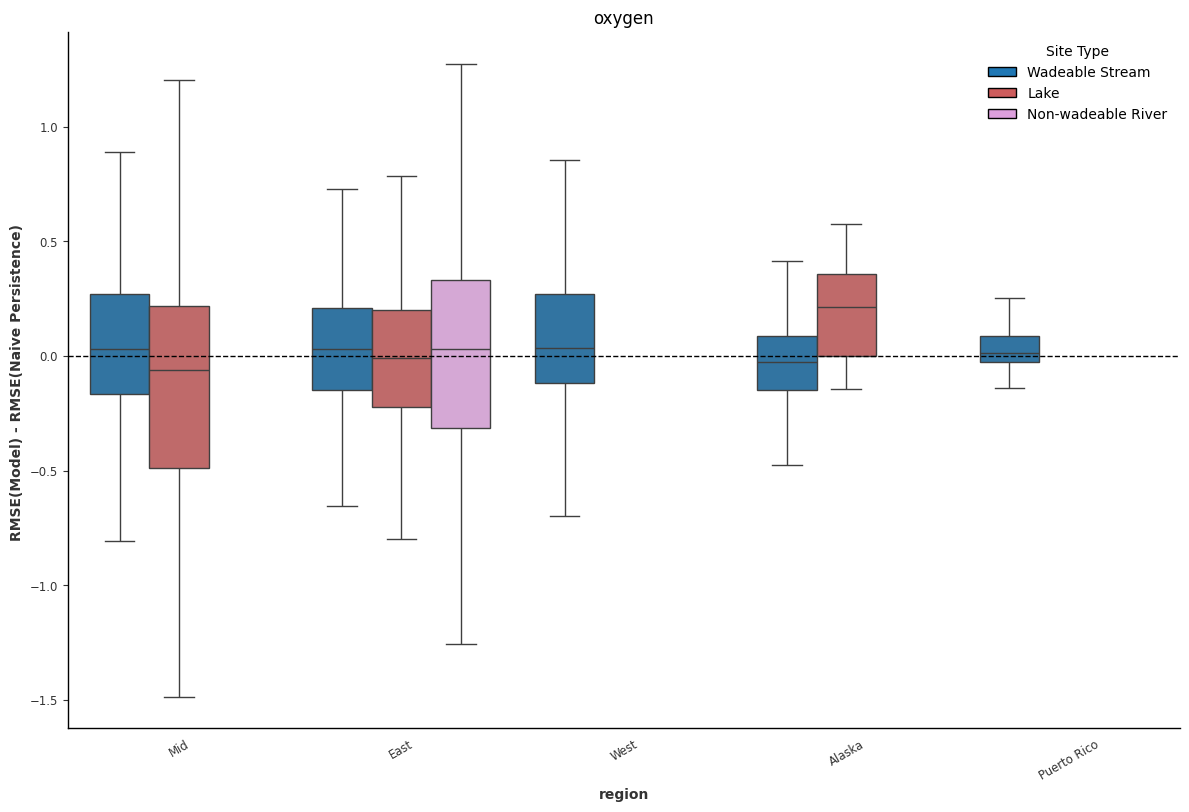

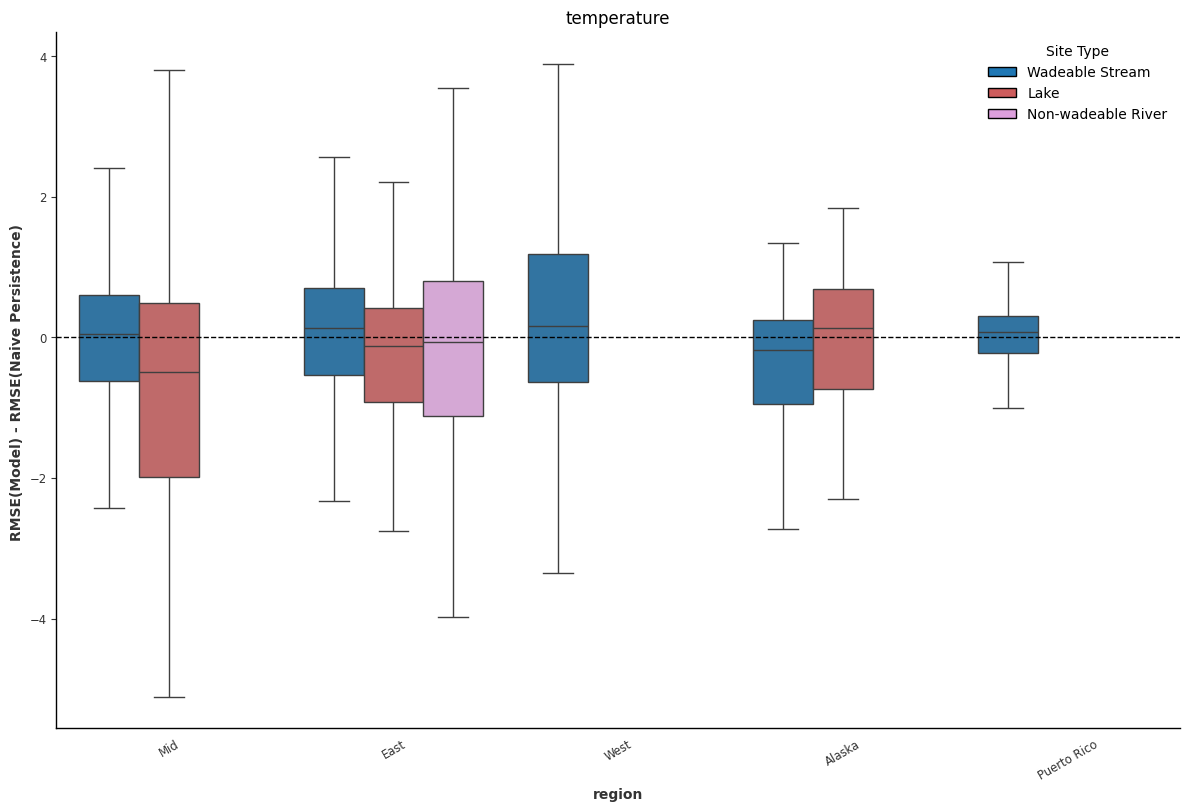

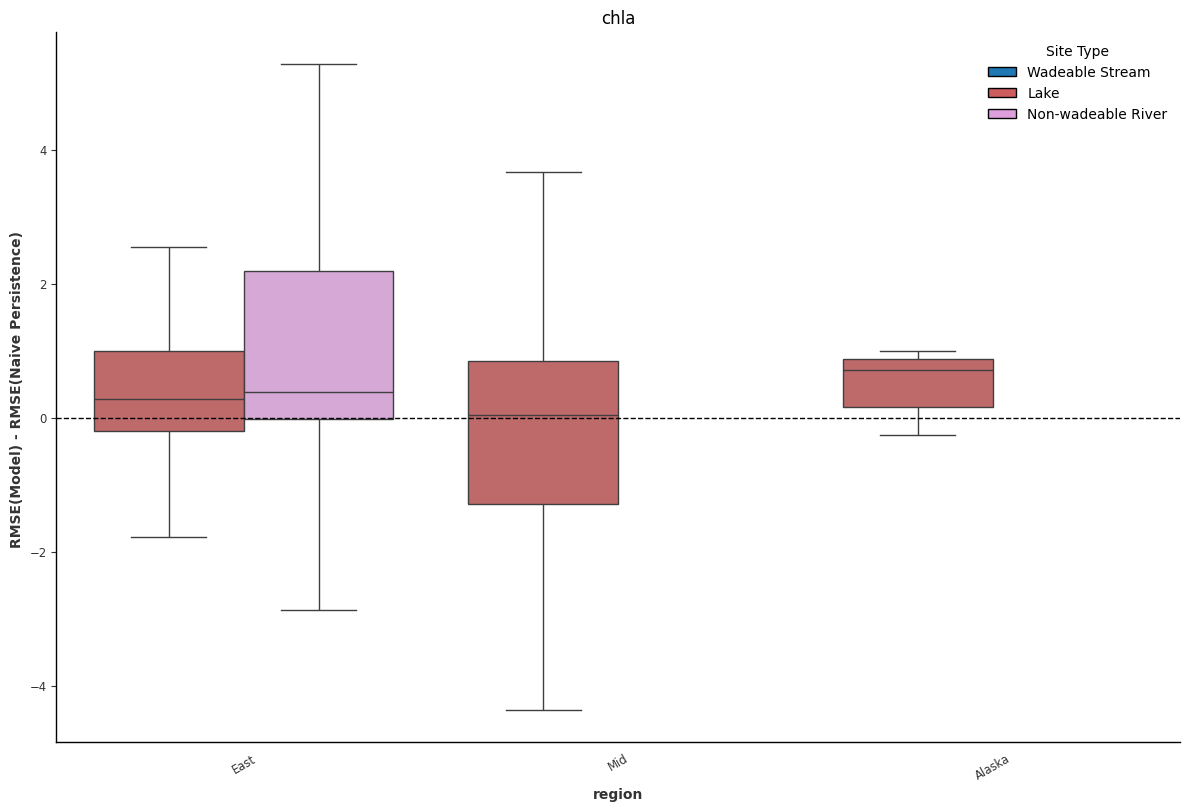

In [13]:
for target_variable in target_variables:
    plot_region_percentages(global_dfs[target_variable]['inter'], metadata, f'{target_variable}', historical=False)

### Model Performance by Site

#### Historical Comparison

##### Oxygen

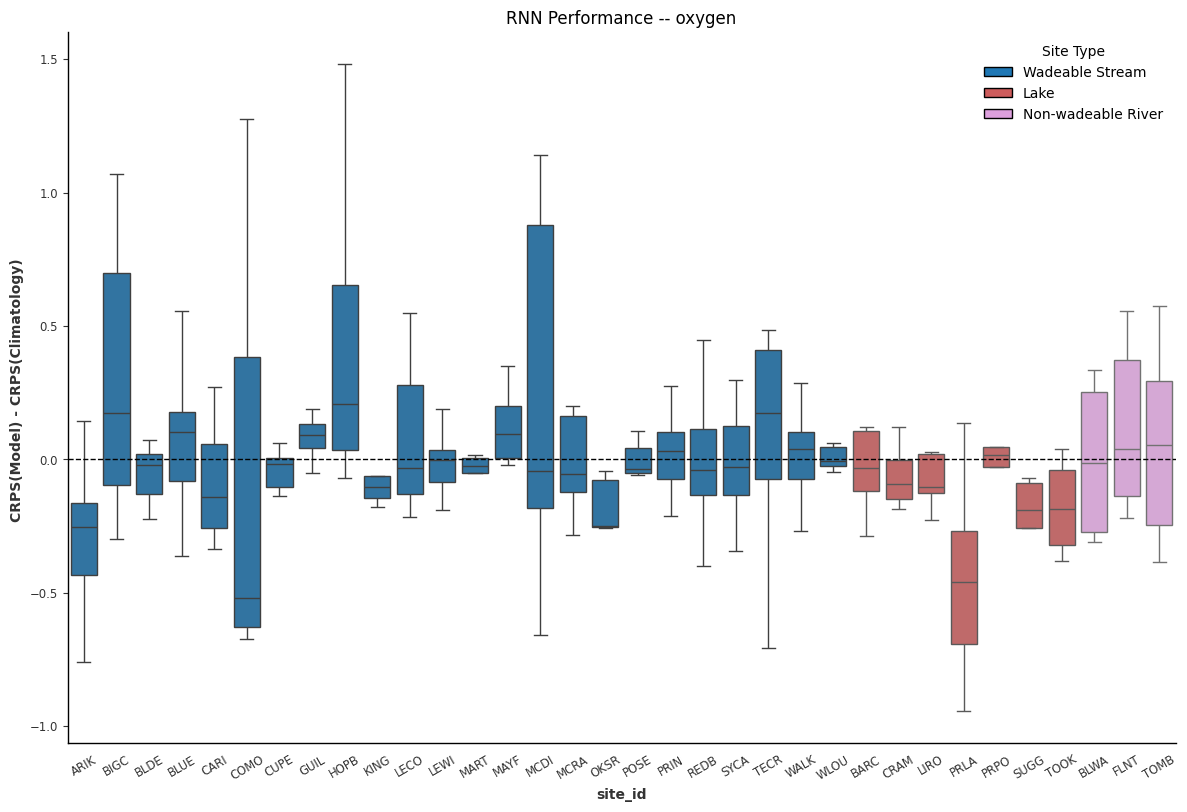

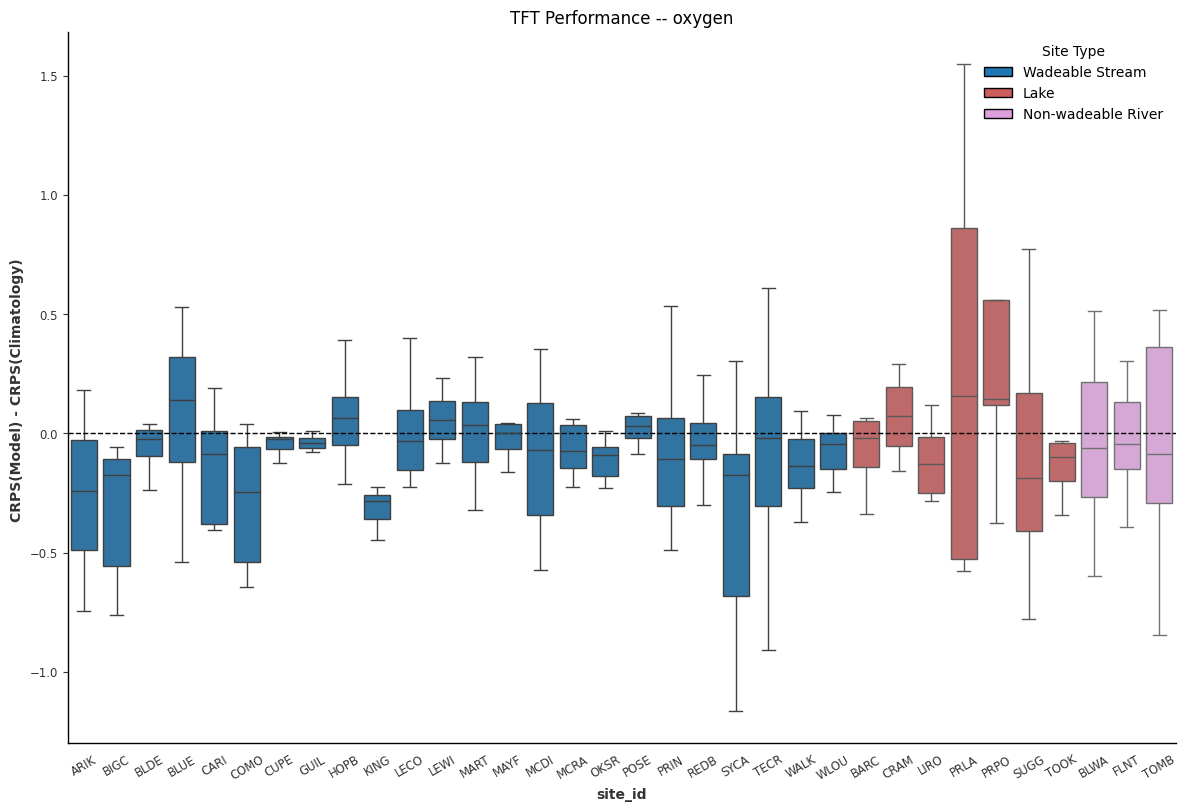

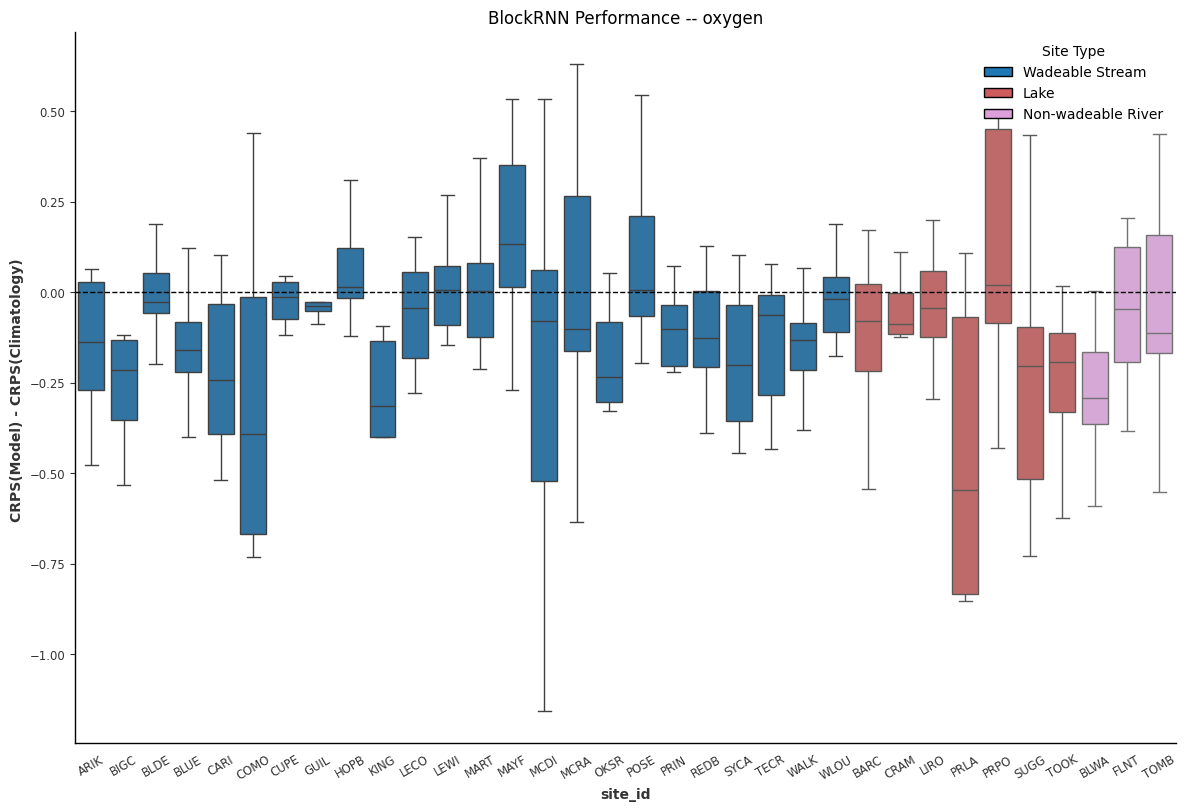

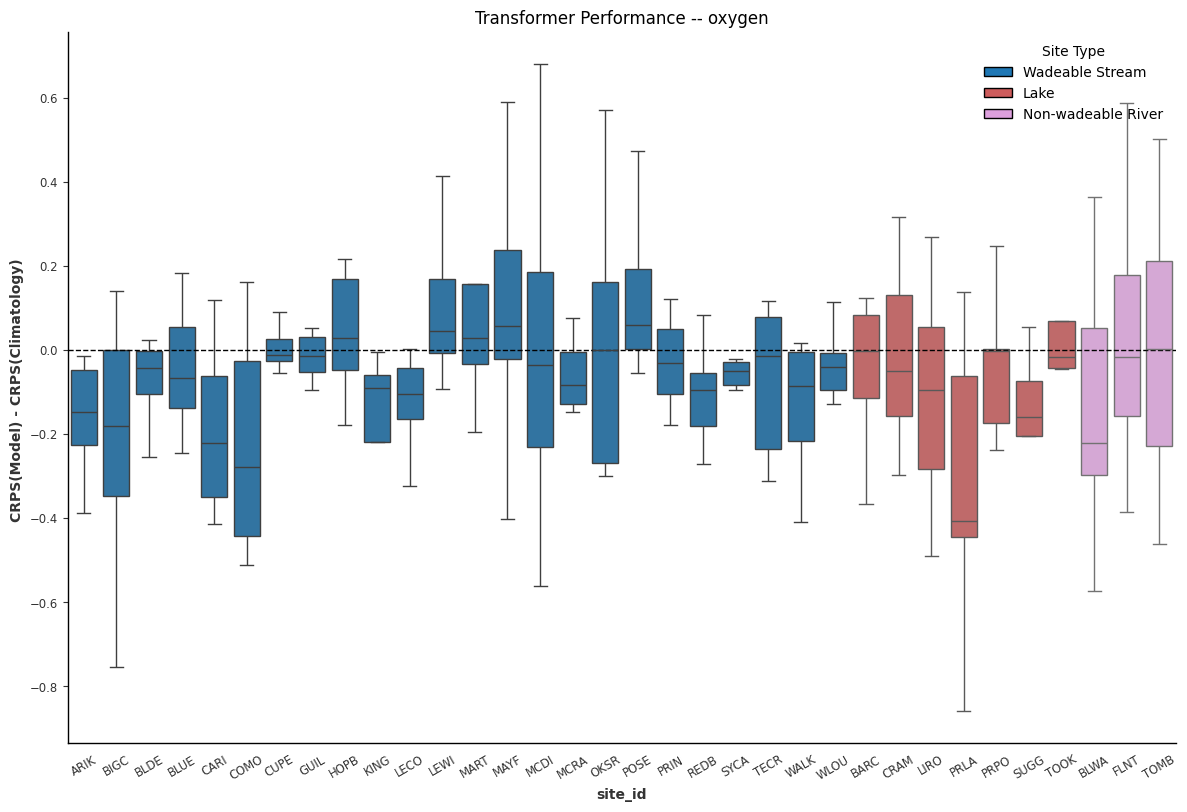

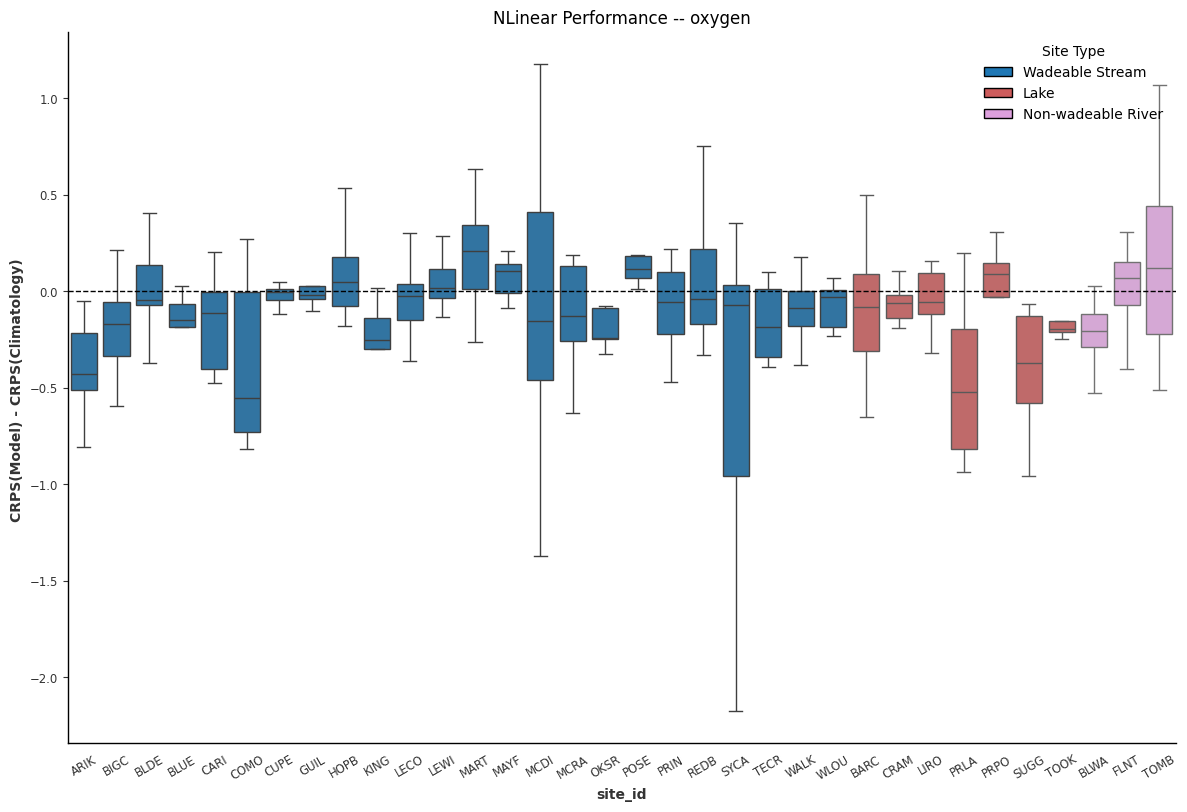

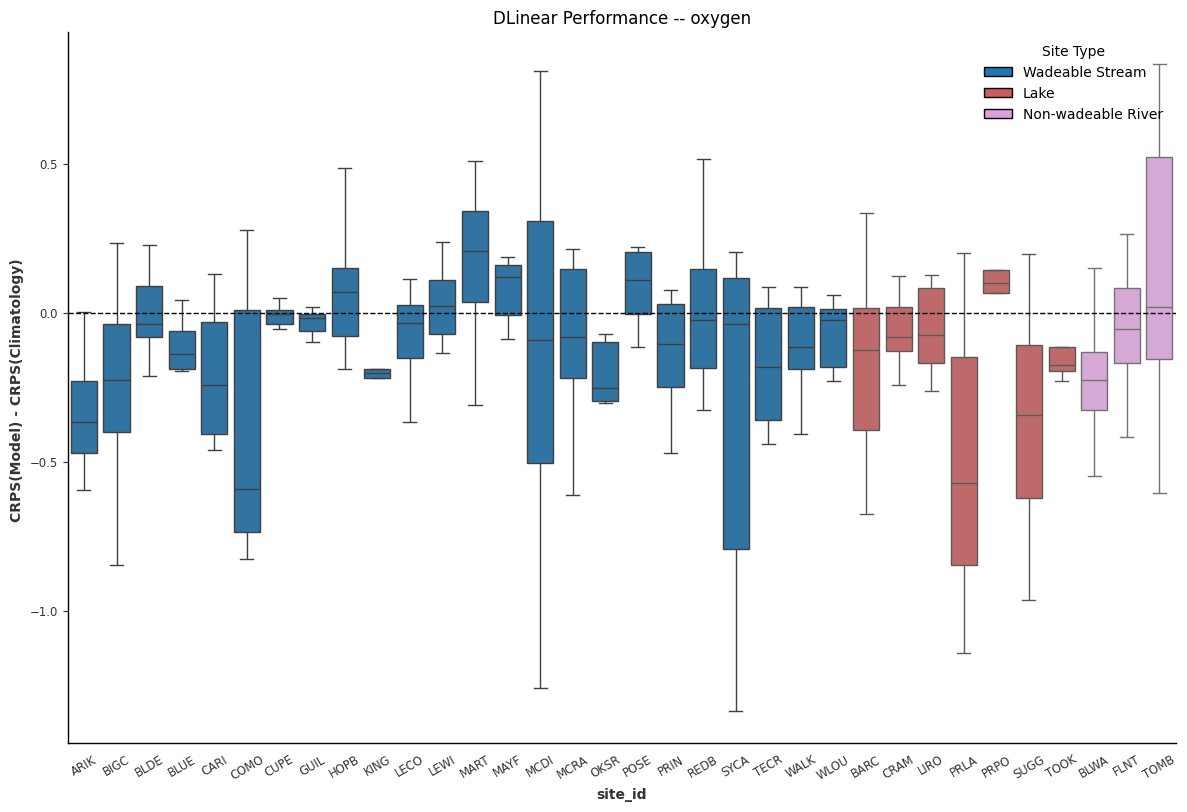

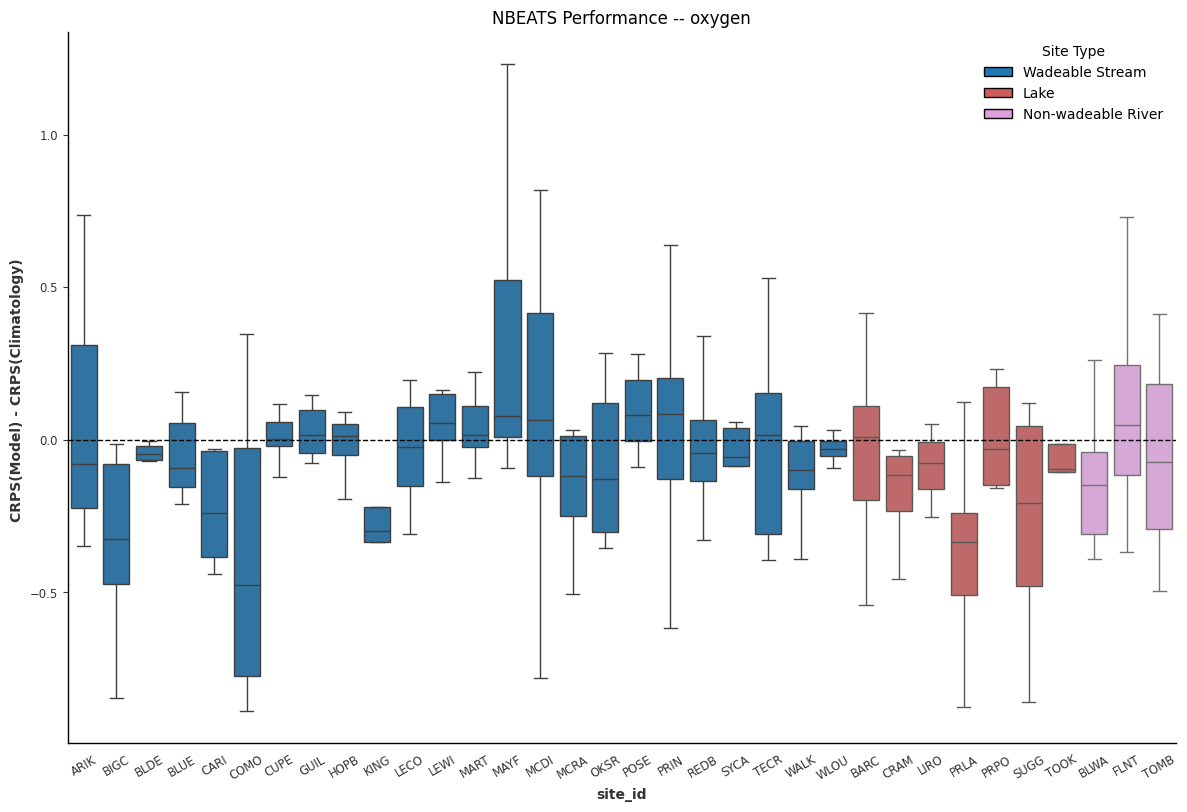

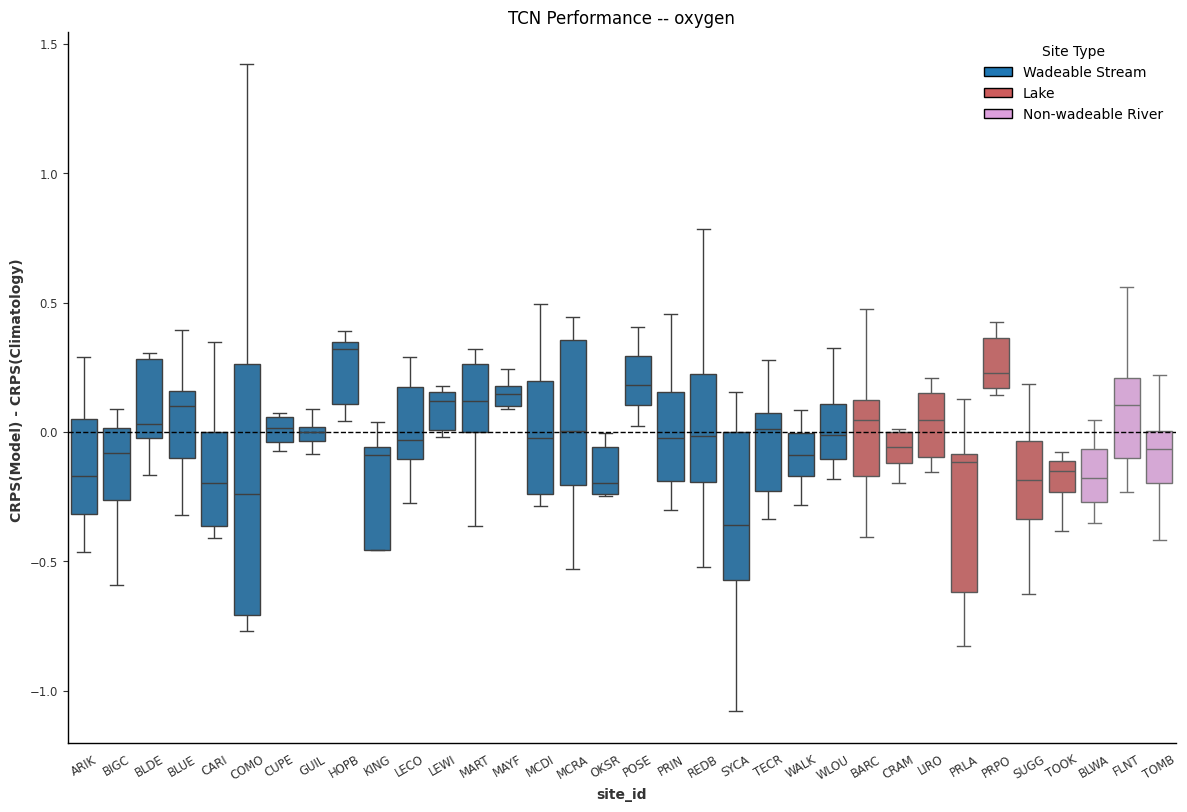

In [14]:
variable = 'oxygen'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable]['inter'], metadata, f'{model} Performance -- {variable}')

##### Temperature

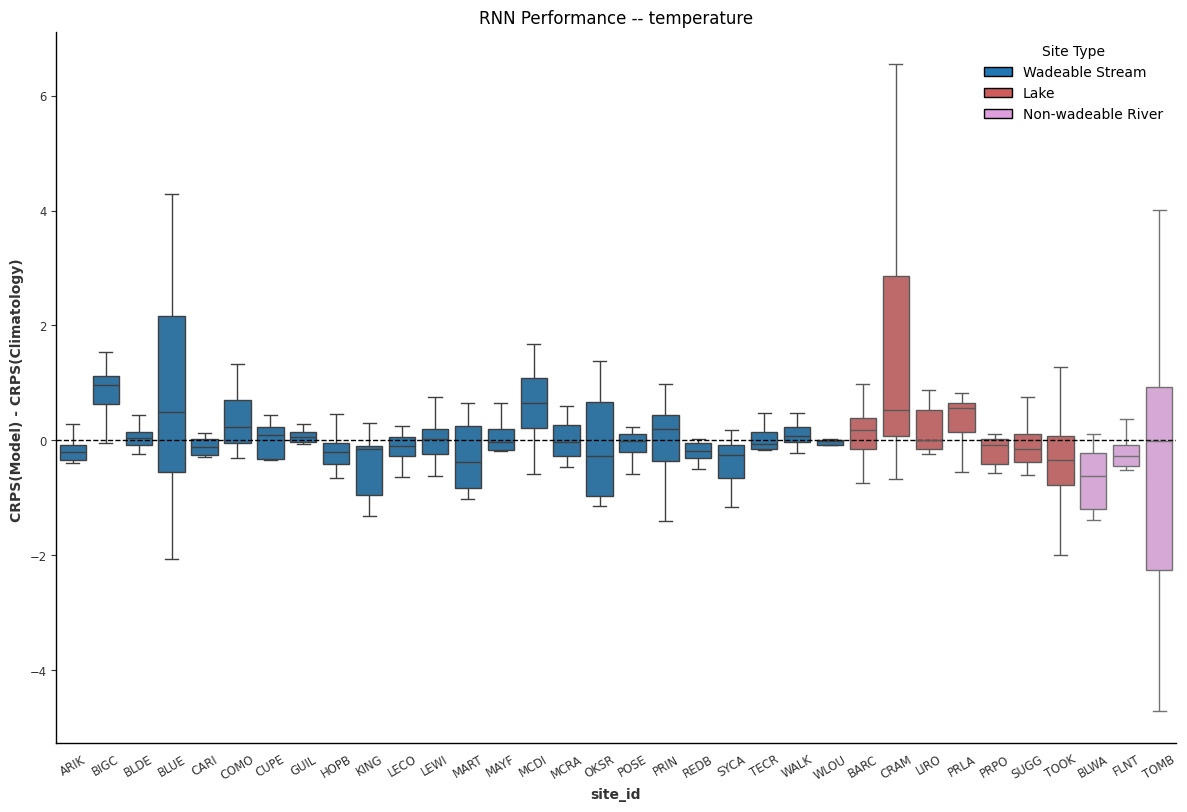

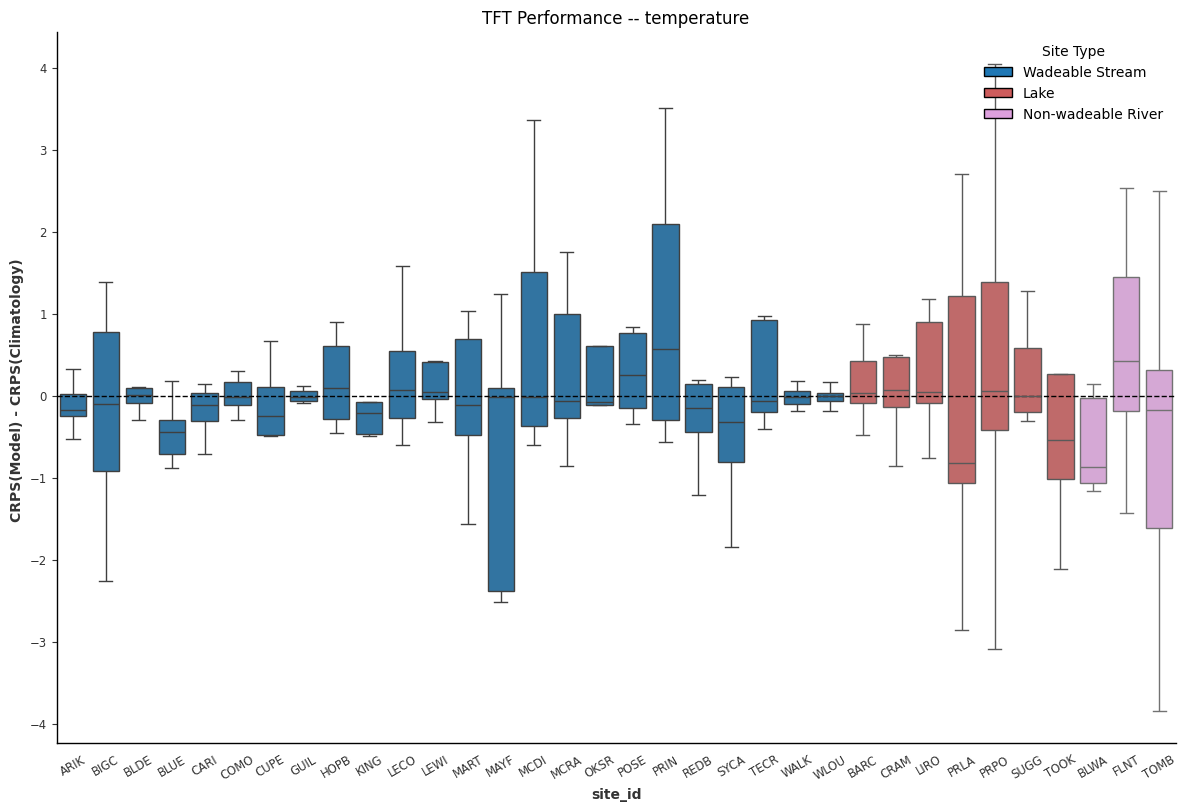

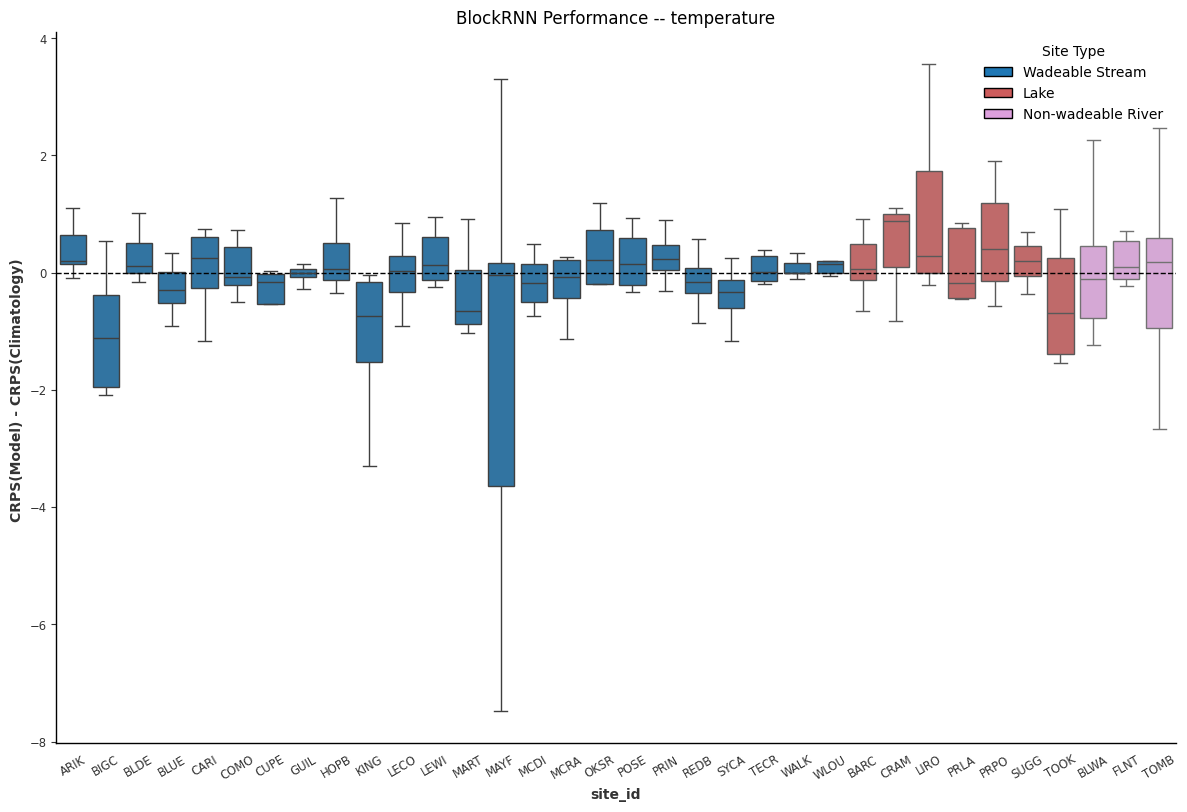

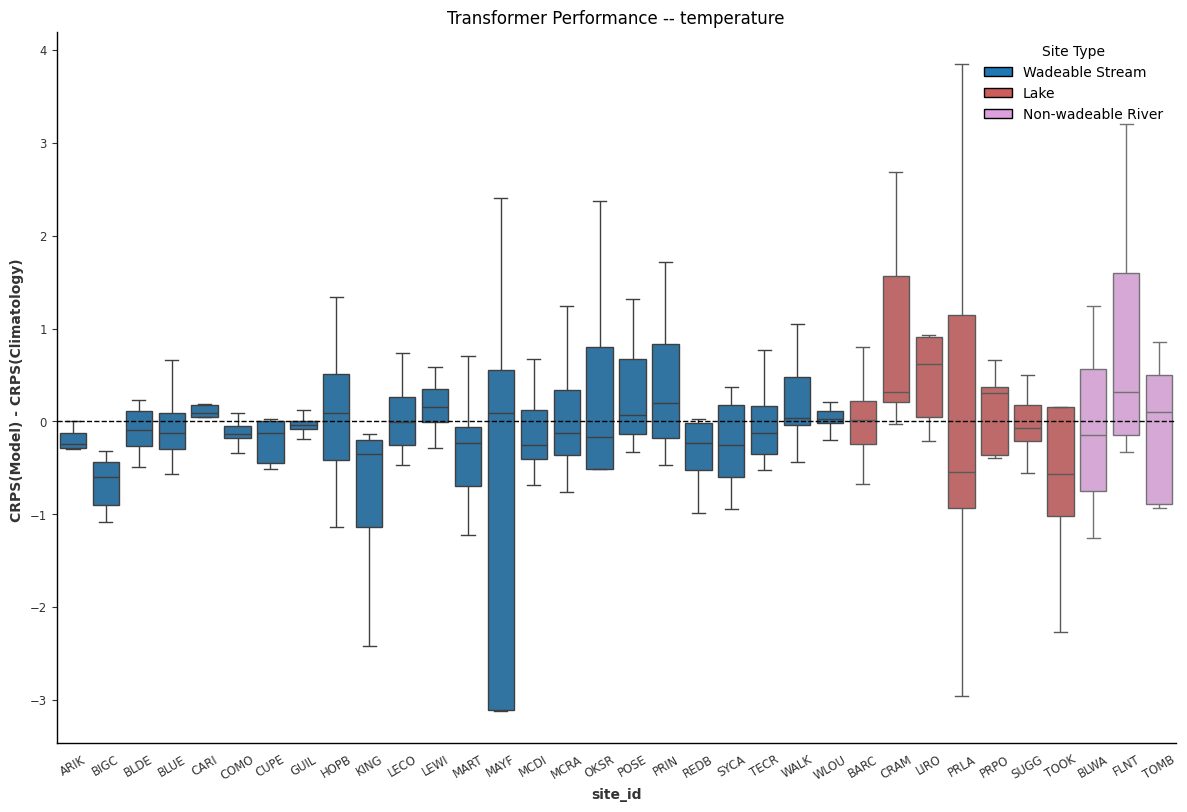

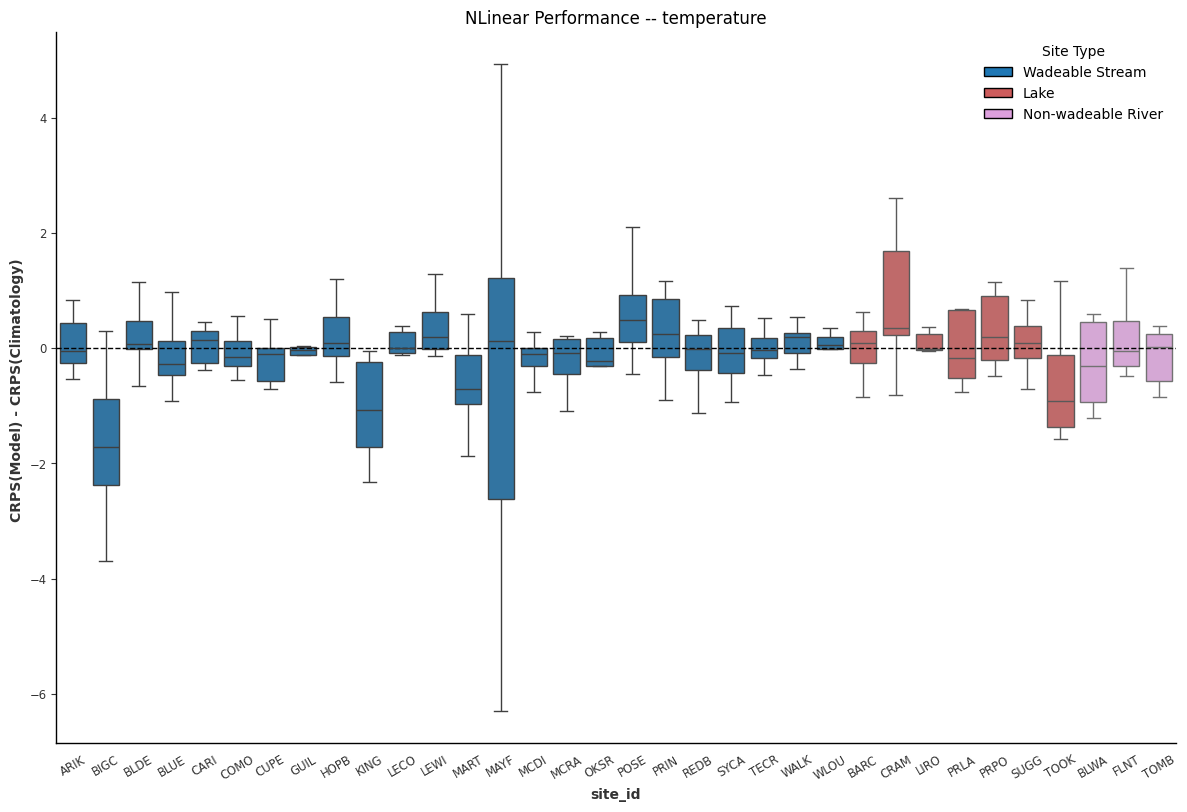

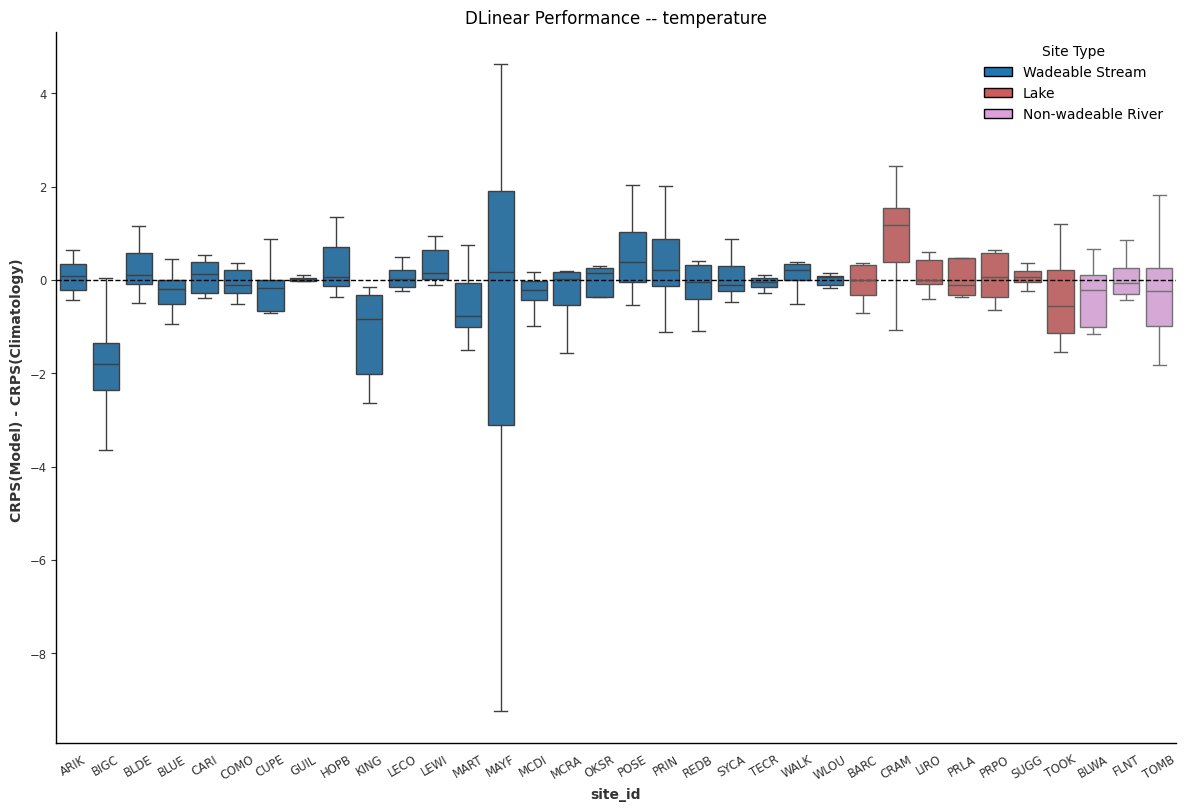

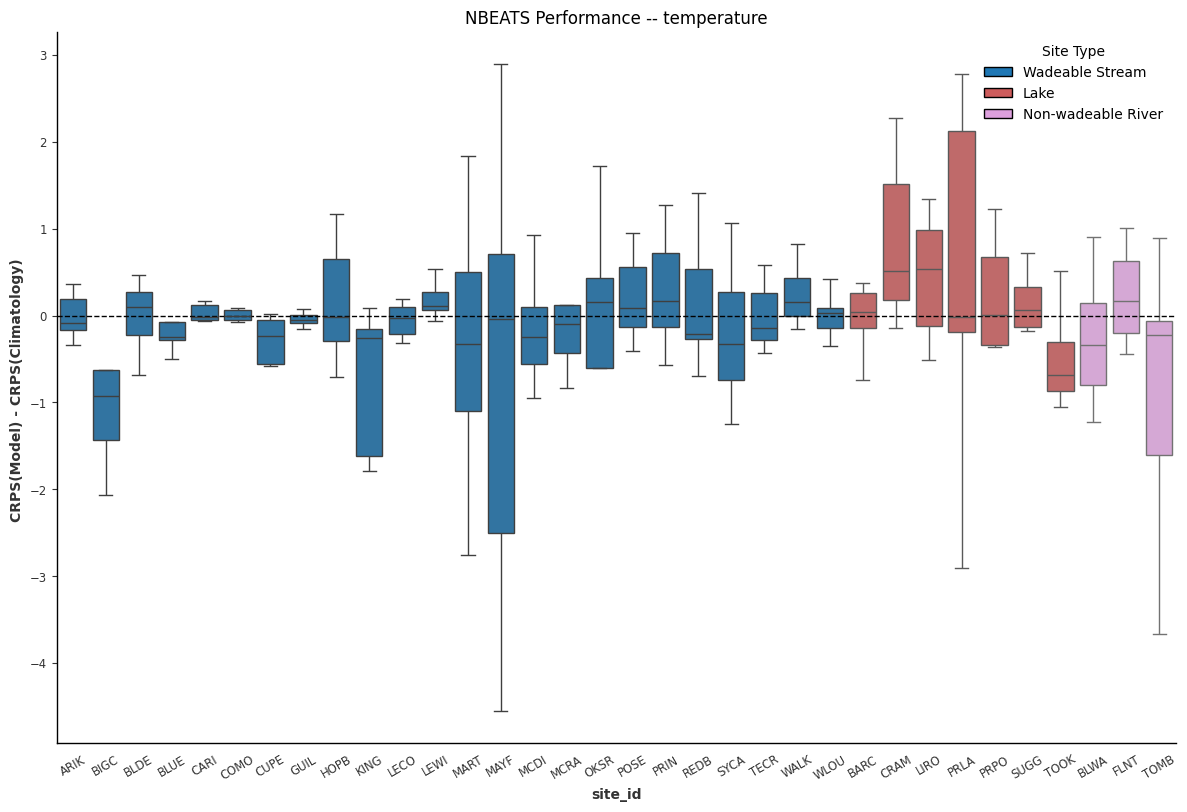

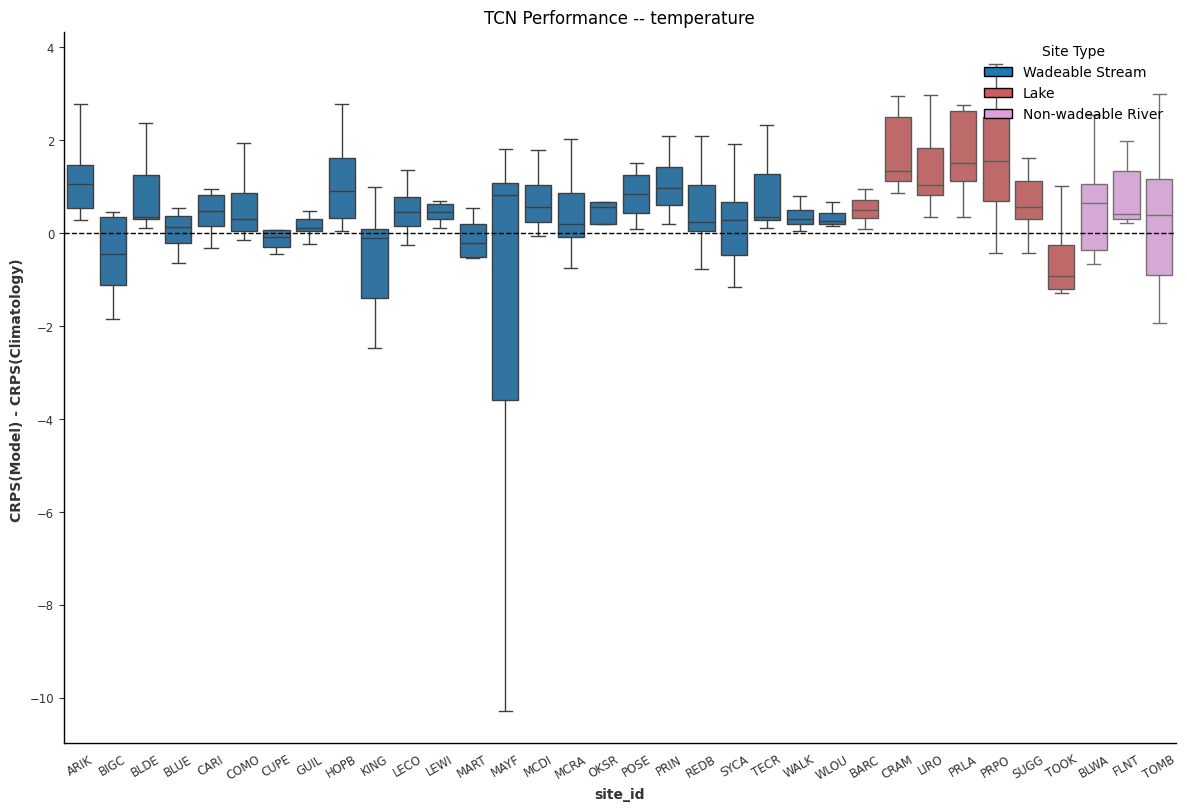

In [15]:
variable = 'temperature'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable]['inter'], metadata, f'{model} Performance -- {variable}')

##### Chla

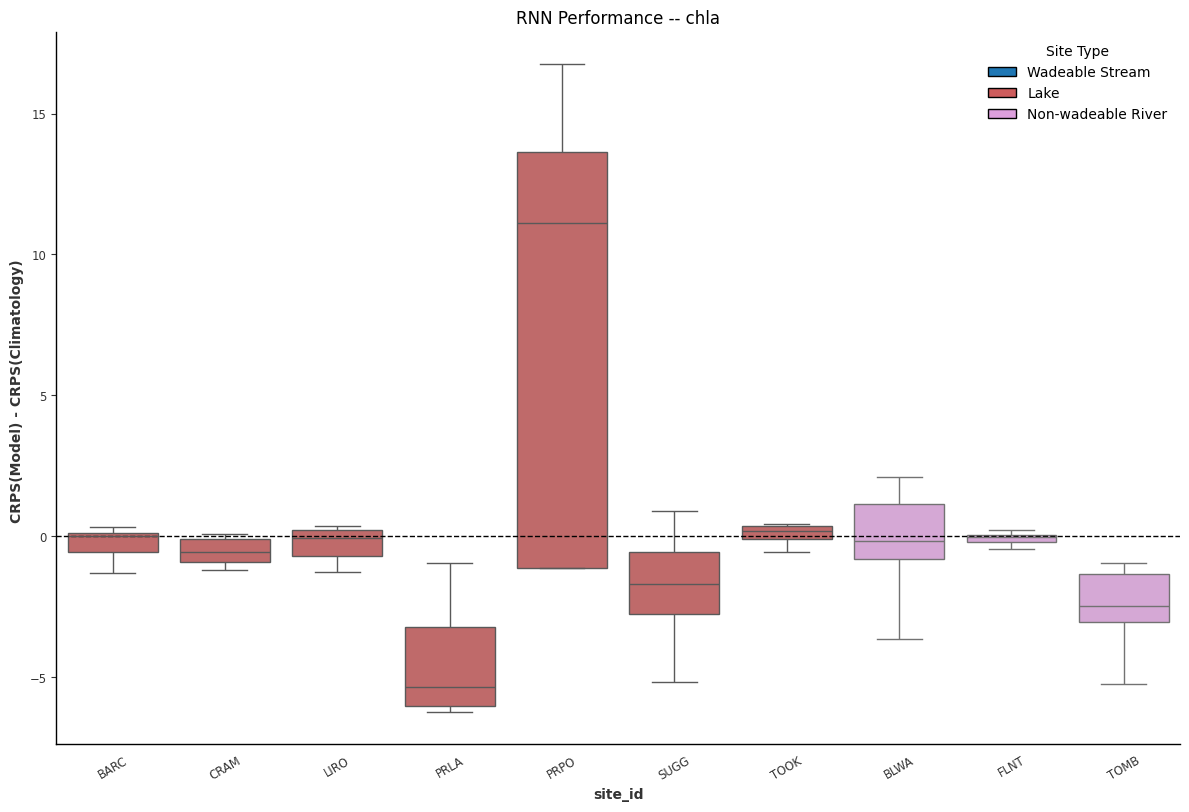

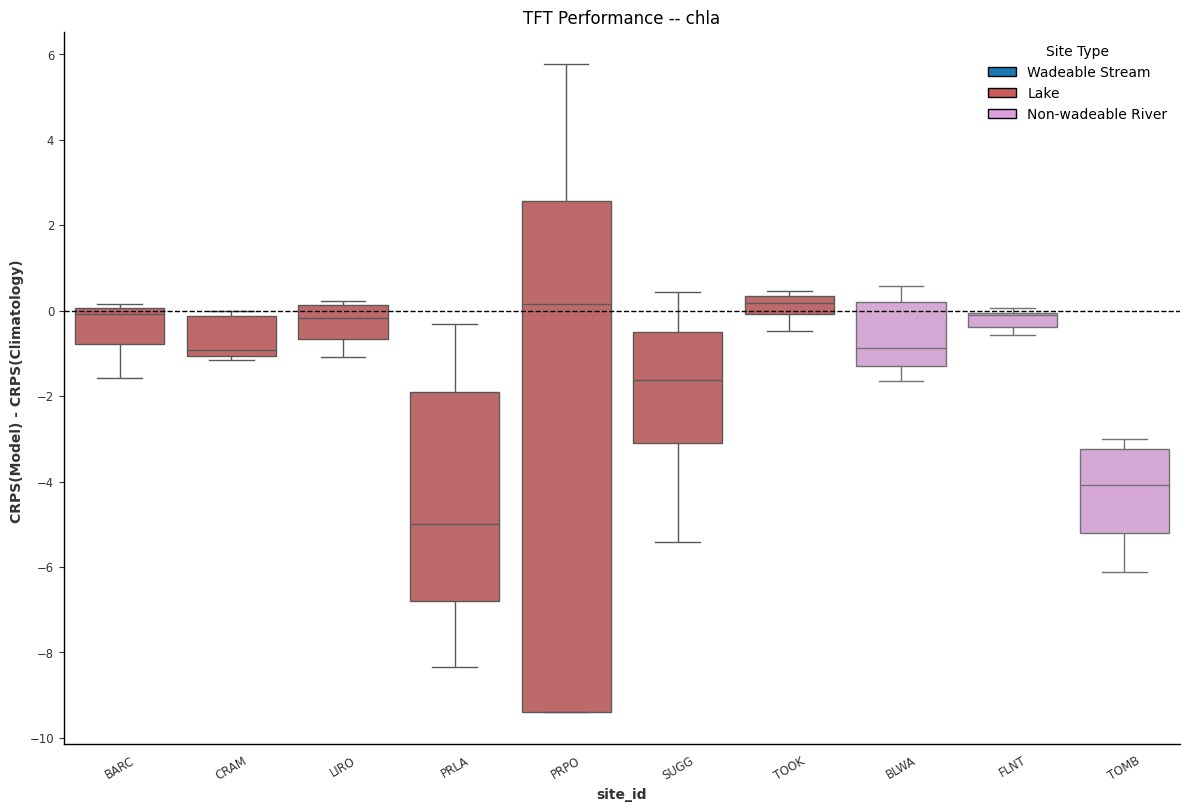

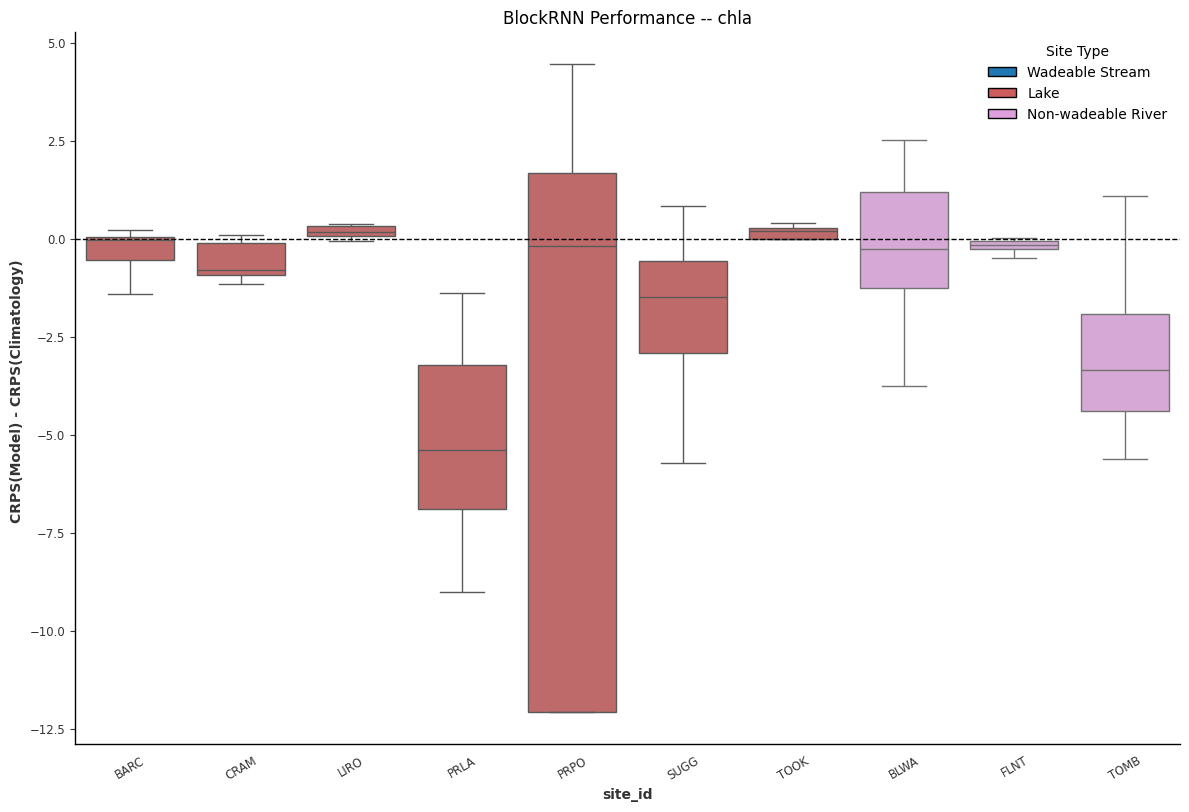

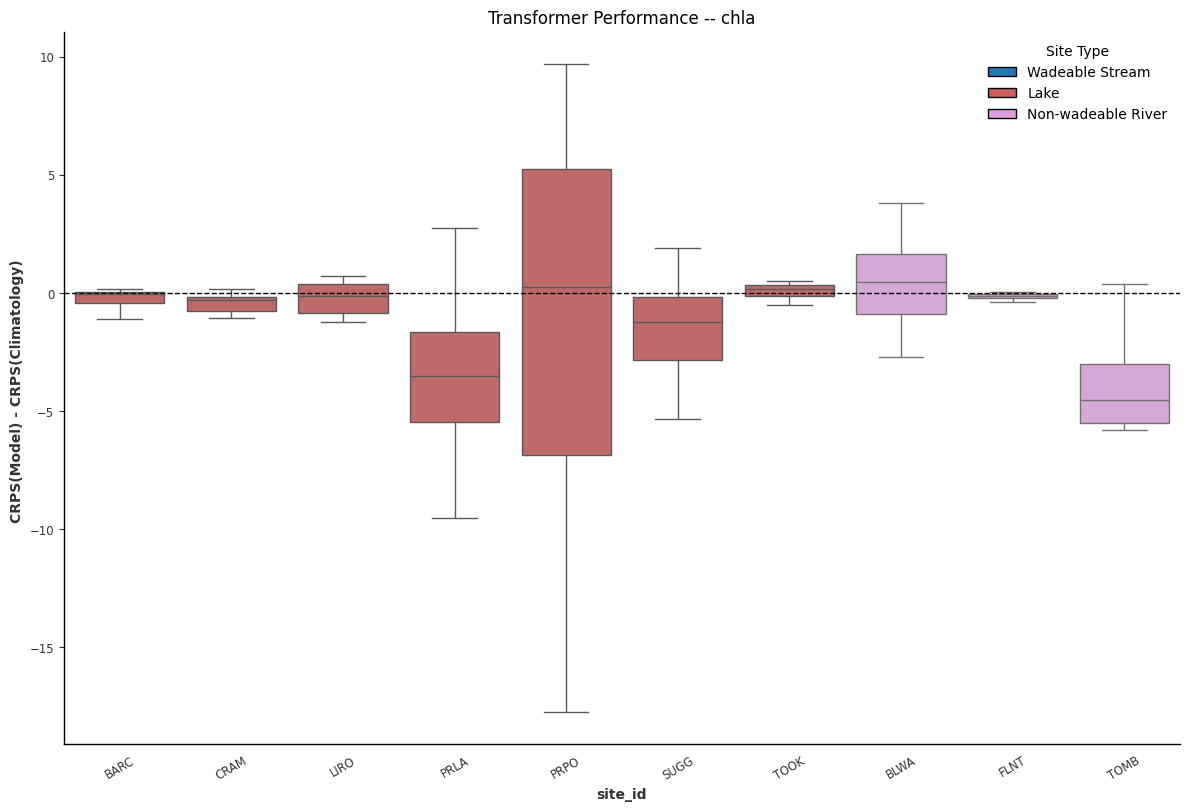

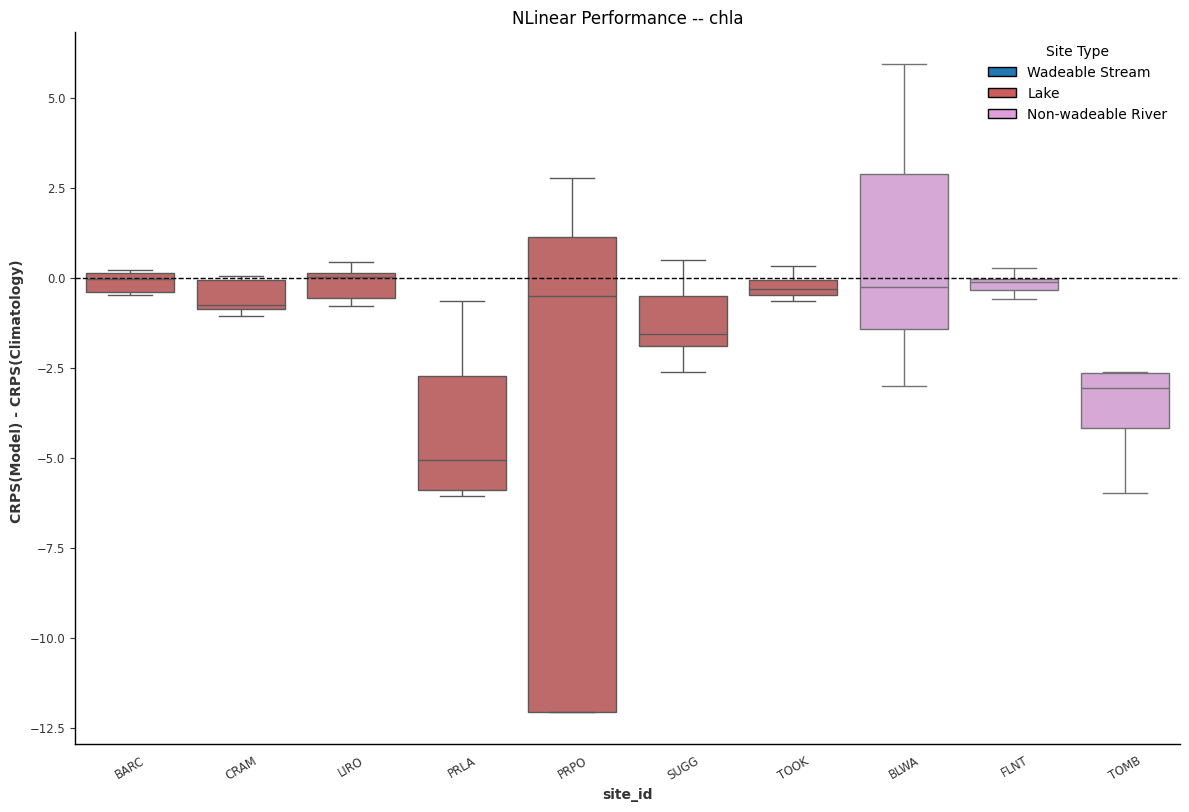

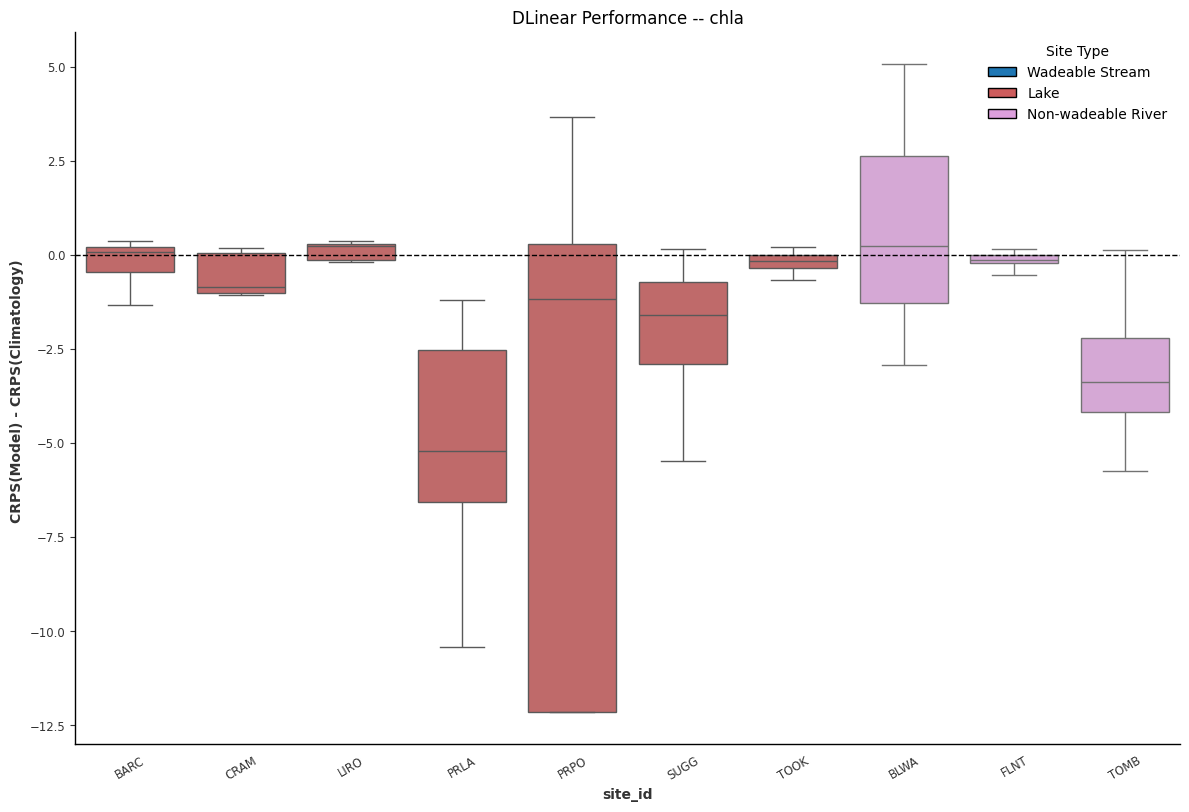

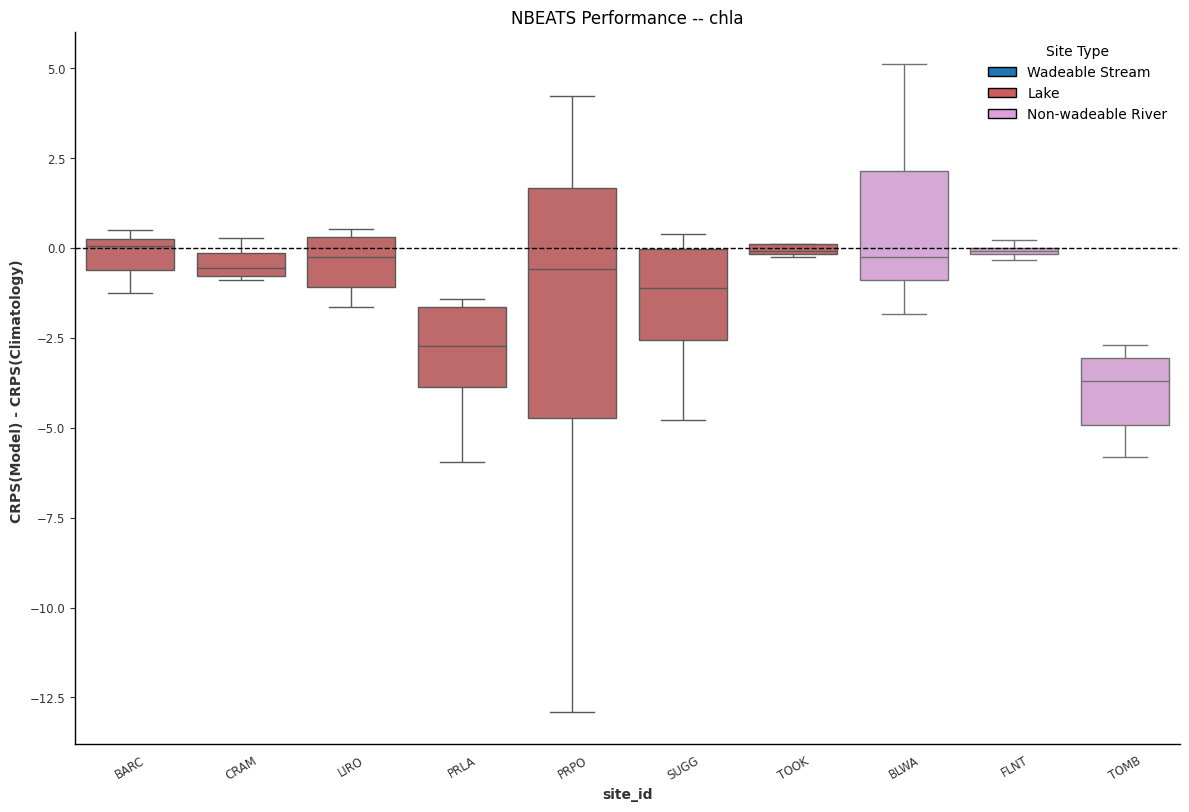

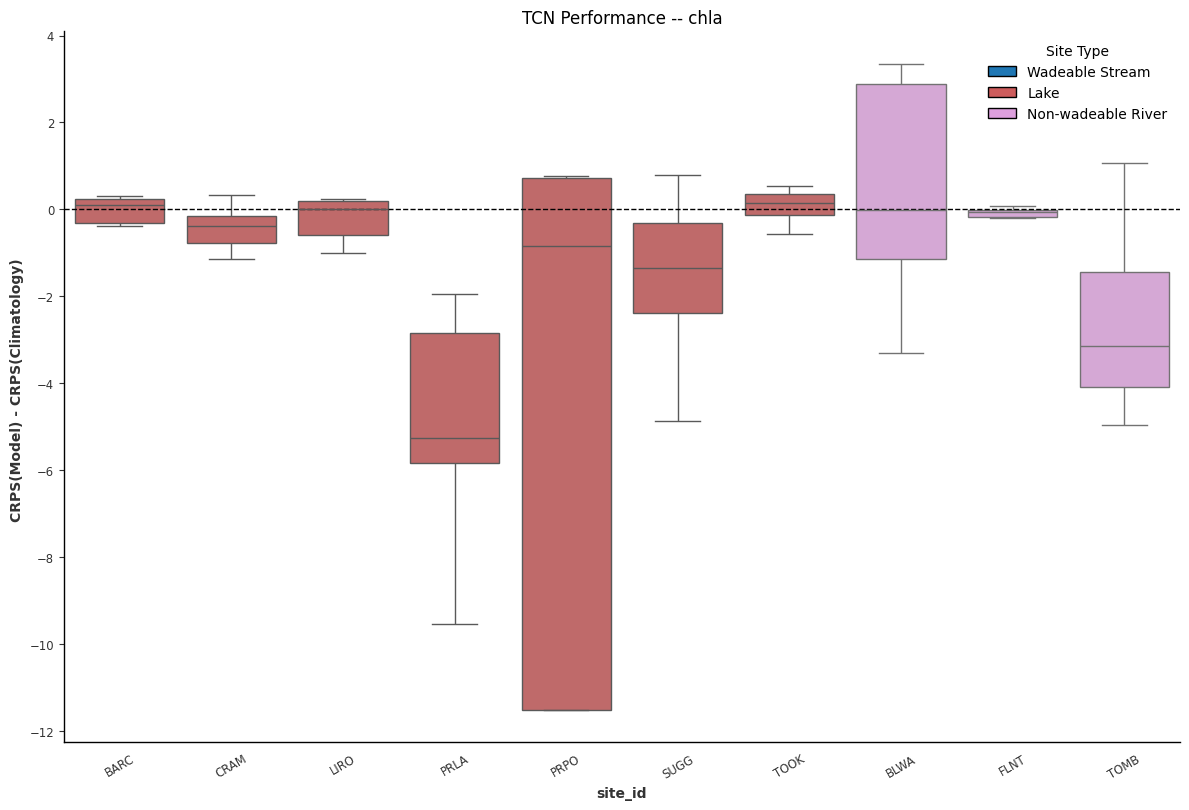

In [16]:
variable = 'chla'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable]['inter'], metadata, f'{model} Performance -- {variable}')

#### Naive Comparison

##### Oxygen

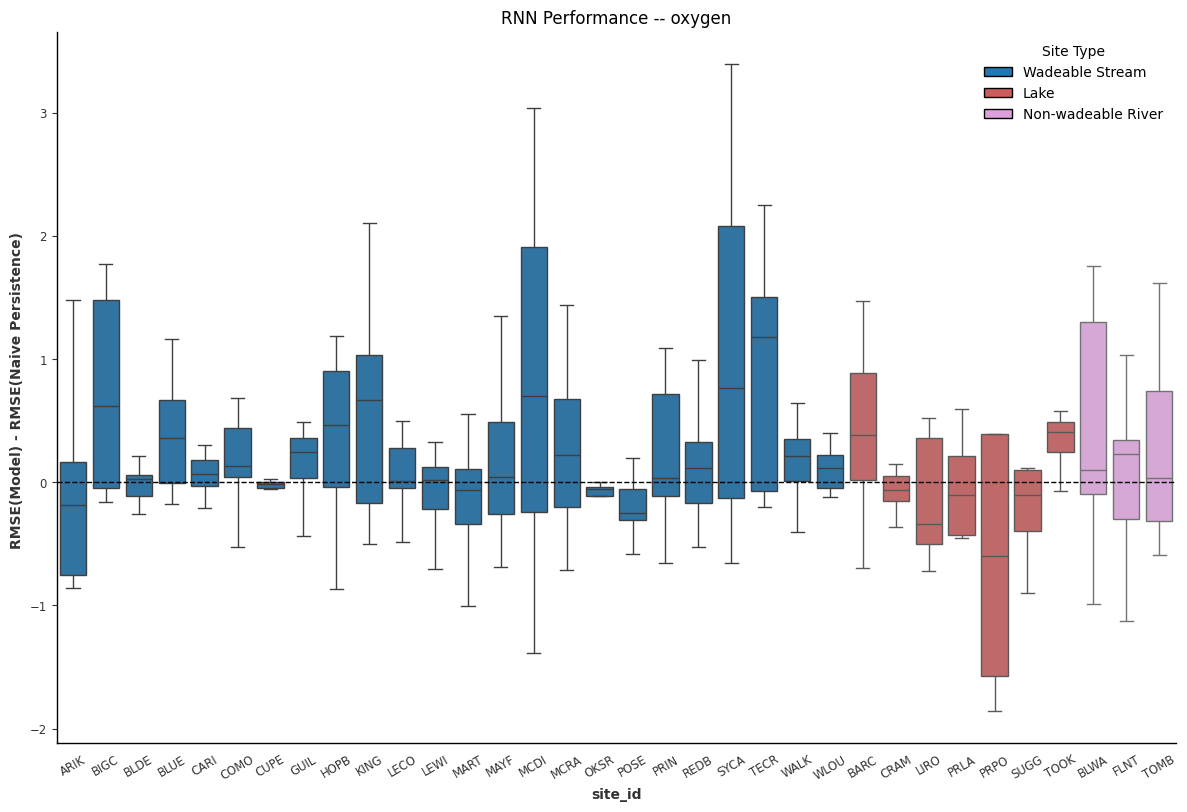

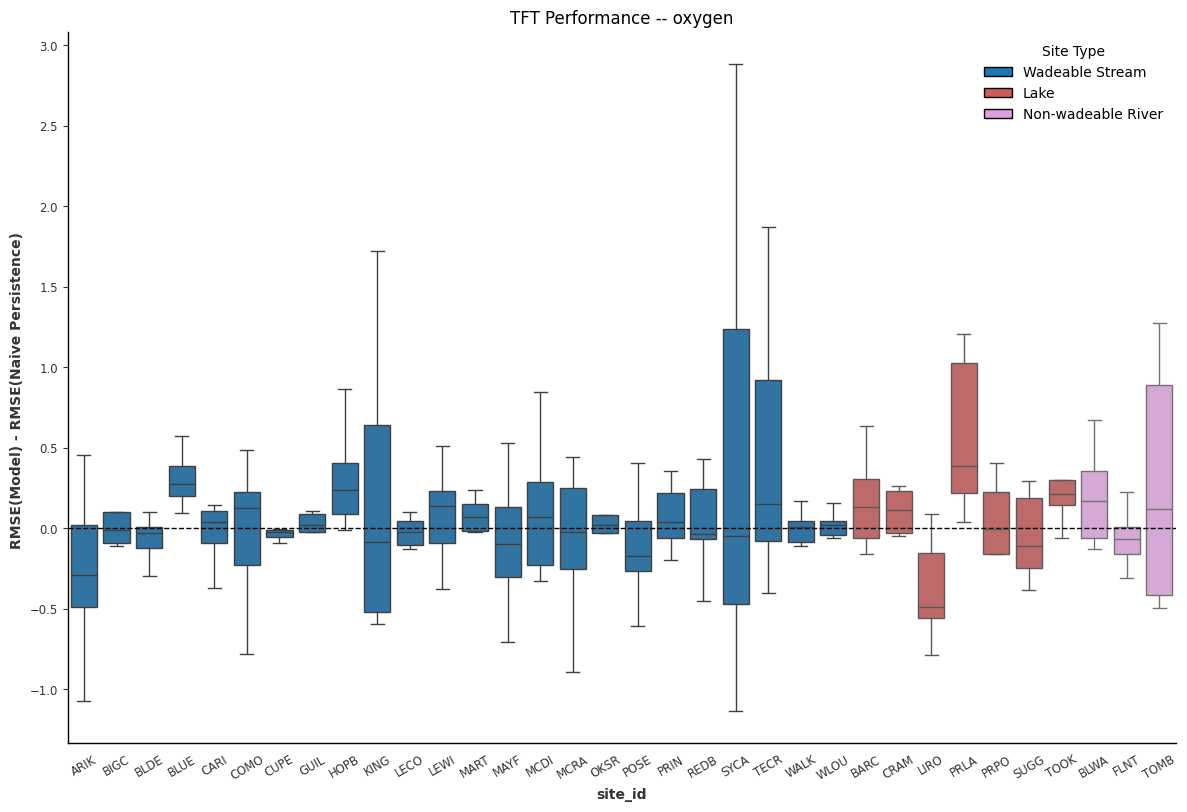

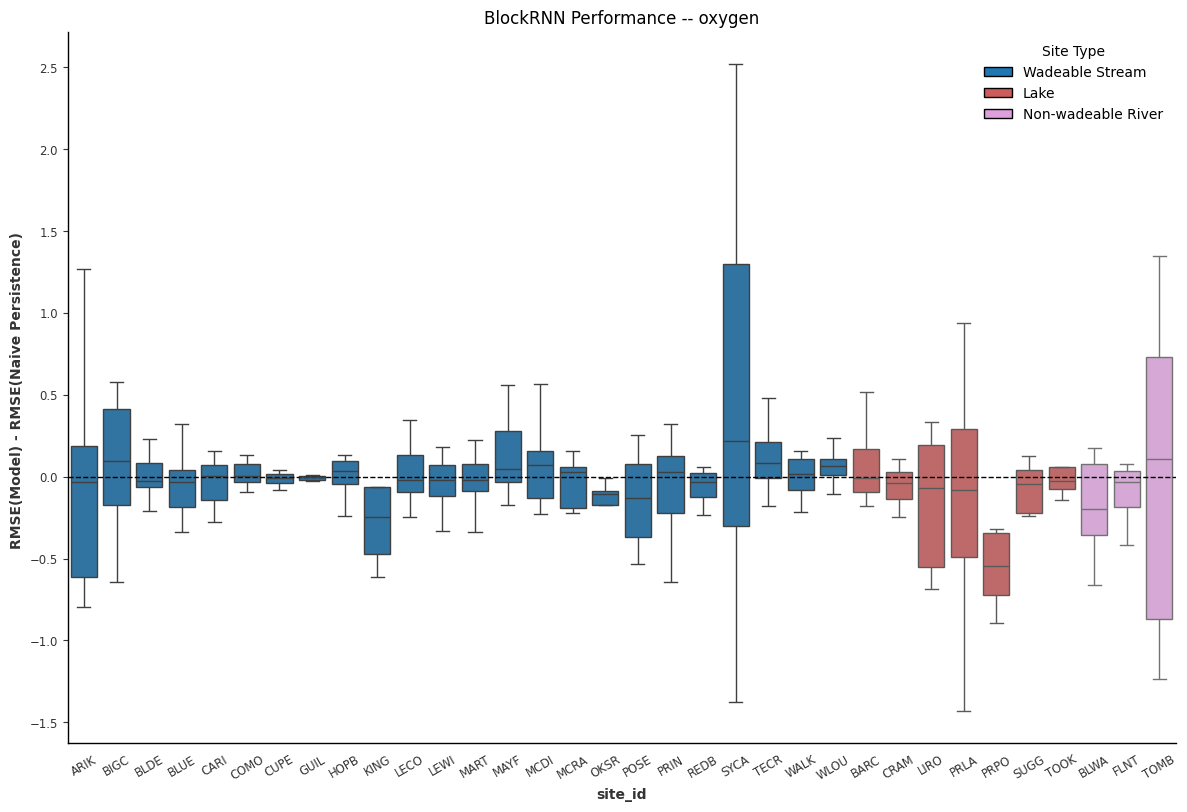

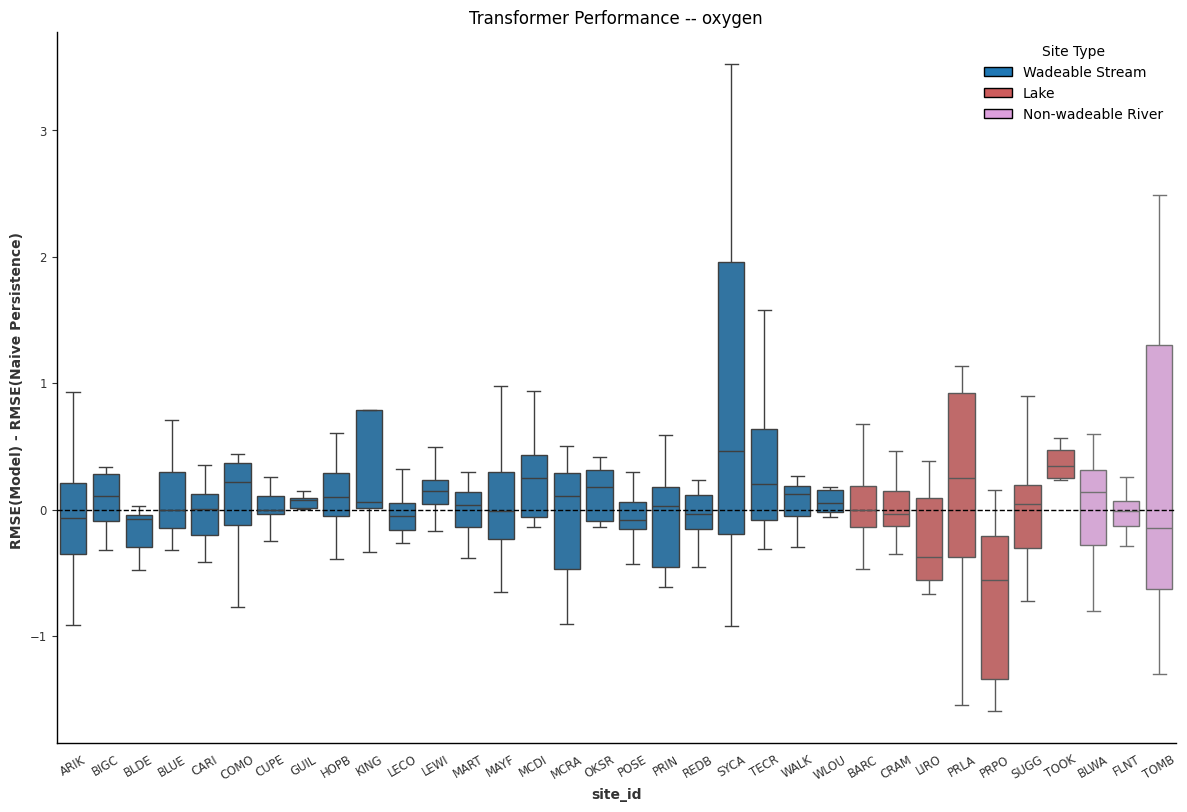

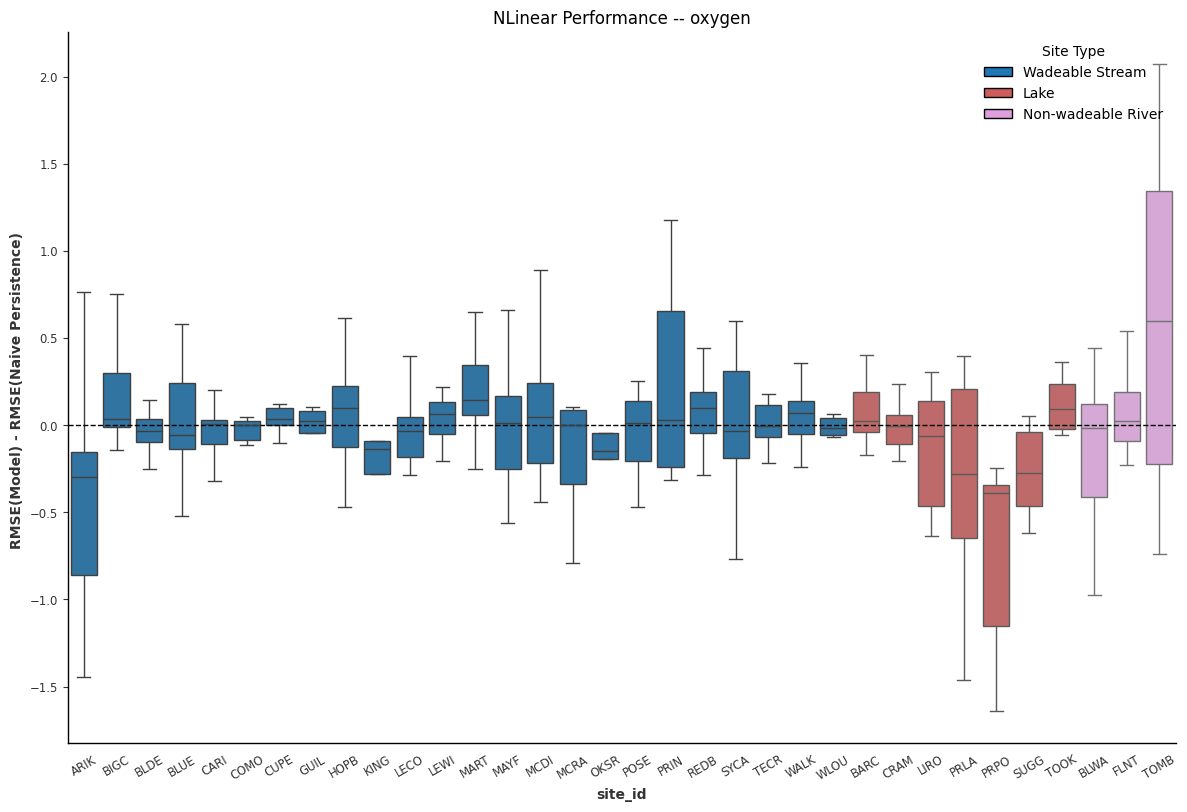

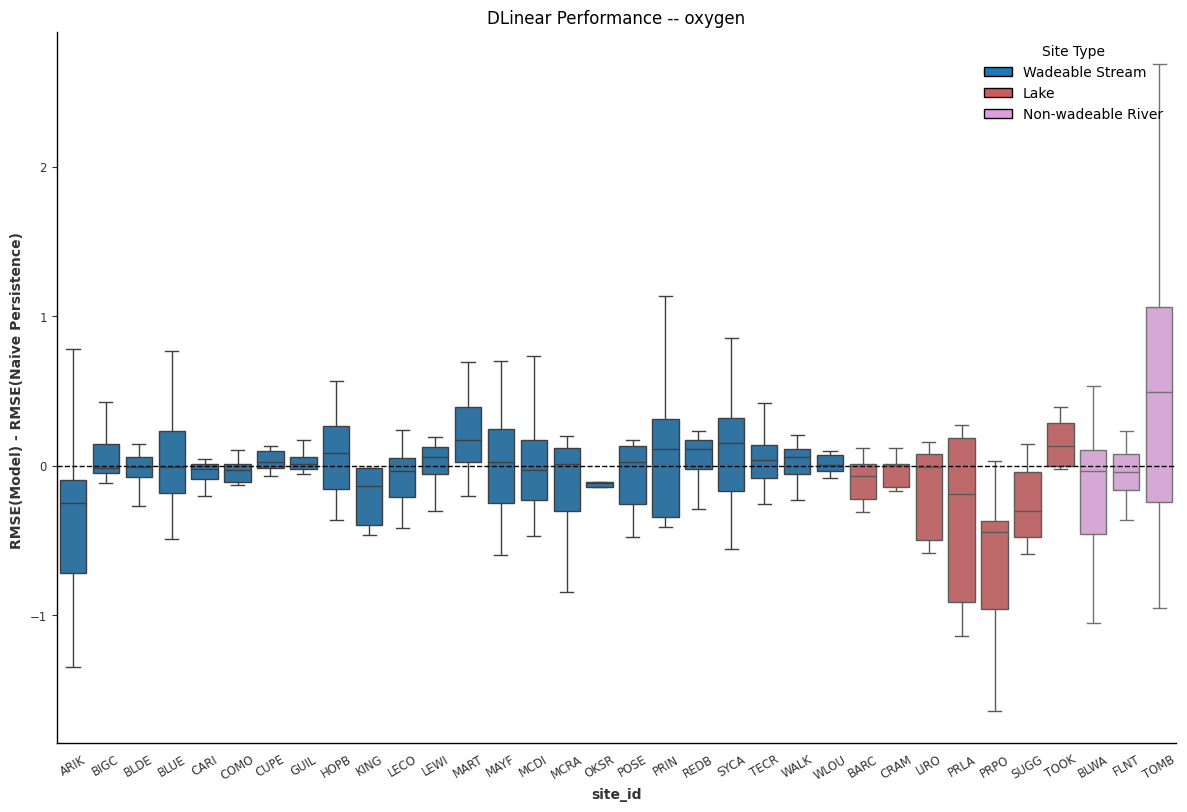

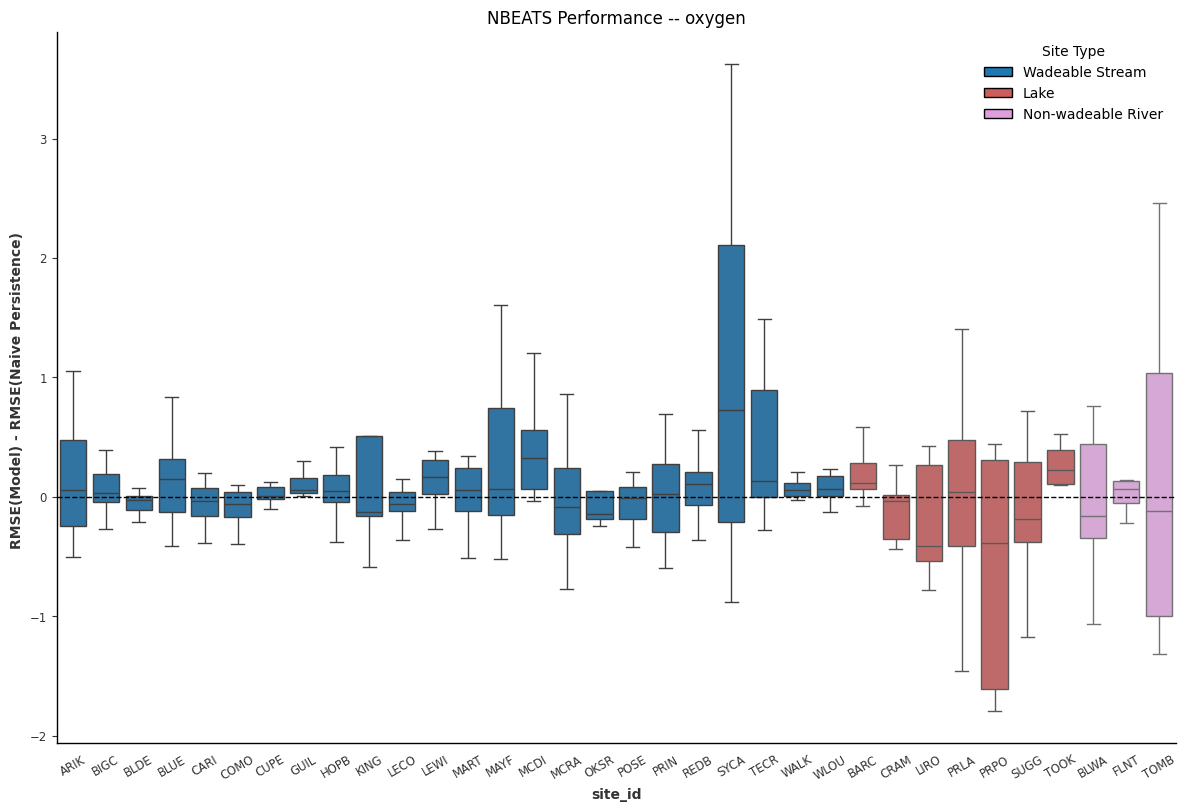

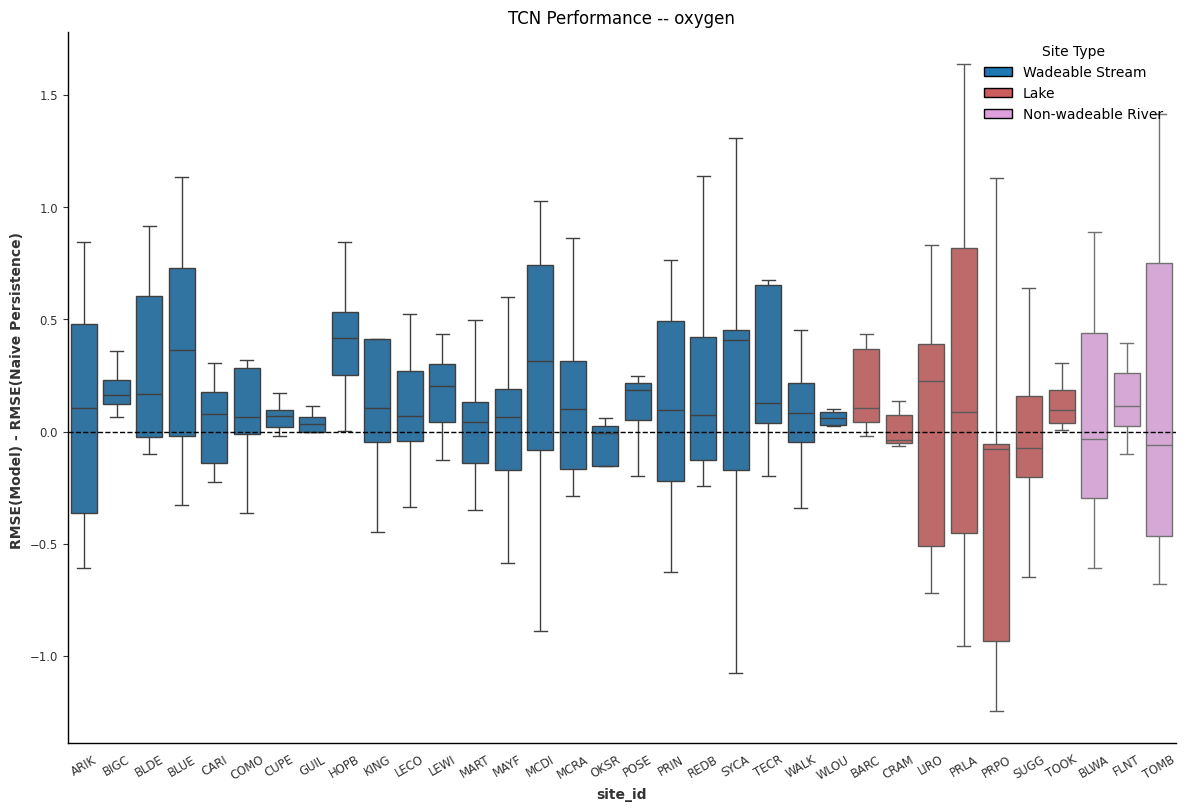

In [17]:
variable = 'oxygen'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable]['inter'], metadata, f'{model} Performance -- {variable}', historical=False)

##### Temperature

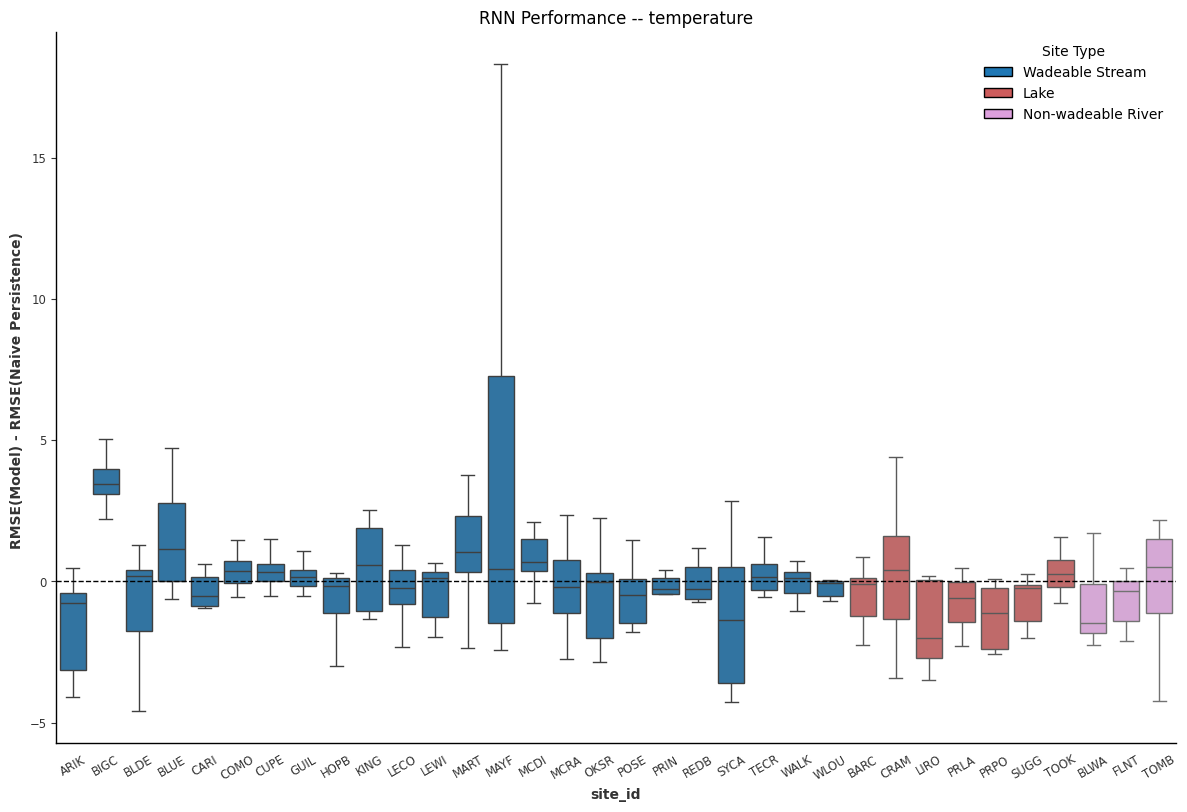

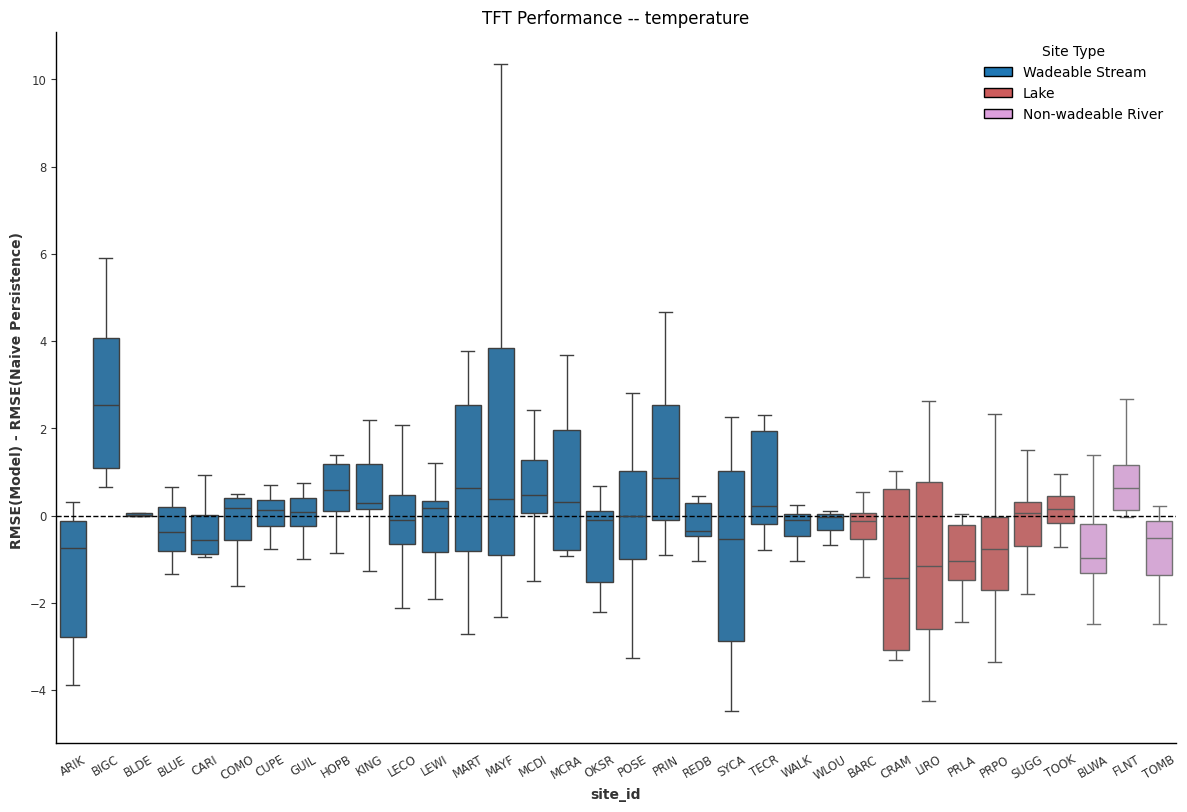

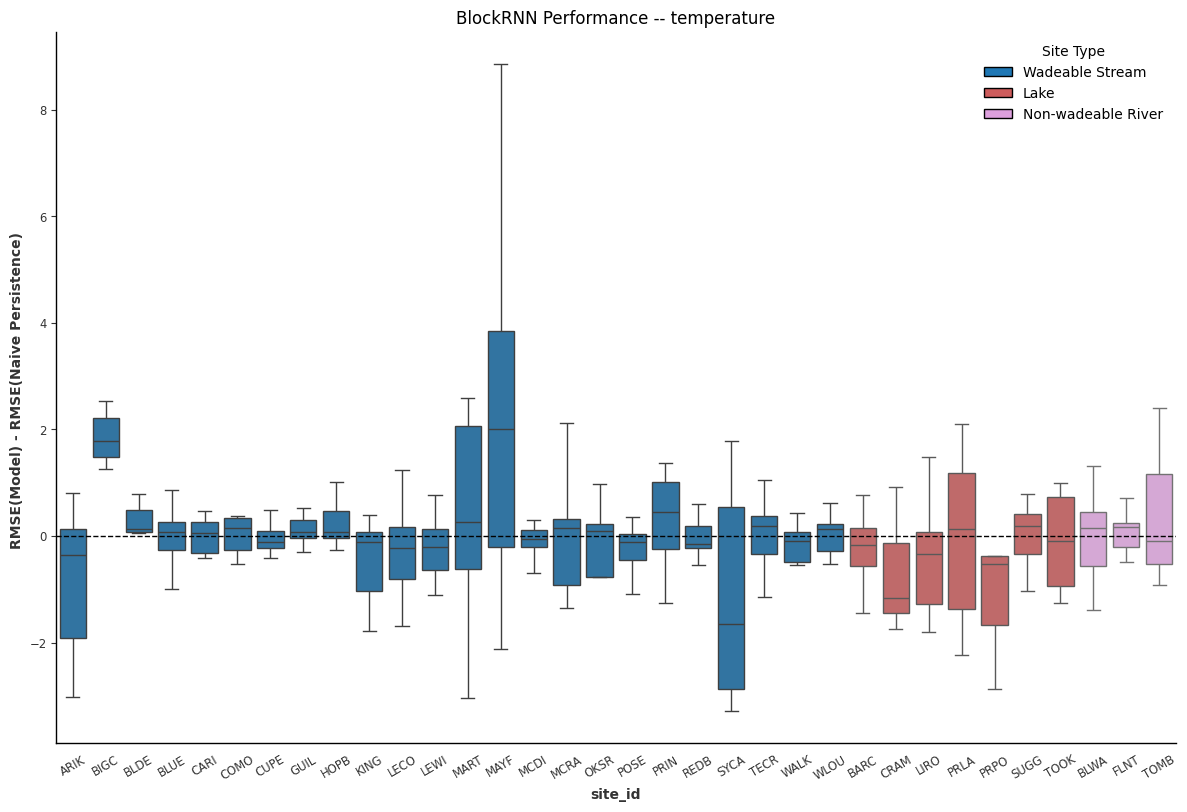

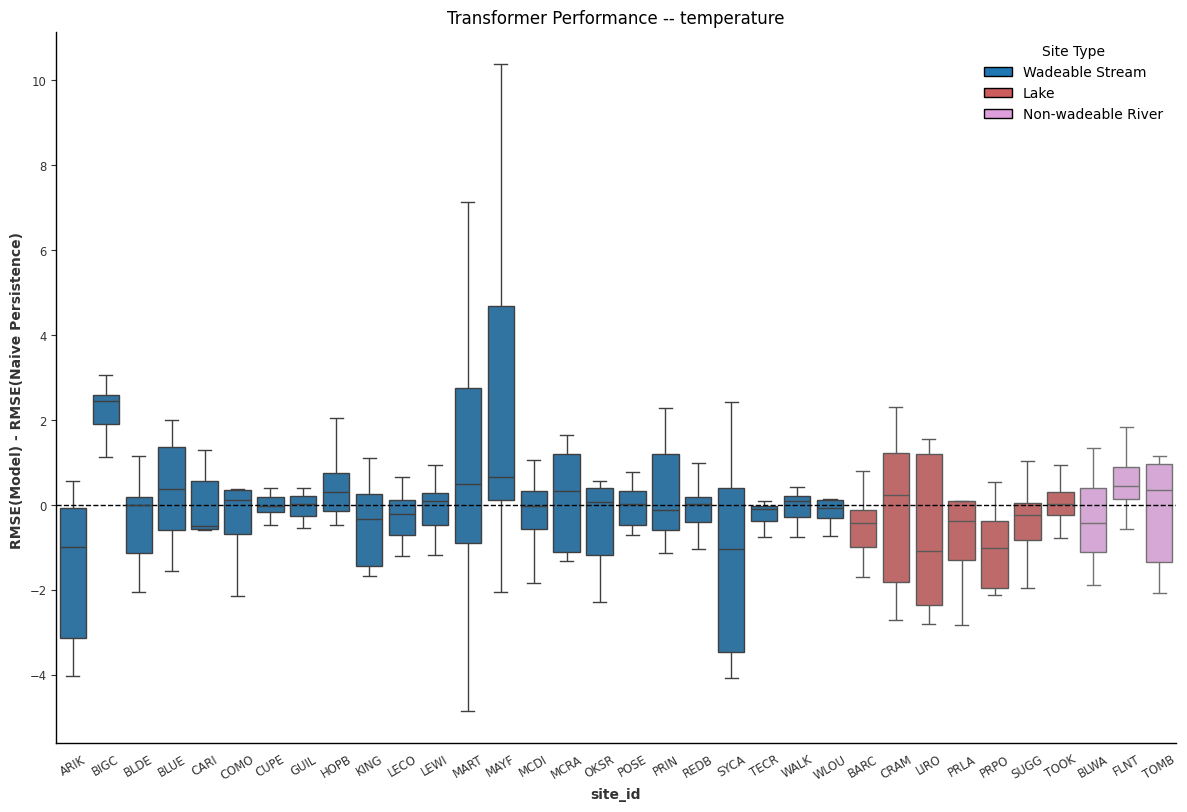

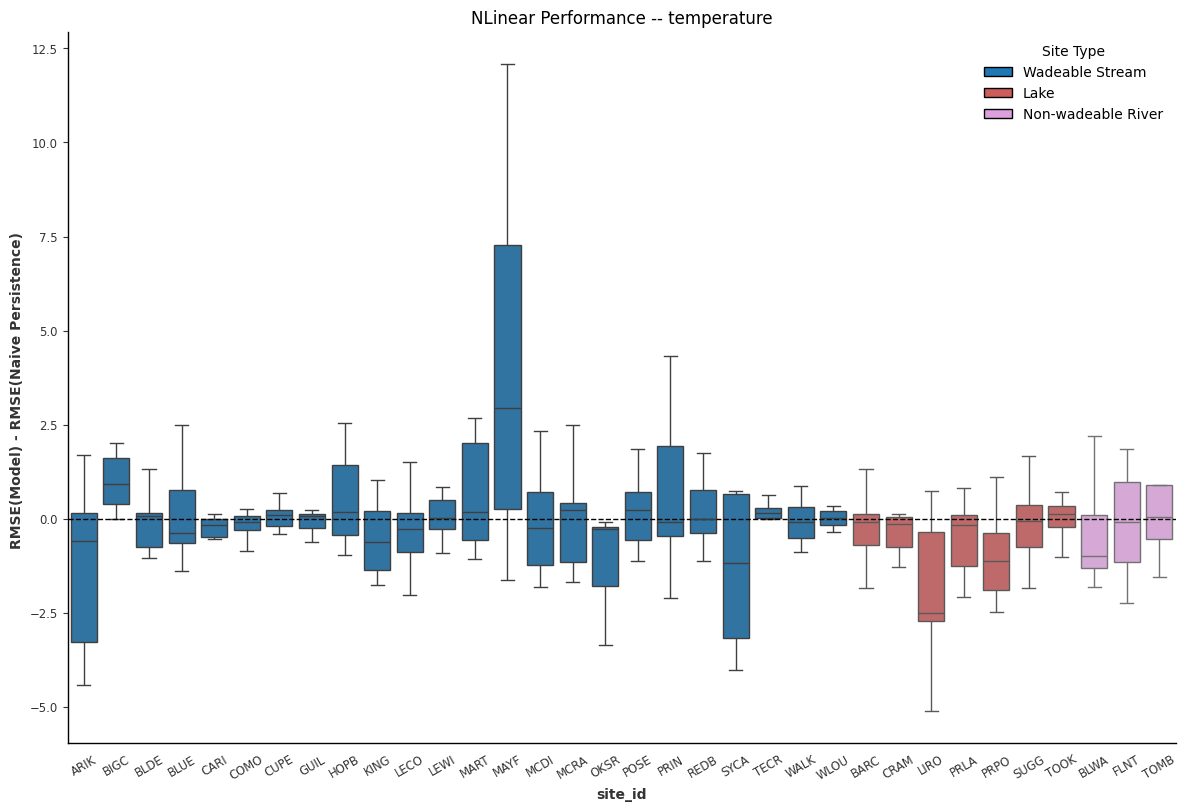

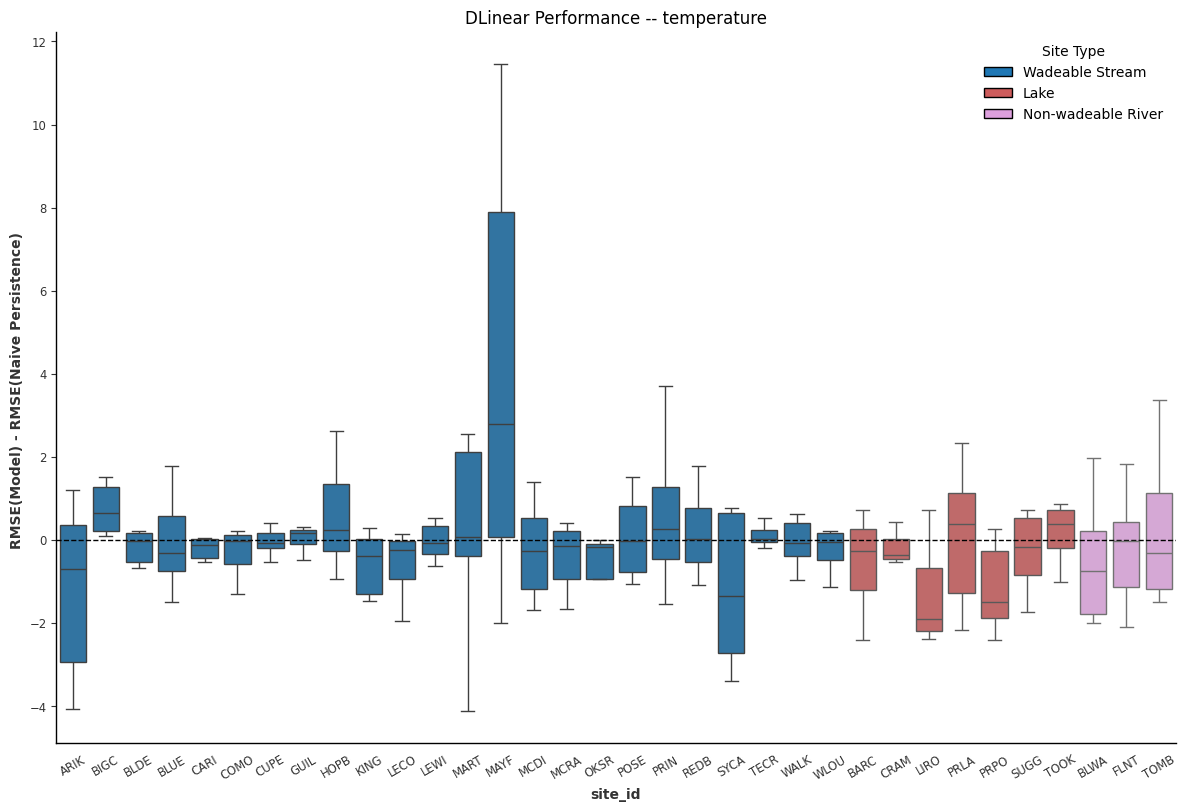

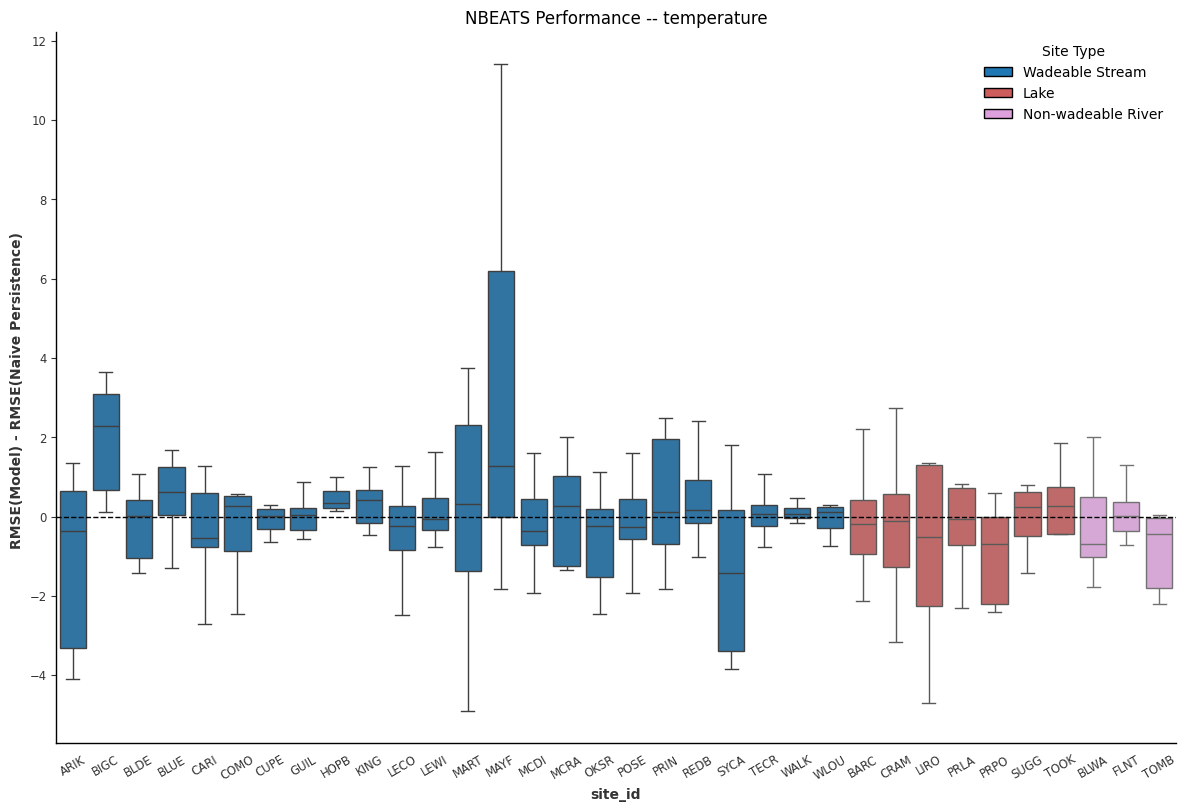

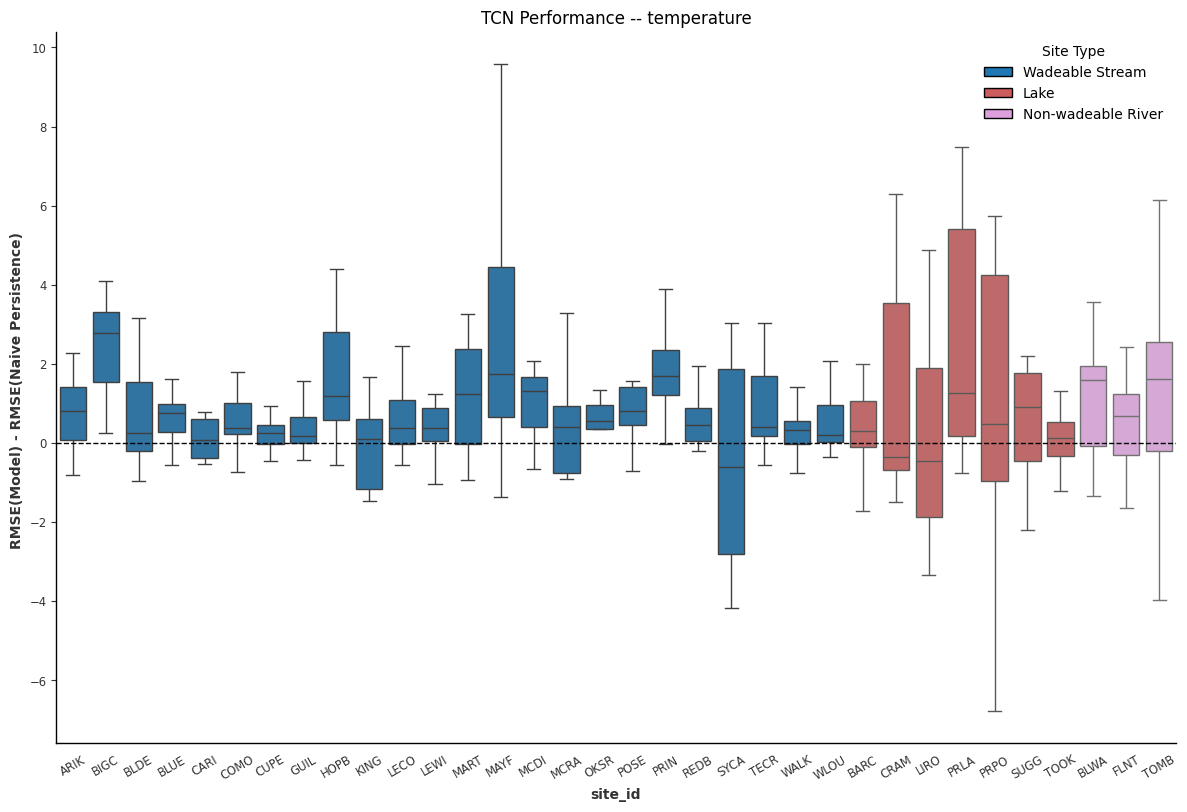

In [18]:
variable = 'temperature'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable]['inter'], metadata, f'{model} Performance -- {variable}', historical=False)

##### Chla

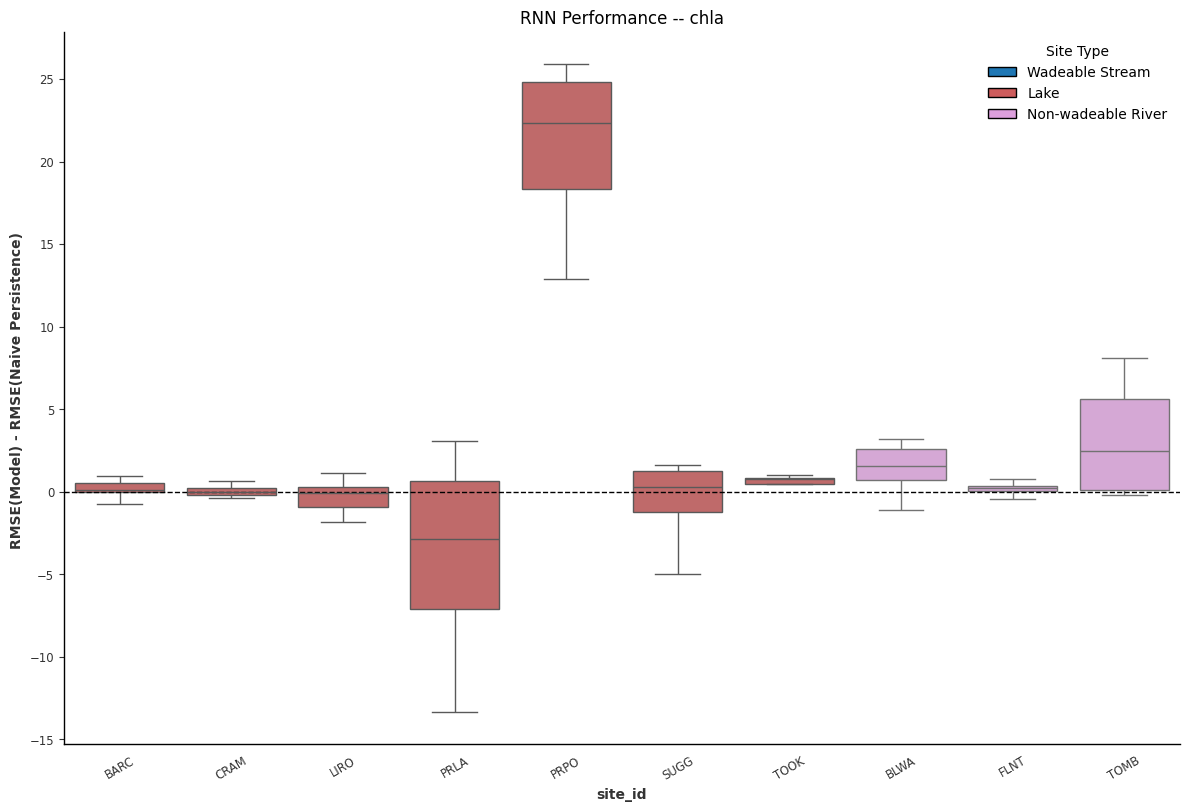

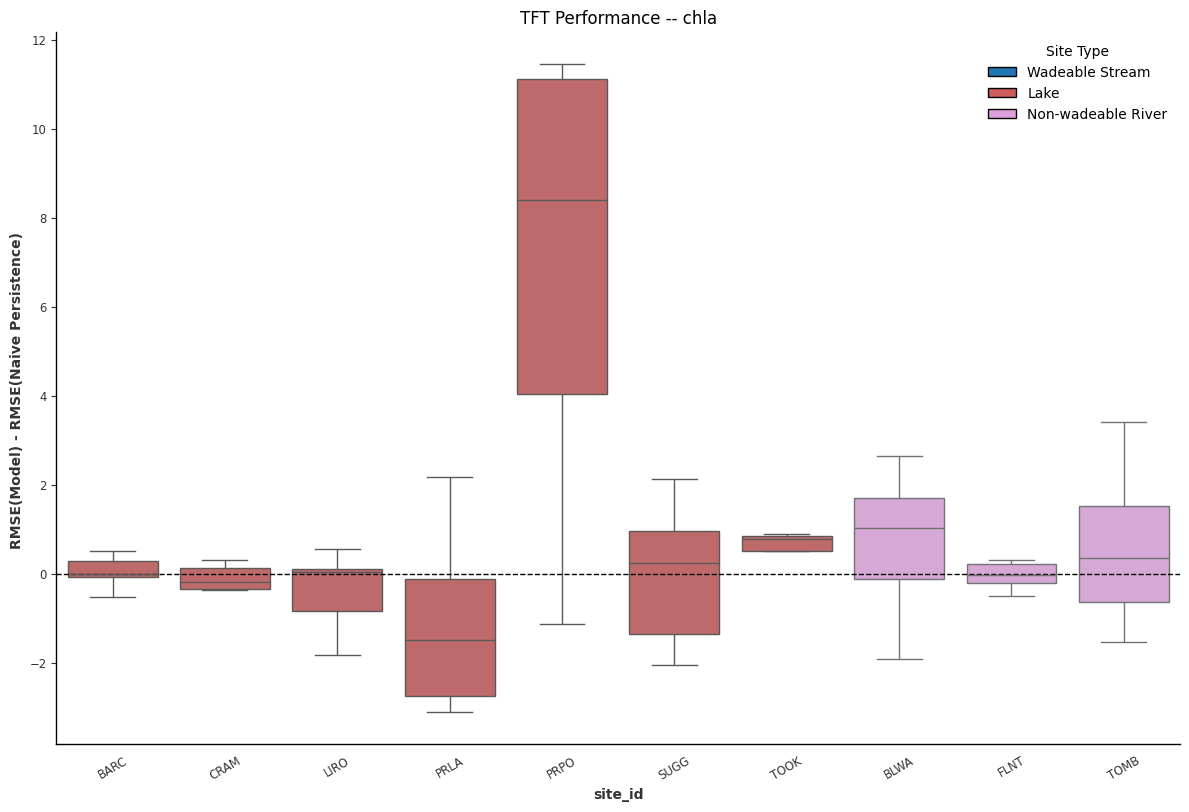

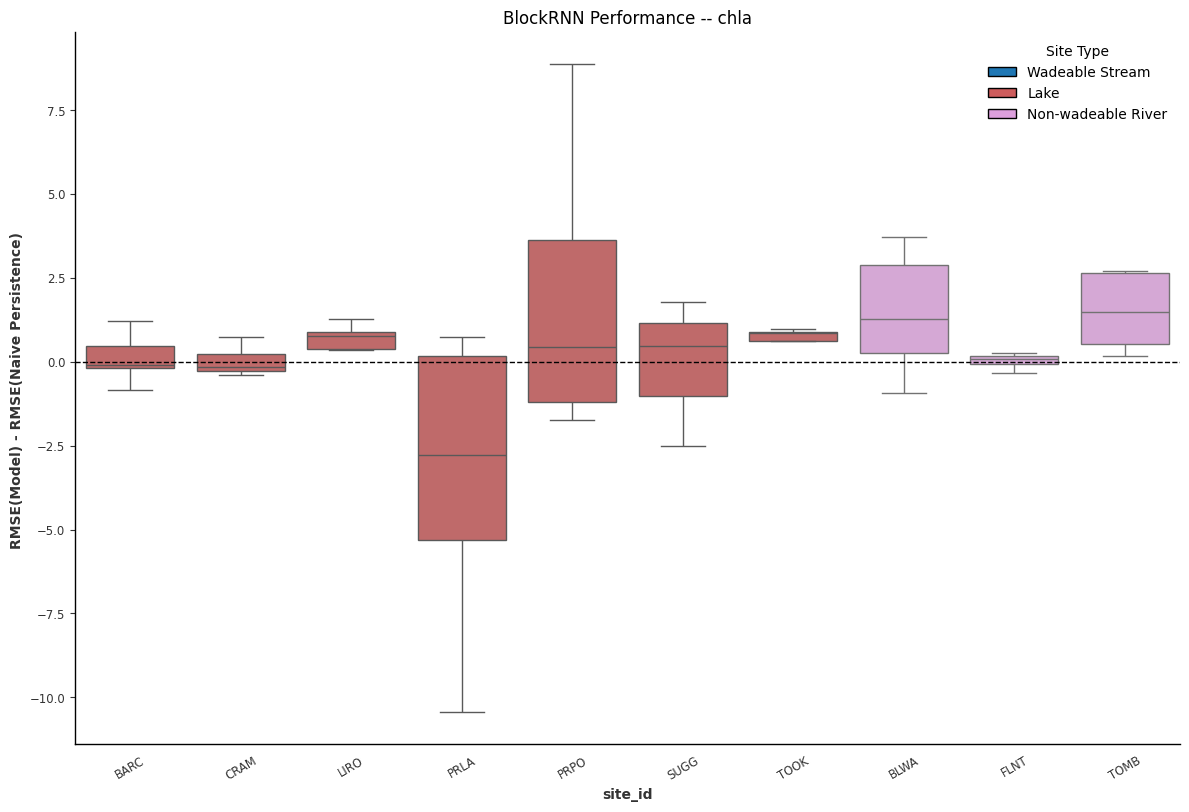

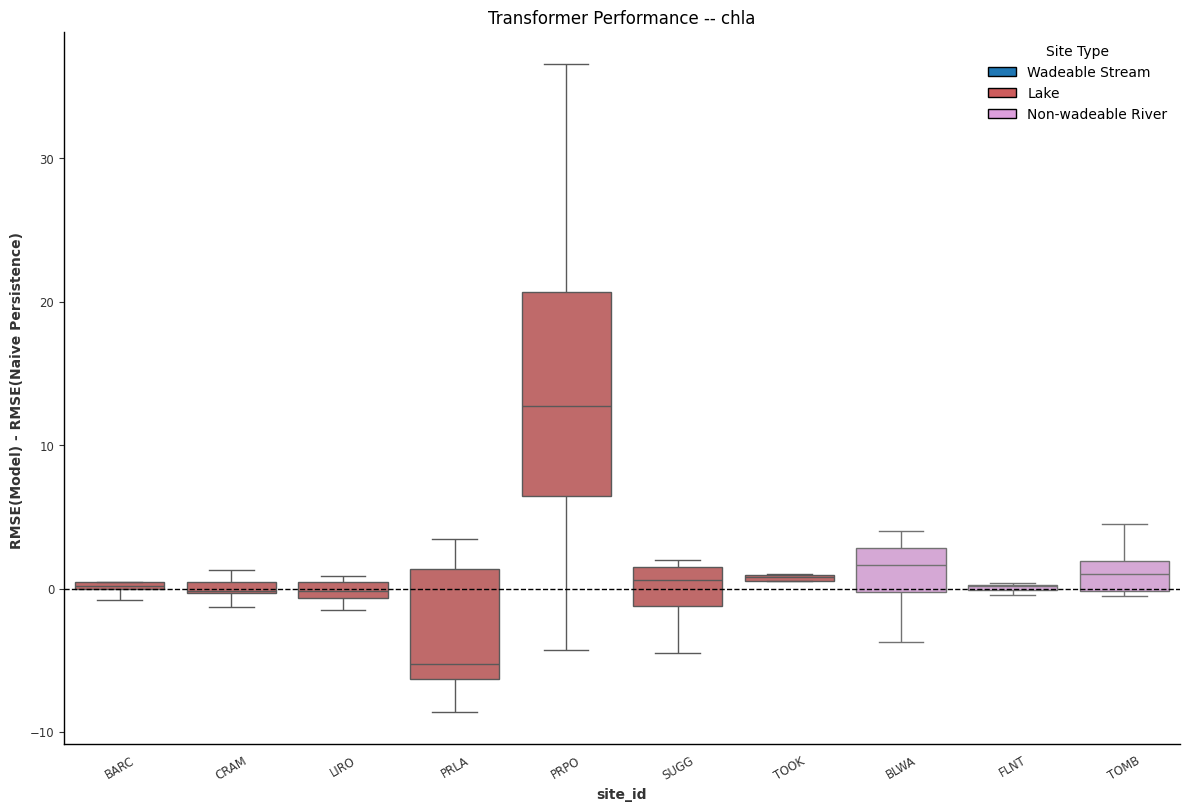

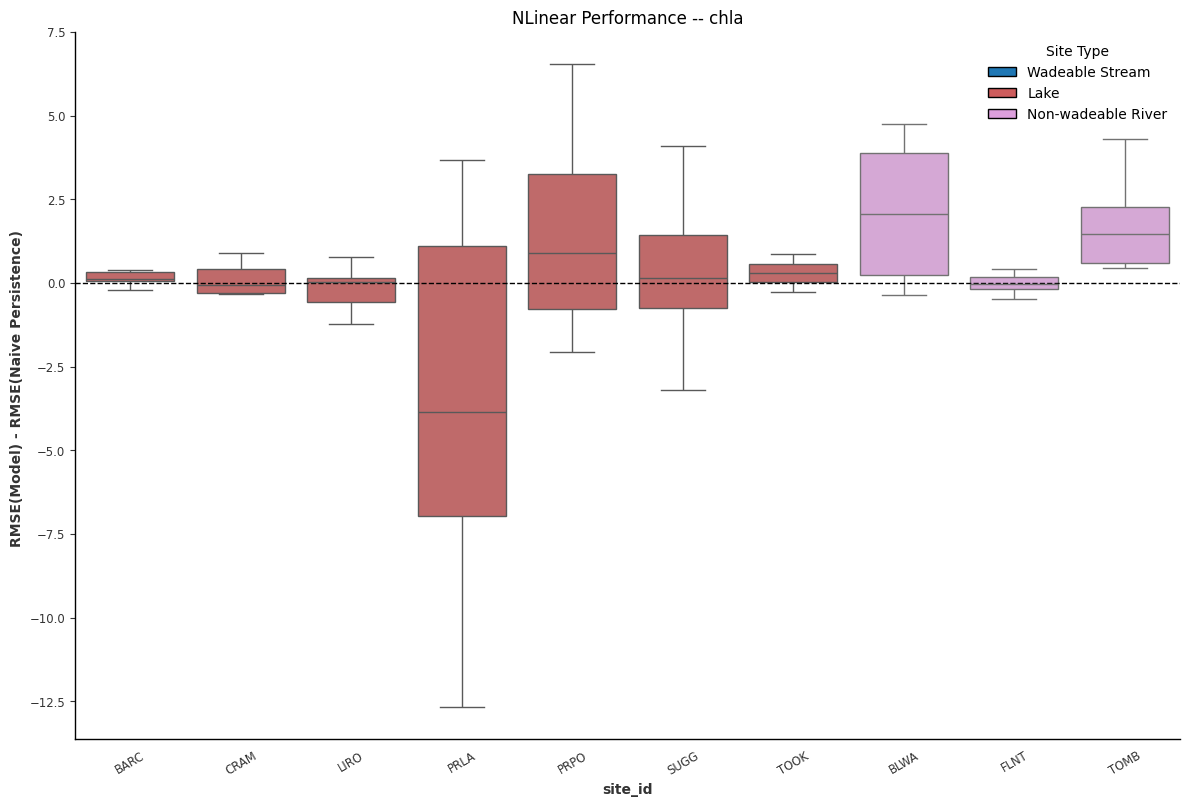

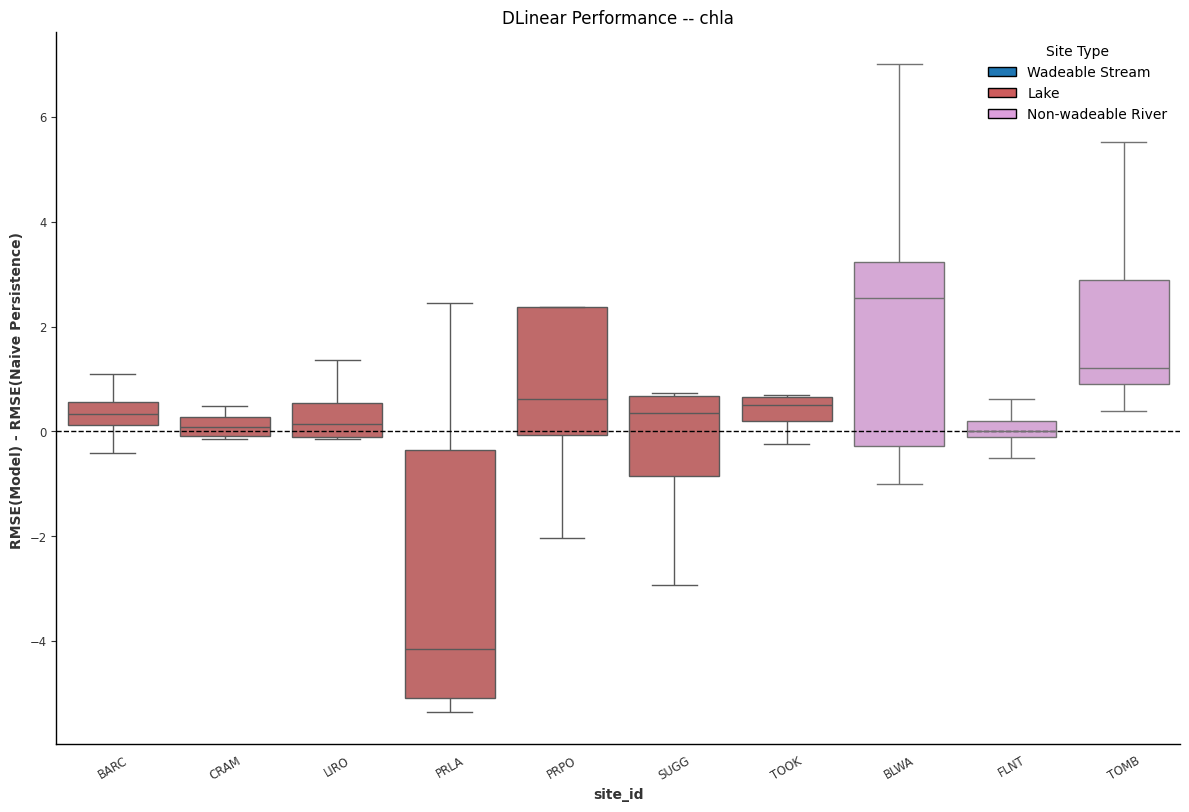

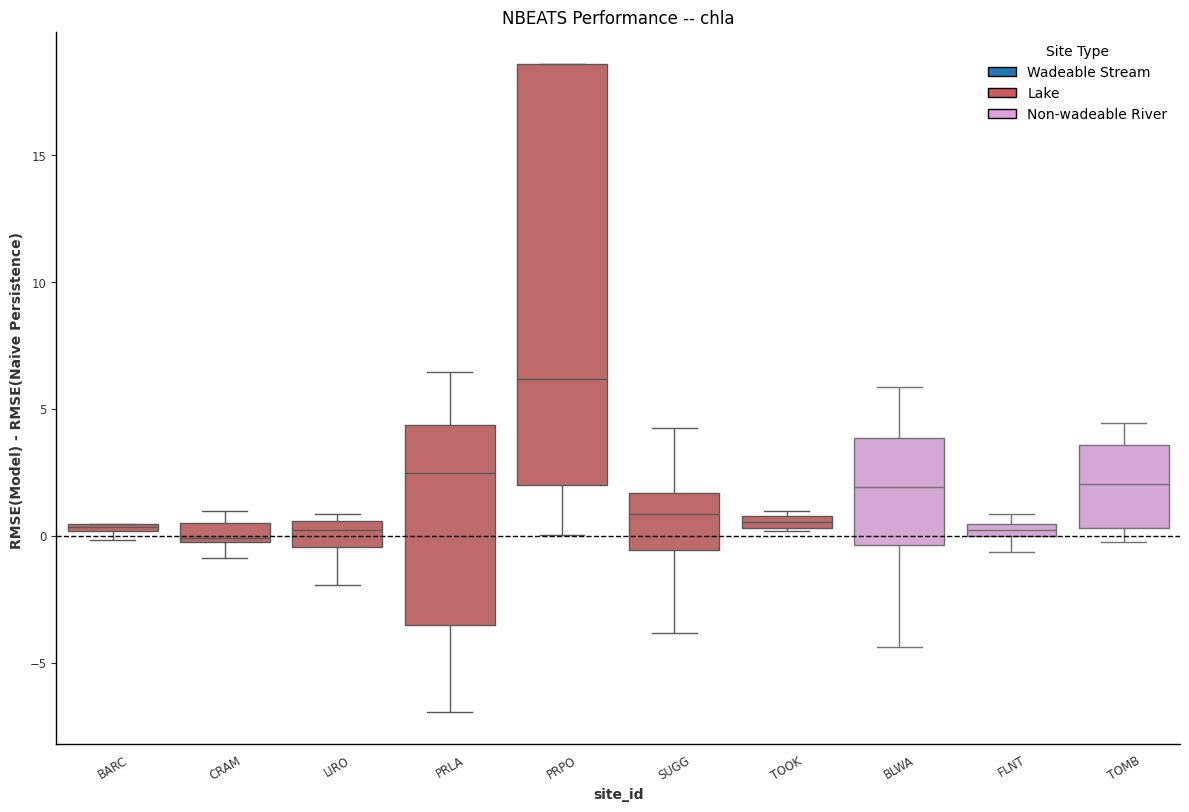

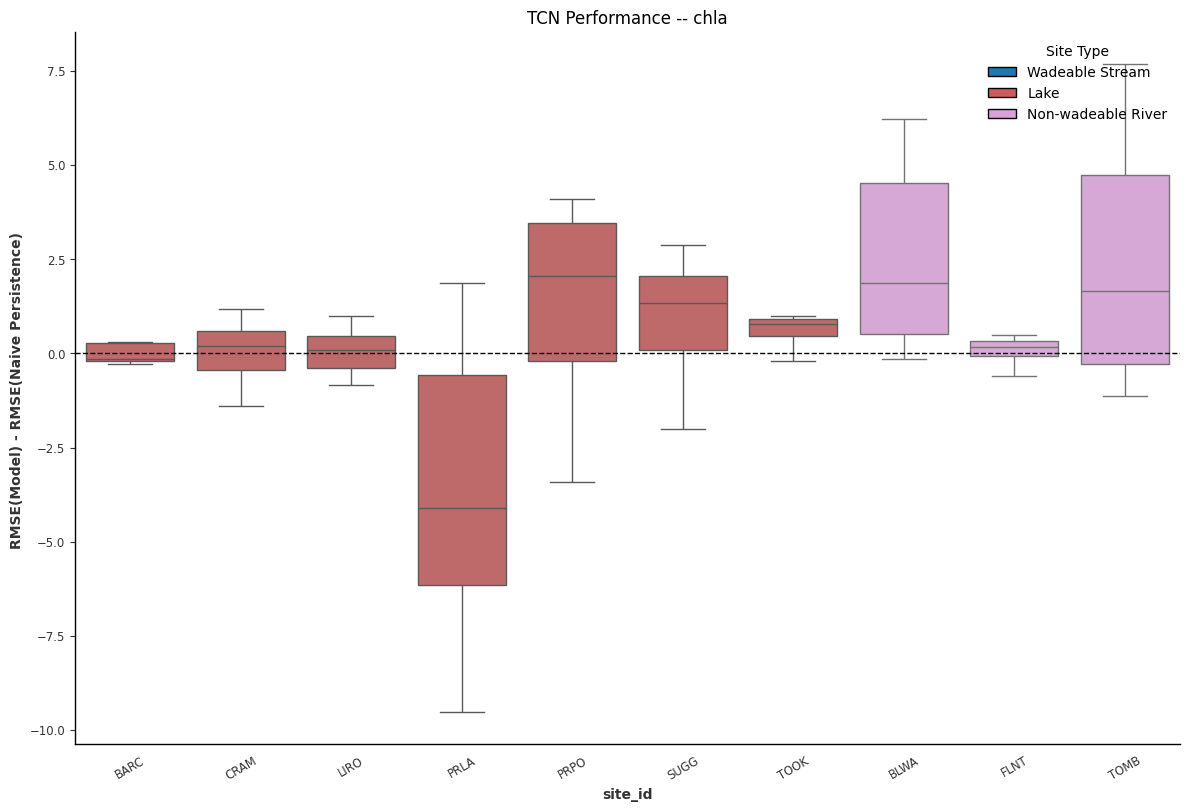

In [19]:
variable = 'chla'
for model in model_names:
    plot_improvement_bysite(scores_dict[model][variable]['inter'], metadata, f'{model} Performance -- {variable}', historical=False)